#Machine Learning Course - EX2
ID1: 208464289, ID2: 206540007

#Load Data

In [ ]:
#Libraries

#used all across the page
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#used in "Load Data"
import os
import kagglehub

#from "Song popularity features analysis"
from matplotlib.ticker import StrMethodFormatter
from scipy.stats import mode

#from "Most predictive strings in data"
from collections import Counter, defaultdict

#from "Group By: Label distribution among aggregations"
from matplotlib import rcParams

#from "Missing data calculation with KNN"
from sklearn.impute import KNNImputer

#from "Numerical Data Transformation"
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from scipy.stats.mstats import winsorize

#from "Feature Importance"
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#from "New Features Transformation"
from scipy.stats import probplot

#from "Split Data to Train (80%), Validation (10%) and Test (10%)"
from sklearn.model_selection import train_test_split

#From "First Classifier: Decision Trees"
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

#from "Agglomerative Clustering"
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, MeanShift

#from "PCA to find best features for clustering"
from sklearn.decomposition import PCA

#from "K-Means represented by Radar Plot"
import plotly.graph_objects as go

# Download and get directory path
path = kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube")

# Load the CSV file
csv_file_path = os.path.join(path, "Spotify_Youtube.csv")

df = pd.read_csv(csv_file_path)

# PART A - EDA

In [ ]:
print(df.shape)
df.info()
print(df.head(5))
df.describe(include='all')

(20718, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-

Unnamed: 0       Artist  \
count   20718.000000        20718   
unique           NaN         2079   
top              NaN  SICK LEGEND   
freq             NaN           10   
mean    10358.500000          NaN   
std      5980.915774          NaN   
min         0.000000          NaN   
25%      5179.250000          NaN   
50%     10358.500000          NaN   
75%     15537.750000          NaN   
max     20717.000000          NaN   

                                              Url_spotify  \
count                                               20718   
unique                                               2079   
top     https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
freq                                                   10   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                            Track          Album Album_type  \
count                                       20718          20718      20718   
unique                                      17841          11937          3   
top     El Ultimo Adiós - Varios Artistas Version  Greatest Hits      album   
freq                                           24             30      14926   
mean                                          NaN            NaN        NaN   
std                                           NaN            NaN        NaN   
min                                           NaN            NaN        NaN   
25%                                           NaN            NaN        NaN   
50%                                           NaN            NaN        NaN   
75%                                           NaN            NaN        NaN   
max                                           NaN            NaN        NaN   

                                         Uri  Danceability        Energy  \
count                                  20718  20716.000000  20716.000000   
unique                                 18862           NaN           NaN   
top     spotify:track:0tzixmHNQfE6S6SirSToxW           NaN           NaN   
freq                                      24           NaN           NaN   
mean                                     NaN      0.619777      0.635250   
std                                      NaN      0.165272      0.214147   
min                                      NaN      0.000000      0.000020   
25%                                      NaN      0.518000      0.507000   
50%                                      NaN      0.637000      0.666000   
75%                                      NaN      0.740250      0.798000   
max                                      NaN      0.975000      1.000000   

                 Key  ...                                  Url_youtube  \
count   20716.000000  ...                                        20248   
unique           NaN  ...                                        18154   
top              NaN  ...  https://www.youtube.com/watch?v=GqOvxbFLwjY   
freq             NaN  ...                                           18   
mean        5.300348  ...                                          NaN   
std         3.576449  ...                                          NaN   
min         0.000000  ...                                          NaN   
25%         2.000000  ...                                          NaN   
50%         5.000000  ...                                          NaN   
75%         8.000000  ...                                          NaN   
max        11.000000  ...                                          NaN   

                                                    Title   Channel  \
count     

## check label distribution

In [ ]:
df['Album_type'].value_counts()

Album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64

## transform compilation to album

We have 788 samples with Album_type='compilation'. Following TA insturctions, we will treat them simply as 'album' from now on.


## Data imbalance

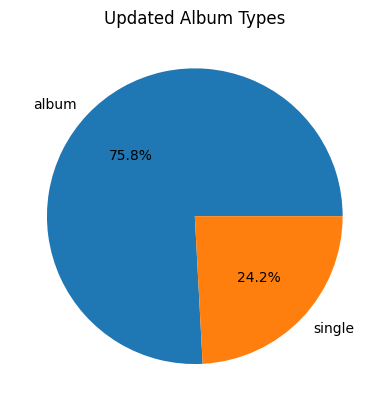

In [ ]:
df['Album_type'] =  df['Album_type'].replace('compilation', 'album')
y = df['Album_type']
X = df.drop(['Album_type'], axis=1)
num_albums, num_singles = df['Album_type'].value_counts()

labels = ['album', 'single']
sizes = [num_albums, num_singles]

plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Updated Album Types')
plt.show()

### Disucssion and course of action
Data is slightly imbalanced, as there are ~3 times as many albums as there are singles. it is a legitimate question if its severe enough to require special handling by upsampling, downsampling etc..

We note to ourself that an Accuracy score of less than 75% is worse than the simplest model that simply predicts 'album' every time.

## Dataset order bias

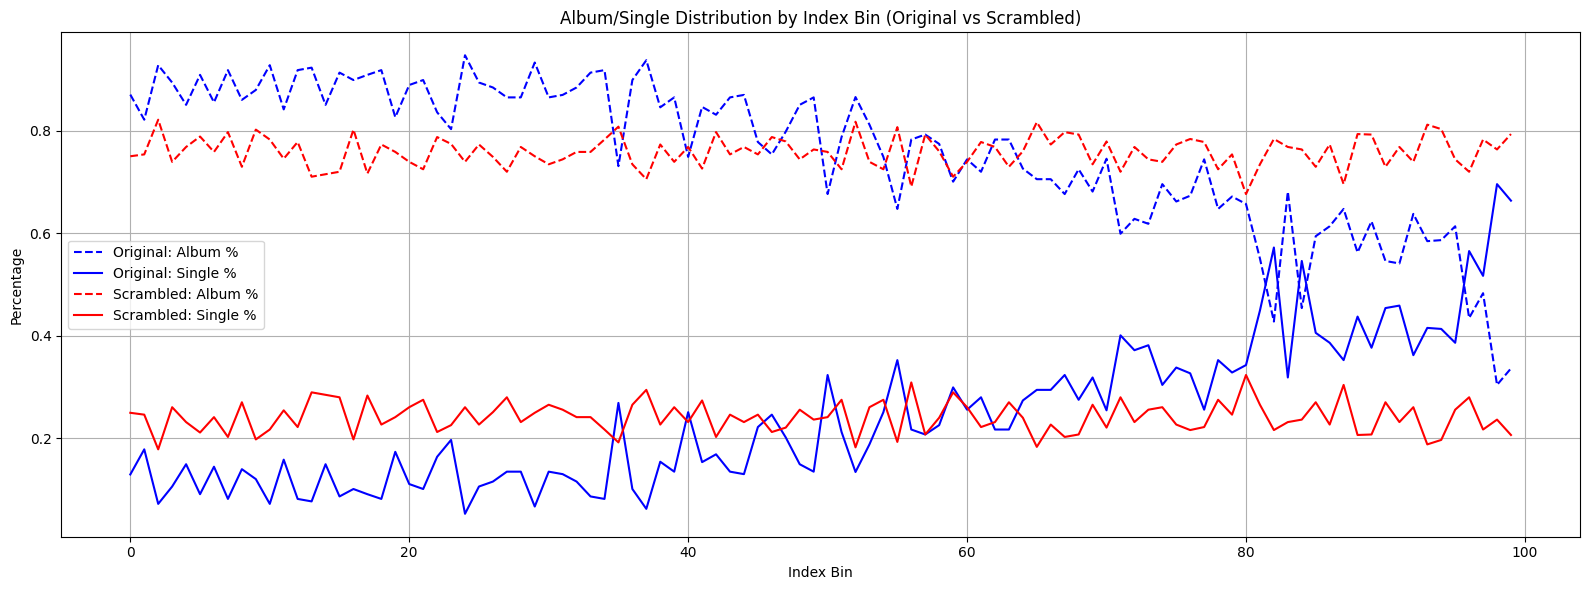

In [ ]:
# --- Original dataset ---
df_indexed = df[['Album_type']].copy().reset_index()
df_indexed['Index_bin'] = pd.qcut(df_indexed['index'], q=100, labels=False)

orig_dist = df_indexed.groupby(['Index_bin', 'Album_type']).size().unstack(fill_value=0)
orig_dist['Total'] = orig_dist.sum(axis=1)
orig_dist['Album %'] = orig_dist.get('album', 0) / orig_dist['Total']
orig_dist['Single %'] = orig_dist.get('single', 0) / orig_dist['Total']

# --- Scrambled dataset ---
df_scrambled = df[['Album_type']].sample(frac=1, random_state=42).reset_index(drop=True)
df_scrambled['Index_bin'] = pd.qcut(df_scrambled.index, q=100, labels=False)

scrambled_dist = df_scrambled.groupby(['Index_bin', 'Album_type']).size().unstack(fill_value=0)
scrambled_dist['Total'] = scrambled_dist.sum(axis=1)
scrambled_dist['Album %'] = scrambled_dist.get('album', 0) / scrambled_dist['Total']
scrambled_dist['Single %'] = scrambled_dist.get('single', 0) / scrambled_dist['Total']

# --- Plot both ---
plt.figure(figsize=(16, 6))
plt.plot(orig_dist.index, orig_dist['Album %'], label='Original: Album %', color='blue', linestyle='--')
plt.plot(orig_dist.index, orig_dist['Single %'], label='Original: Single %', color='blue', linestyle='-')
plt.plot(scrambled_dist.index, scrambled_dist['Album %'], label='Scrambled: Album %', color='red', linestyle='--')
plt.plot(scrambled_dist.index, scrambled_dist['Single %'], label='Scrambled: Single %', color='red', linestyle='-')
plt.xlabel('Index Bin')
plt.ylabel('Percentage')
plt.title('Album/Single Distribution by Index Bin (Original vs Scrambled)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Discussion
We wanted to check if the dataset is biased in how it was created; for example if more singles were included later in the scraping process, since in later stages (feature importance) we've found that the index is a feature that has indicative powers over the label.

So we seperated the data into bins according to their index and checked the ratio of album/single in each bin and plotted it. we then scrambled the data rows to check how different the bias in the dataset is

Note how the scrambled dataset remains fairly consistent and while the original dataset suggests a trend (bias) in labels.

Conclusion: dataset order is biased and therefore indexes hold predictive value over label. since we want to generalize over new queries, which will not be indexed, we will shuffle the dataset.

## Heatmap to show correlation between numeric features

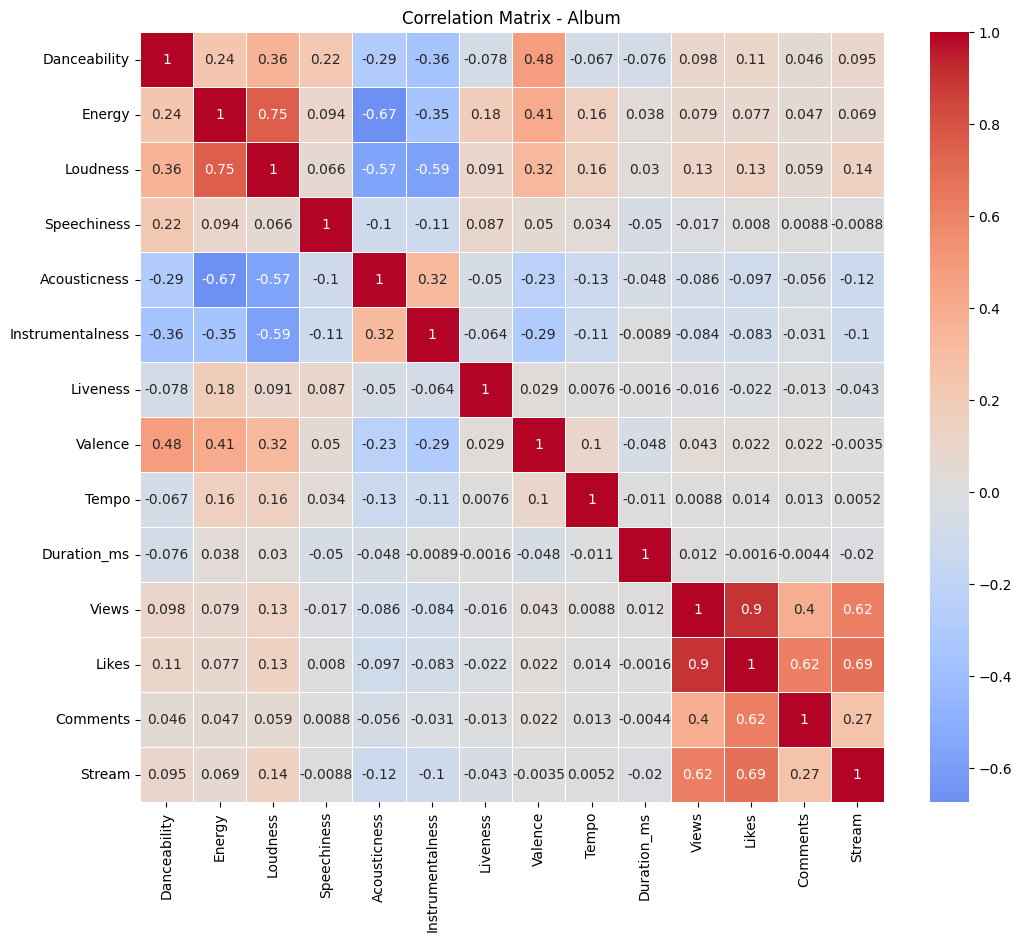

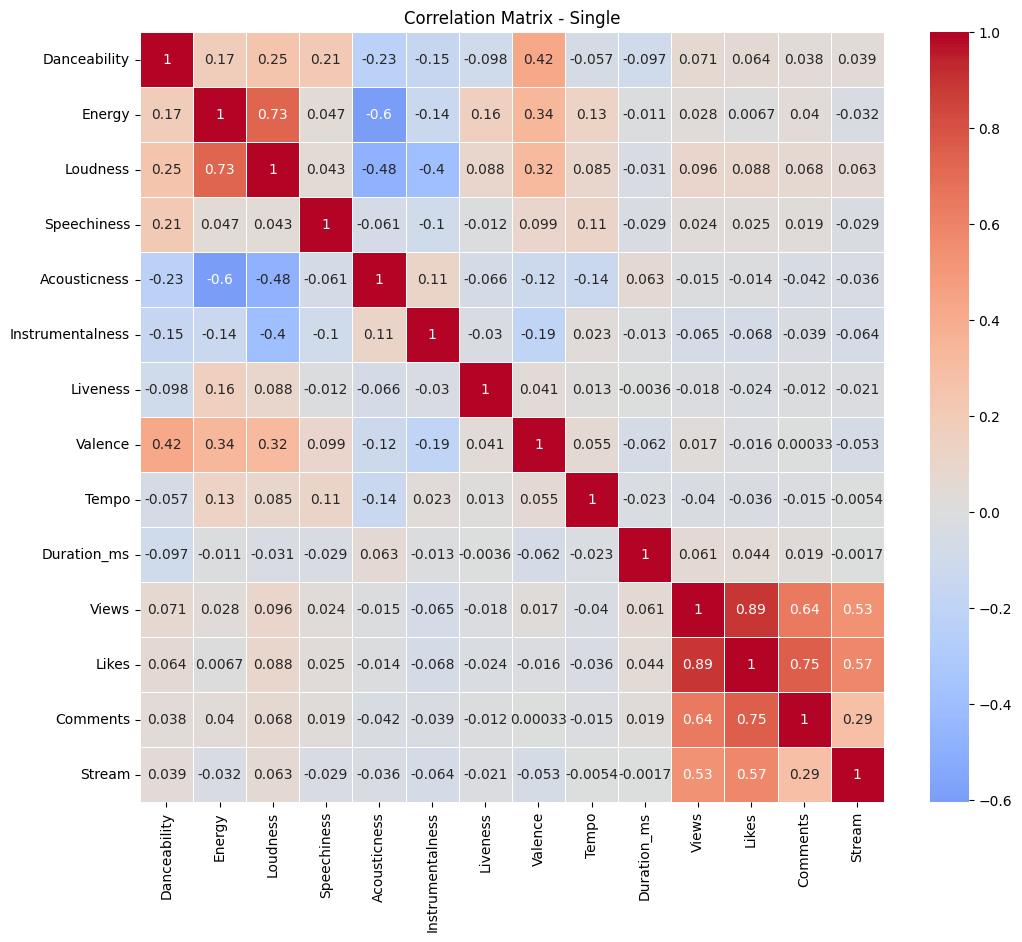

In [ ]:
# All numeric features based on your schema
numeric_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
    'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream'
]

# Drop rows with missing Album_type or missing any numeric values
df_clean = df.dropna(subset=numeric_features + ['Album_type'])

# Correlation matrices
corr_album = df_clean[df_clean['Album_type'] == 'album'][numeric_features].corr()
corr_single = df_clean[df_clean['Album_type'] == 'single'][numeric_features].corr()

# Album heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_album, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix - Album')
plt.show()

# Single heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_single, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix - Single')
plt.show()


### Discussion
The heatmap is used to find correlation and patterns between every pair of numeric features. for example, we can see that likes and views are heavily correlated, which makes perfect sense (a like is given in some instances of viewing) some features do not correlated in a meaningful way, like Liveness and Stream.

We note two groups/clusters of features which correlate within yet not amongst each other: audio features (dancability, energy,..) and popularity features (views, likes,..)

## Audio features analysis

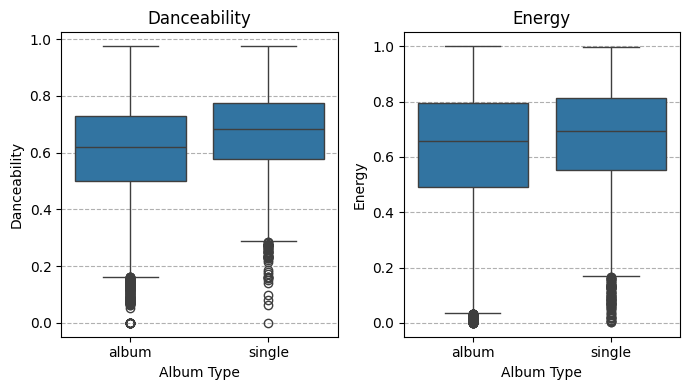

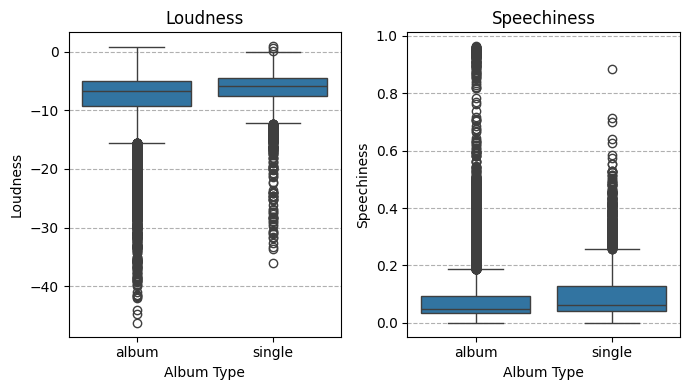

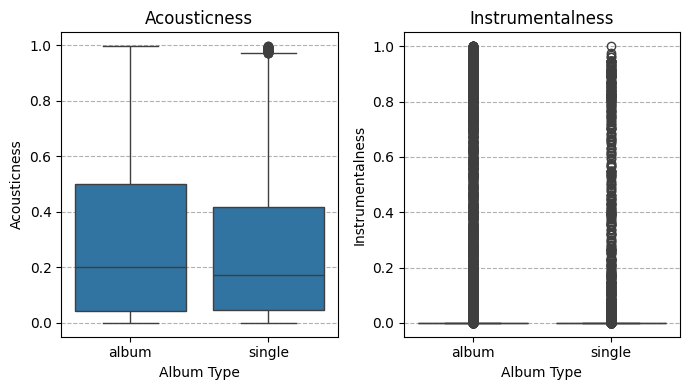

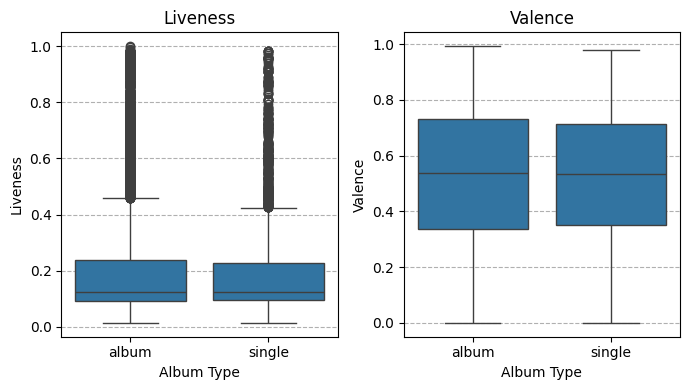

In [ ]:
X_plot = X.copy()
X_plot['Album_type'] = y
features_to_compare = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']
feature_pairs = [(features_to_compare[i], features_to_compare[i+1]) for i in range(0, len(features_to_compare), 2)]
for feature1, feature2 in feature_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(7, 4))

    # Plot the first feature
    sns.boxplot(x='Album_type', y=feature1, data=X_plot, ax=axes[0])
    axes[0].set_title(f'{feature1}')
    axes[0].set_xlabel('Album Type')
    axes[0].set_ylabel(feature1)
    axes[0].grid(axis='y', linestyle='--')

    # Plot the second feature
    sns.boxplot(x='Album_type', y=feature2, data=X_plot, ax=axes[1])
    axes[1].set_title(f'{feature2}')
    axes[1].set_xlabel('Album Type')
    axes[1].set_ylabel(feature2)
    axes[1].grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()



### Conclusions
We note fairly even distributions among album and single for these features and therefore we don't expect clustering techniques to be of much help in predicting labels.


## Song popularity features analysis

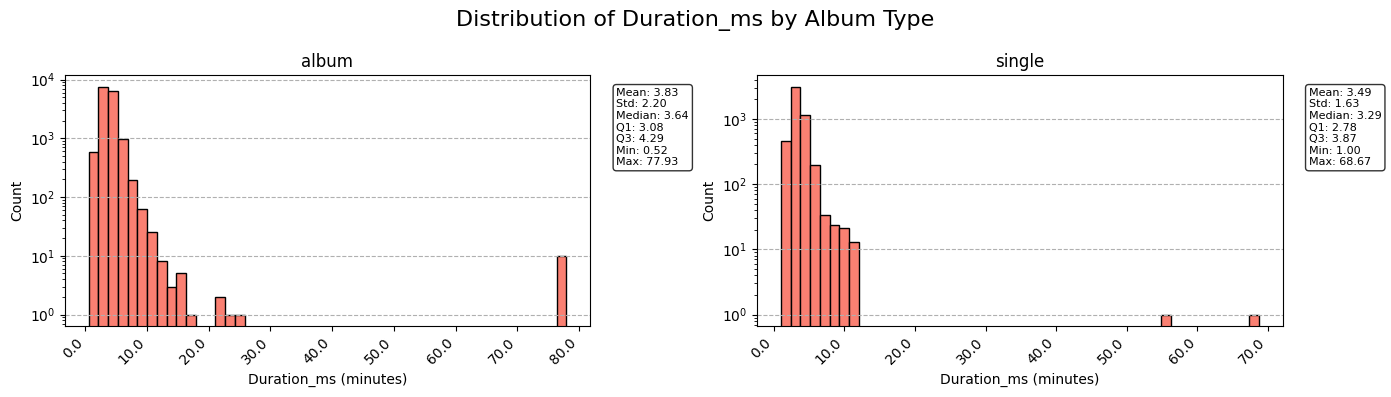

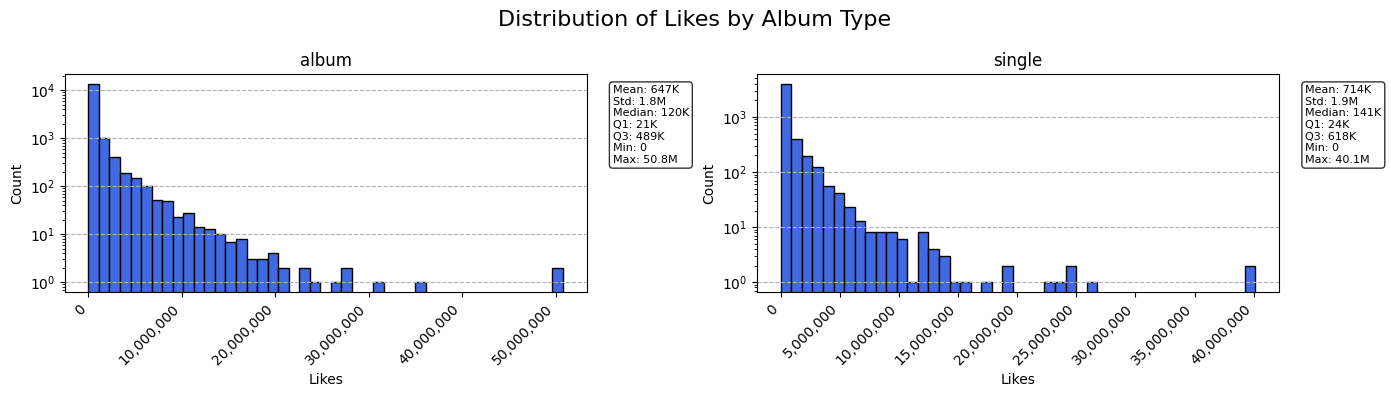

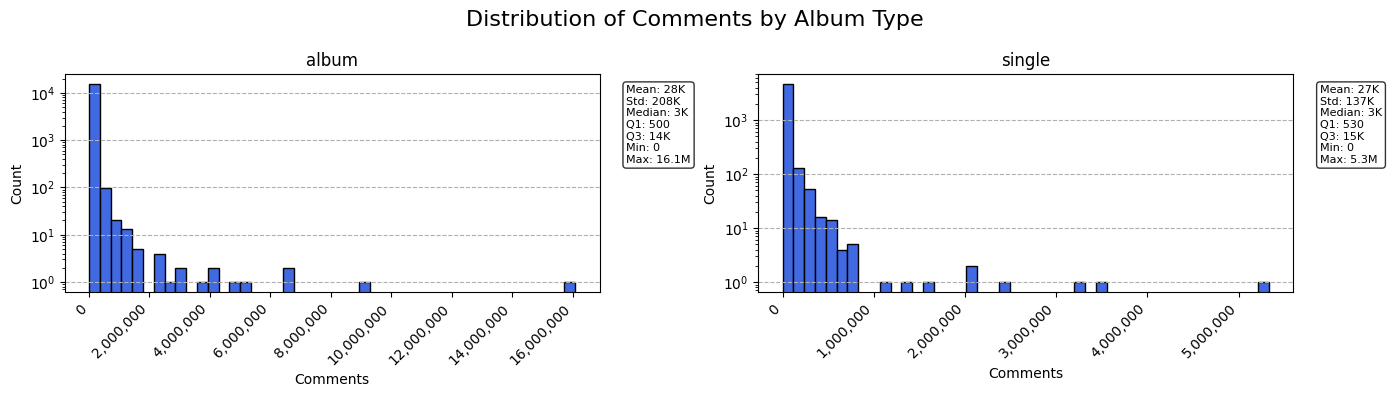

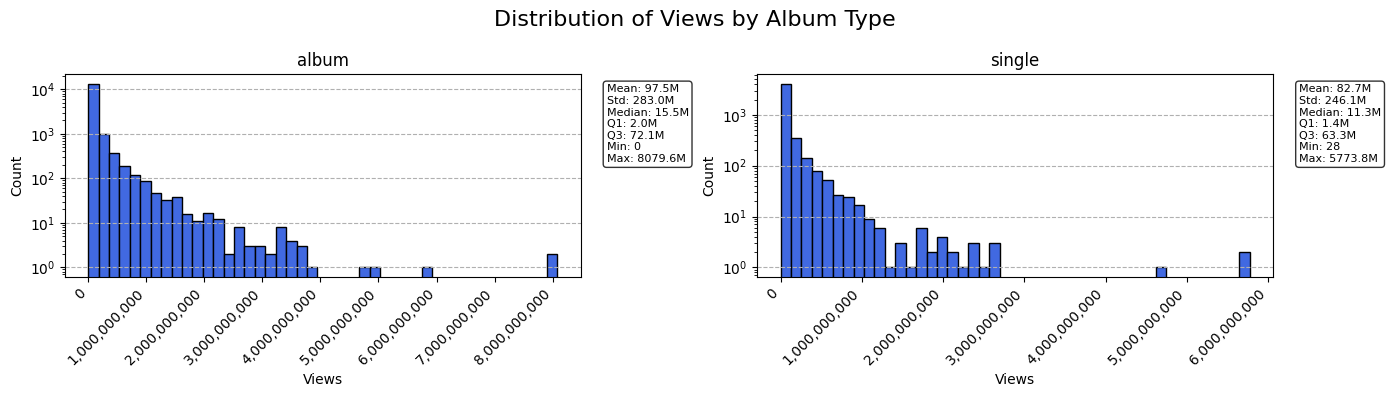

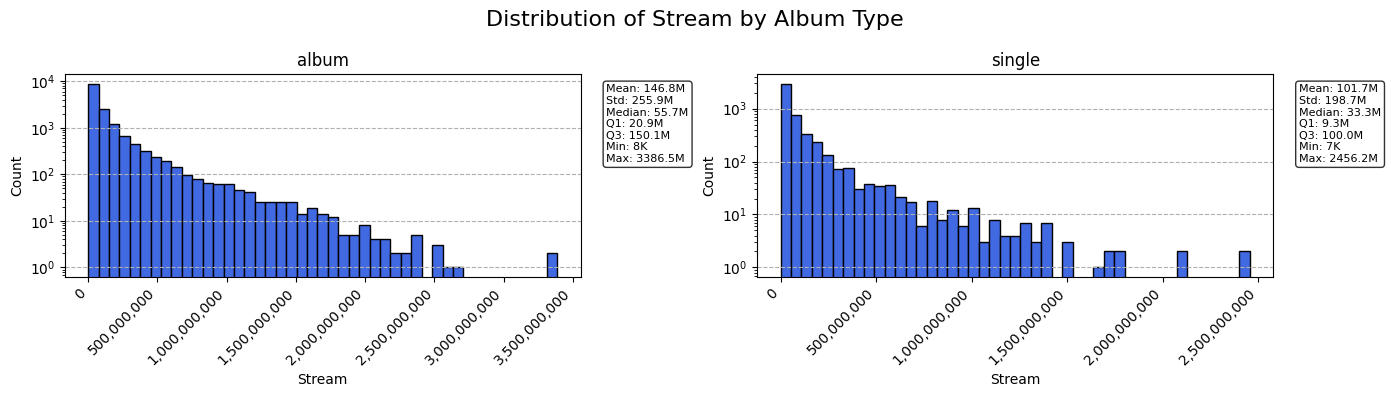

In [ ]:
def format_number(n):
    if abs(n) >= 1_000_000:
        return f"{n / 1_000_000:.1f}M"
    elif abs(n) >= 1_000:
        return f"{n / 1_000:.0f}K"
    else:
        return f"{n:.0f}"

album_types = X_plot['Album_type'].unique()
features_to_compare = ['Duration_ms', 'Likes', 'Comments', 'Views', 'Stream']

for feature in features_to_compare:
    plt.figure(figsize=(14, 4))

    for i, album in enumerate(album_types):
        subset = X_plot[X_plot['Album_type'] == album].copy()

        if feature == 'Duration_ms':
            subset[feature] = subset[feature] / (1000 * 60)
            min_val = subset[feature].min()
            max_val = subset[feature].max()
            bins = np.linspace(min_val, max_val, 50)
            x_label = f'{feature} (minutes)'
            fmt = StrMethodFormatter('{x:,.1f}')
            human_fmt = lambda x: f"{x:.2f}"
        else:
            bins = 45
            x_label = feature
            fmt = StrMethodFormatter('{x:,.0f}')
            human_fmt = format_number

        stats = {
            'mean': subset[feature].mean(),
            'std': subset[feature].std(),
            'median': subset[feature].median(),
            'mode': mode(subset[feature], keepdims=True).mode[0] if not subset[feature].empty else None,
            'Q1': subset[feature].quantile(0.25),
            'Q3': subset[feature].quantile(0.75),
            'min': subset[feature].min(),
            'max': subset[feature].max()
        }

        plt.subplot(1, len(album_types), i + 1)
        plt.hist(subset[feature], bins=bins, color='royalblue' if feature != 'Duration_ms' else 'salmon',
                 edgecolor='black', log=True)
        plt.title(f"{album}")
        plt.xlabel(x_label)
        plt.ylabel('Count')
        plt.grid(axis='y', linestyle='--')
        plt.gca().xaxis.set_major_formatter(fmt)
        plt.xticks(rotation=45, ha='right')

        stat_text = '\n'.join([
            f"Mean: {human_fmt(stats['mean'])}",
            f"Std: {human_fmt(stats['std'])}",
            f"Median: {human_fmt(stats['median'])}",
            f"Q1: {human_fmt(stats['Q1'])}",
            f"Q3: {human_fmt(stats['Q3'])}",
            f"Min: {human_fmt(stats['min'])}",
            f"Max: {human_fmt(stats['max'])}"
        ])
        plt.gca().text(1.05, 0.95, stat_text, transform=plt.gca().transAxes,
                       verticalalignment='top', fontsize=8, bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

    plt.suptitle(f'Distribution of {feature} by Album Type', fontsize=16)
    plt.tight_layout()
    plt.show()


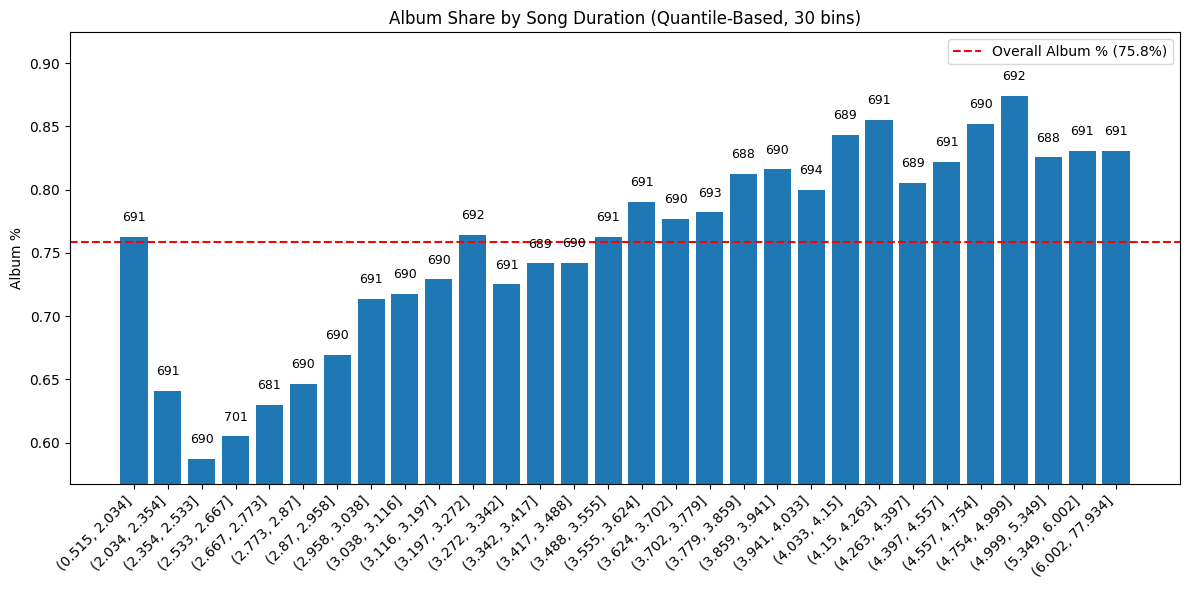

In [ ]:
# Step 1: Prepare data
df_plot = df.copy()
df_plot['Album_type'] = df_plot['Album_type'].replace('compilation', 'album')
df_plot['Duration_min'] = df_plot['Duration_ms'] / (1000 * 60)

# Step 2: Create quantile-based bins
num_bins = 30
df_plot['Duration Quantile'] = pd.qcut(df_plot['Duration_min'], q=num_bins, duplicates='drop')

# Step 3: Group by quantile bins and album type
album_rate = (df['Album_type'] == 'album').mean()

group_counts = df_plot.groupby(['Duration Quantile', 'Album_type'], observed=False).size().unstack(fill_value=0)
group_counts['Total'] = group_counts.sum(axis=1)
group_counts['Album %'] = group_counts.get('album', 0) / group_counts['Total']
group_counts['Lift'] = group_counts['Album %'] / album_rate

# Step 5: Plot
plt.figure(figsize=(12, 6))

album_percents = group_counts['Album %']
total_counts = group_counts['Total']
x_labels = group_counts.index.astype(str)

bars = plt.bar(x_labels, album_percents)

# Baseline line
plt.axhline(album_rate, color='red', linestyle='--', label=f'Overall Album % ({album_rate:.1%})')

# Annotate each bar with number of songs
for bar, total in zip(bars, total_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
             f'{total}', ha='center', va='bottom', fontsize=9)

# Dynamic y-axis
min_y = album_percents.min()
max_y = album_percents.max()
plt.ylim(min_y - 0.02, max_y + 0.05)

plt.title(f'Album Share by Song Duration (Quantile-Based, {num_bins} bins)')
plt.ylabel('Album %')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### Discussion

There seems to be some trend indicating that song duration is correlated with the label


##Ratio analysis

We've chosen pairs of numeric features we thought would be interesting and calculated a ratio. we then seperated the into bins with equal size(=n). bin range is different, to fit n. we then counted the ratio of albums to singles. this analysis is meant to find relationships between features to being album (or symmetrically, single).  because our data is imbalanced, we've added a red line showing albums to singles ratio. anything significantly above or below this line represents real deviation from the population distribution.

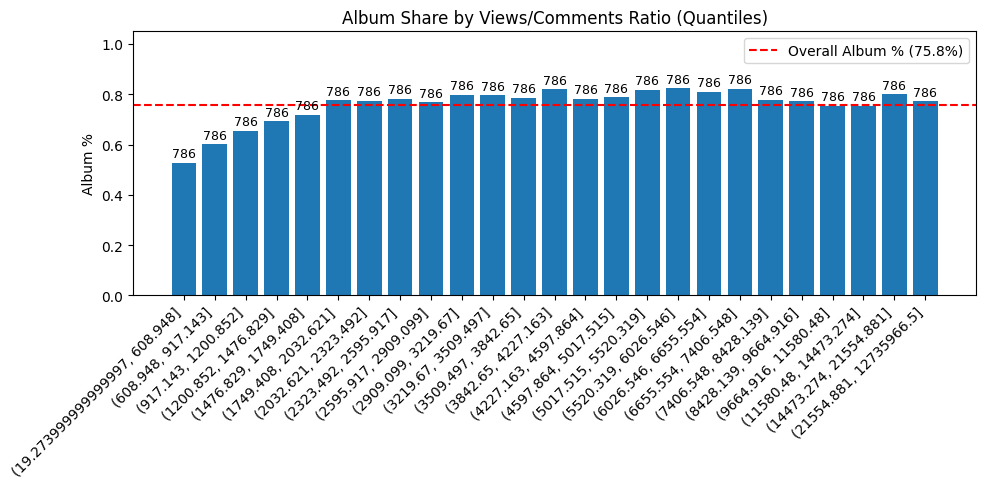

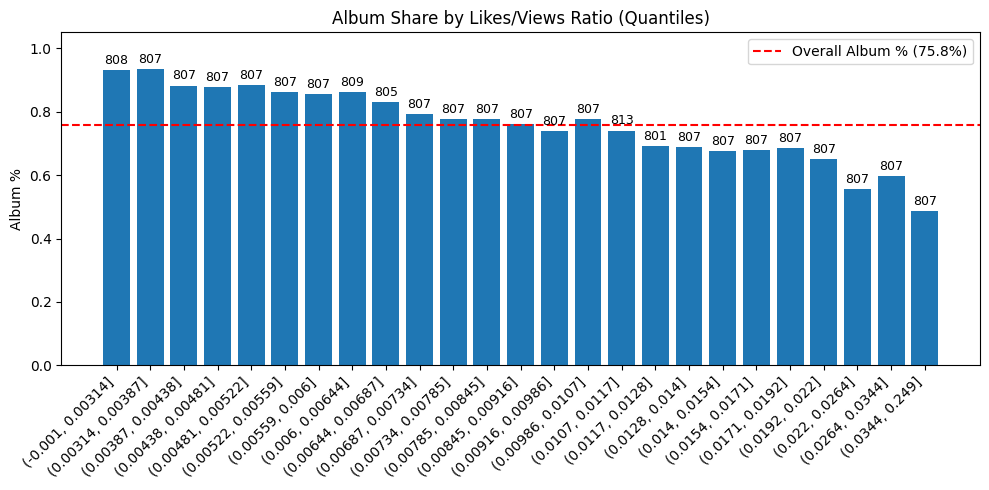

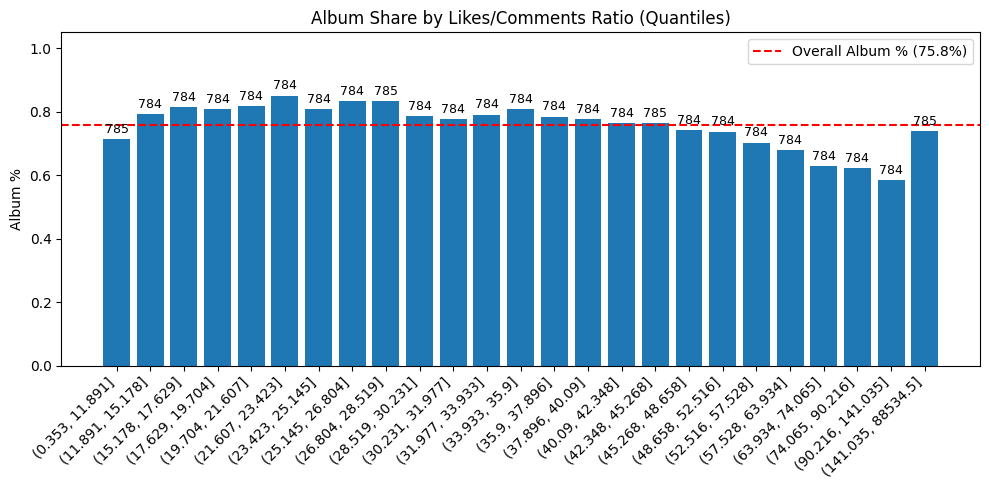

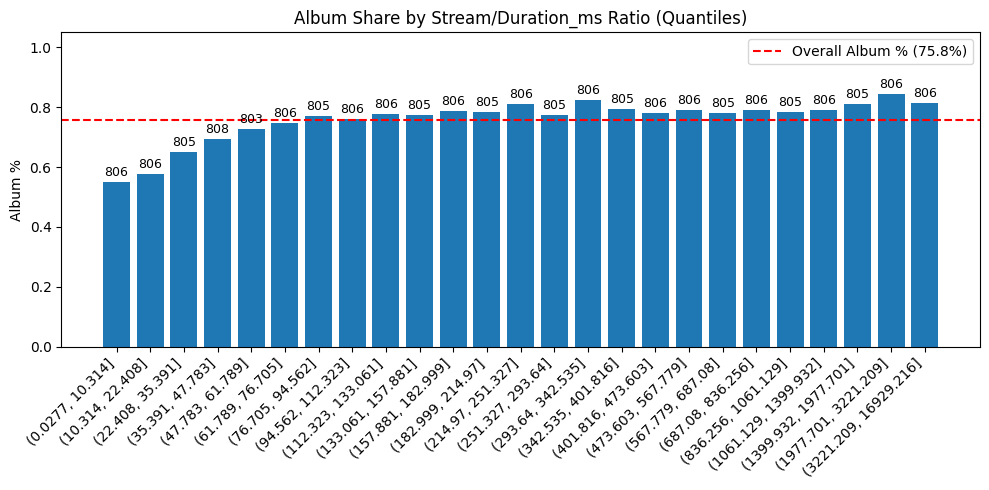

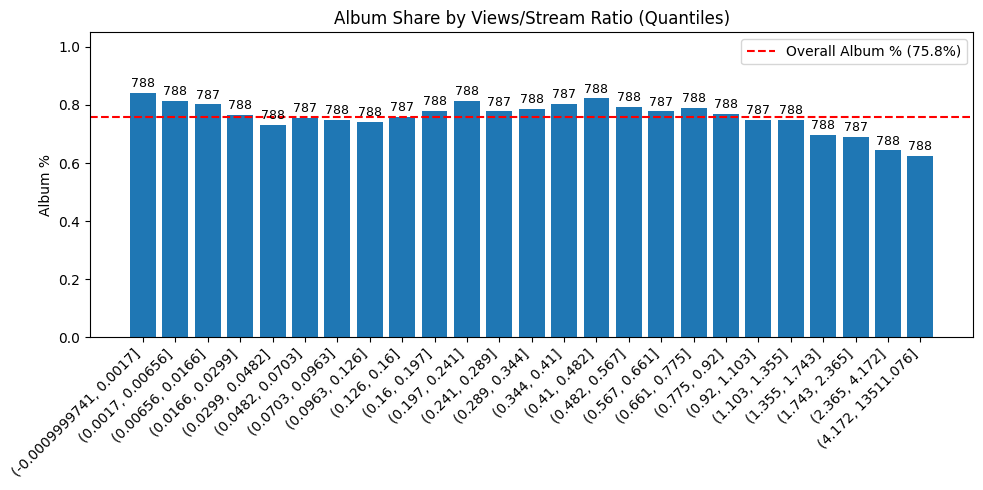

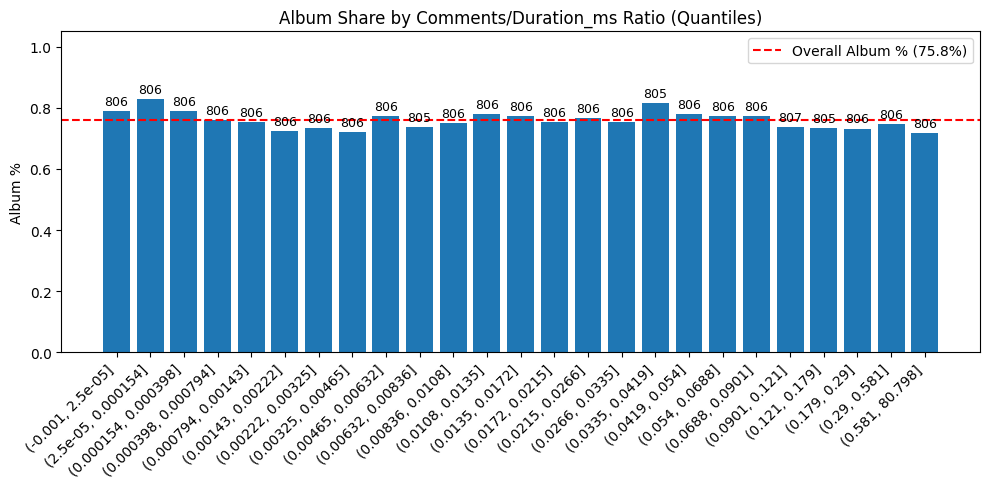

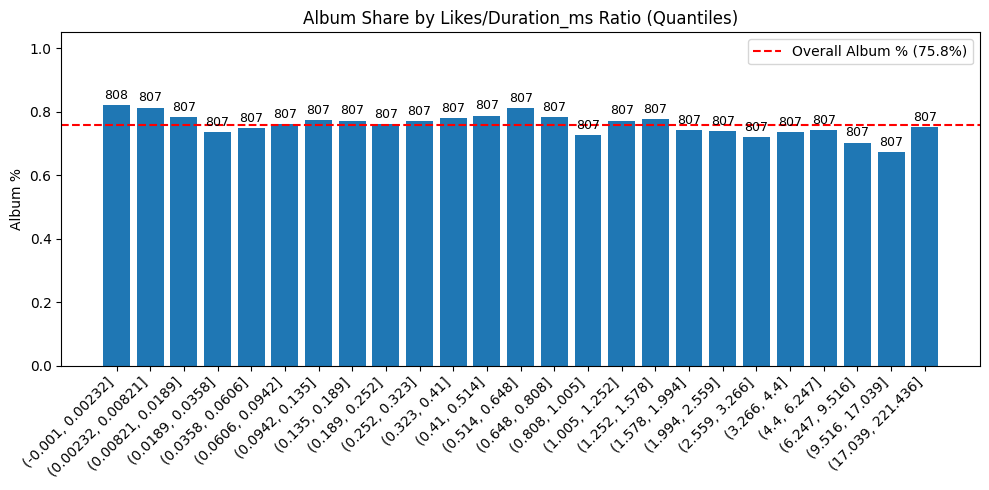

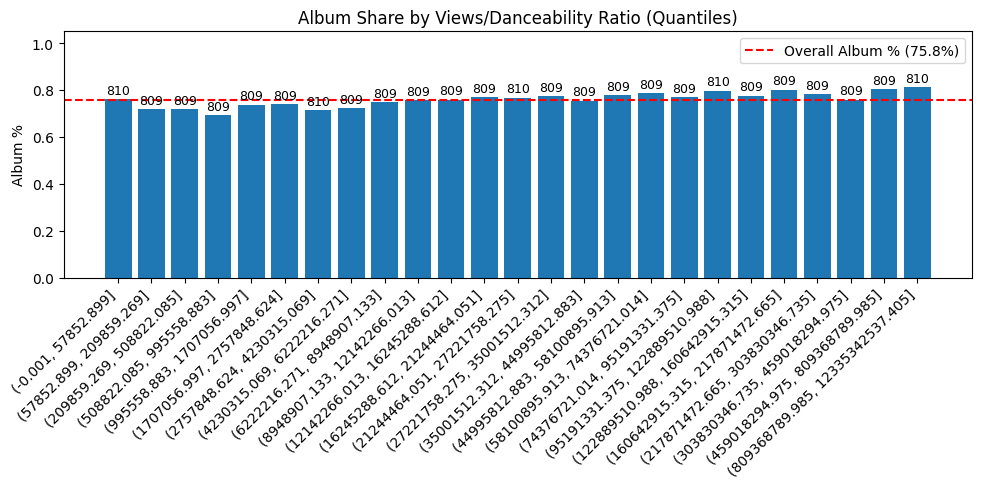

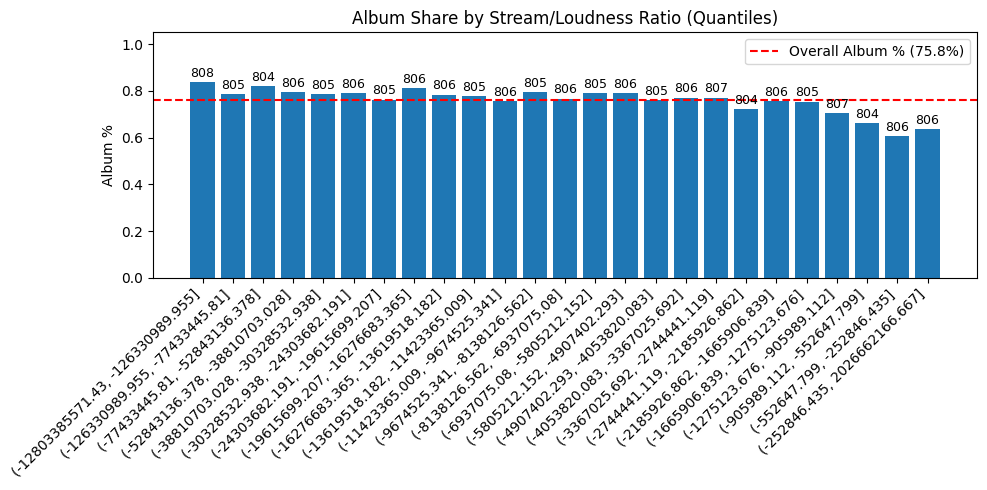

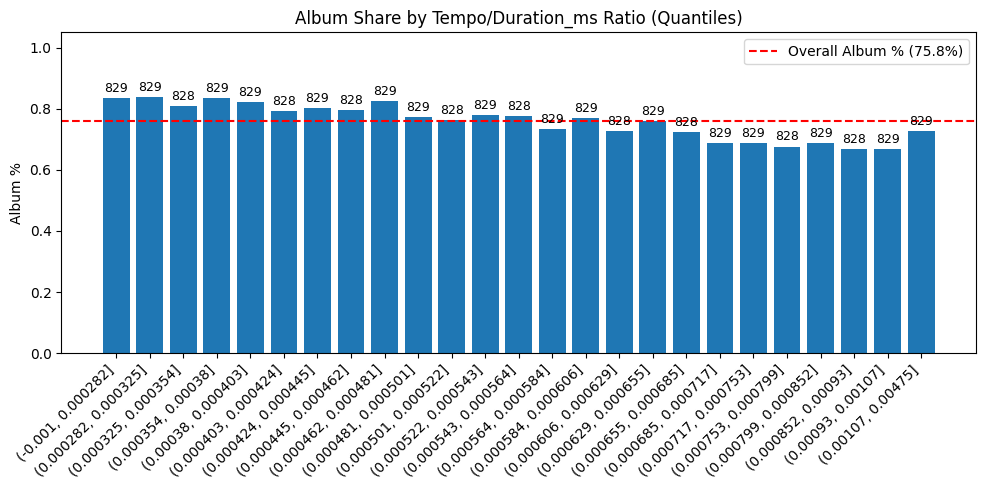

In [ ]:
def plot_album_percentage_multiple_ratios(df, feature_pairs, bins=25):
    df = df.copy()
    df['Album_type'] = df['Album_type'].replace('compilation', 'album')
    album_rate = (df['Album_type'] == 'album').mean()

    for num_feature1, num_feature2 in feature_pairs:
        df_plot = df[[num_feature1, num_feature2, 'Album_type']].dropna()
        df_plot = df_plot[df_plot[num_feature2] != 0]

        ratio_col = f'{num_feature1}_to_{num_feature2}_ratio'
        df_plot[ratio_col] = df_plot[num_feature1] / df_plot[num_feature2]

        bin_col = f'{ratio_col}_quantile'
        df_plot[bin_col] = pd.qcut(df_plot[ratio_col], q=bins, duplicates='drop')

        group_counts = df_plot.groupby([bin_col, 'Album_type'],observed=False).size().unstack(fill_value=0)
        group_counts['Total'] = group_counts.sum(axis=1)
        group_counts['Album %'] = group_counts.get('album', 0) / group_counts['Total']

        # Plot
        plt.figure(figsize=(10, 5))
        x_labels = group_counts.index.astype(str)
        bars = plt.bar(x_labels, group_counts['Album %'])

        plt.axhline(album_rate, color='red', linestyle='--', label=f'Overall Album % ({album_rate:.1%})')

        for bar, total in zip(bars, group_counts['Total']):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                     f'{total}', ha='center', va='bottom', fontsize=9)

        plt.title(f'Album Share by {num_feature1}/{num_feature2} Ratio (Quantiles)')
        plt.ylabel('Album %')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(0, 1.05)
        plt.legend()
        plt.tight_layout()
        plt.show()

feature_pairs = [
    ('Views', 'Comments'),          # viewer engagement
    ('Likes', 'Views'),             # appreciation rate
    ('Likes', 'Comments'),          # like-to-discussion ratio
    ('Stream', 'Duration_ms'),      # stream efficiency
    ('Views', 'Stream'),            # YouTube vs. Spotify preference
    ('Comments', 'Duration_ms'),    # comment rate per song length
    ('Likes', 'Duration_ms'),       # likes per minute
    ('Views', 'Danceability'),      # views per musical feel
    ('Stream', 'Loudness'),         # stream volume correlation
    ('Tempo', 'Duration_ms')        # pacing relative to length
]


plot_album_percentage_multiple_ratios(df, feature_pairs)


### Conclusions
- low view/comment ratio is correlated with higher probability of being a single than in general population.  
- high likes/views ratio is correlated with being single.

these trends might be useful for features we will engineer.


## Boolean features analysis

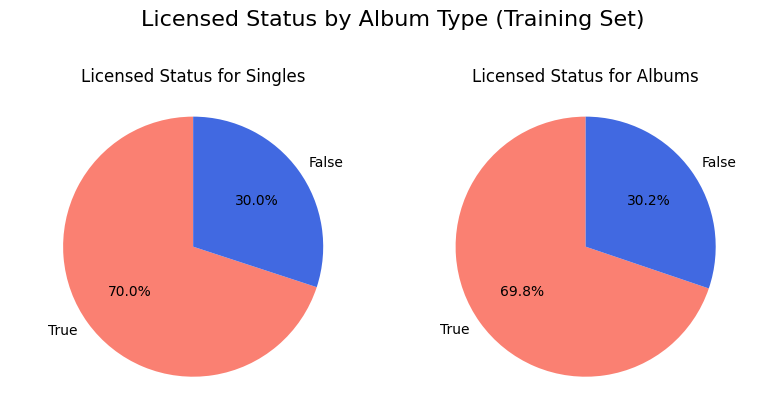

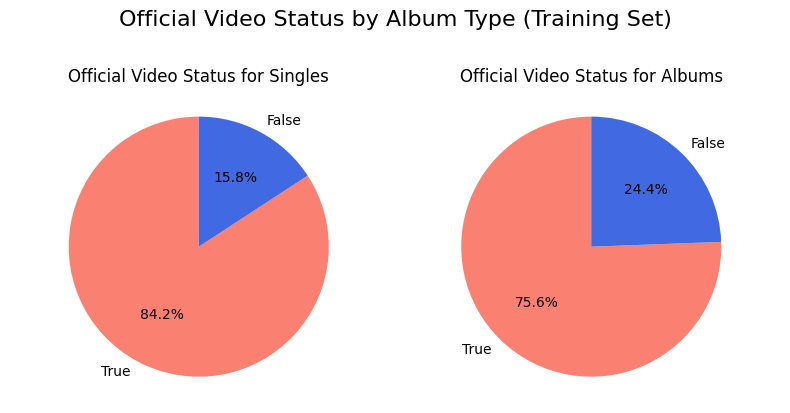

In [ ]:
# Calculate the counts for 'Licensed' within each 'Album_type'
licensed_counts_by_album_type = X_plot.groupby('Album_type')['Licensed'].value_counts()

# Calculate the counts for 'Official_Video' within each 'Album_type'
official_video_counts_by_album_type = X_plot.groupby('Album_type')['official_video'].value_counts()


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plotting Licensed counts by Album Type
# Extracting data for Singles
single_licensed_counts = licensed_counts_by_album_type.loc['single']
axes[0].pie(single_licensed_counts, labels=single_licensed_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'royalblue'])
axes[0].set_title('Licensed Status for Singles')
axes[0].axis('equal')

# Extracting data for Albums
album_licensed_counts = licensed_counts_by_album_type.loc['album']
axes[1].pie(album_licensed_counts, labels=album_licensed_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'royalblue'])
axes[1].set_title('Licensed Status for Albums')
axes[1].axis('equal')

plt.suptitle('Licensed Status by Album Type (Training Set)', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 4))


# Plotting Official Video counts by Album Type


# Extracting data for Singles
single_official_video_counts = official_video_counts_by_album_type.loc['single']
axes[0].pie(single_official_video_counts, labels=single_official_video_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'royalblue'])
axes[0].set_title('Official Video Status for Singles')
axes[0].axis('equal')

# Extracting data for Albums
album_official_video_counts = official_video_counts_by_album_type.loc['album']
axes[1].pie(album_official_video_counts, labels=album_official_video_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'royalblue'])
axes[1].set_title('Official Video Status for Albums')
axes[1].axis('equal')

plt.suptitle('Official Video Status by Album Type (Training Set)', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

### Discussion

albums and singles do not differ in a statistically significant way for the *licensed status*, indicating it is a weak feature and due to the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), should be considered as a candidate for amputation.

in contrast, there seems to be some true difference for official video status: where it is 10% more prevelant in singles than albums.

## String features analysis

###Containing 'album' string
check if there is a difference in distribution of labels among entries with 'album' word in their string features.

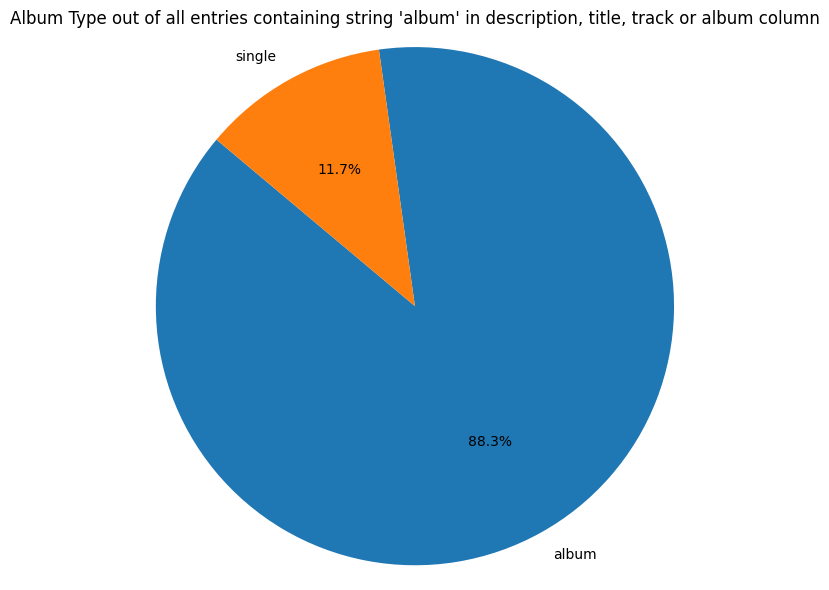

In [ ]:
# Step 1: Combine text columns into a single string per row
text_columns = df[['Description', 'Title', 'Track', 'Album']].astype(str).agg(' '.join, axis=1)

# Step 2: Find rows that contain 'album' or 'bum' (case-insensitive)
album_mentions_mask = text_columns.str.contains(r'album', case=False, na=False)

# Step 3: Filter only those rows
album_mentioned_df = df[album_mentions_mask]

# Step 4: Count actual Album_type for those rows
mention_album_type_counts = album_mentioned_df['Album_type'].value_counts()

# Step 5: Plot as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(mention_album_type_counts.values, labels=mention_album_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Album Type out of all entries containing string 'album' in description, title, track or album column")
plt.axis('equal')
plt.tight_layout()
plt.show()


###Conclusions

we can see that having the string 'album' is a great indicator of the entry being an album, useful for feature engineering.

###Matching Title and Album

Does the 'Title' feature being equal to the 'Album' feature create a subset with a different ratio of albums,singles?

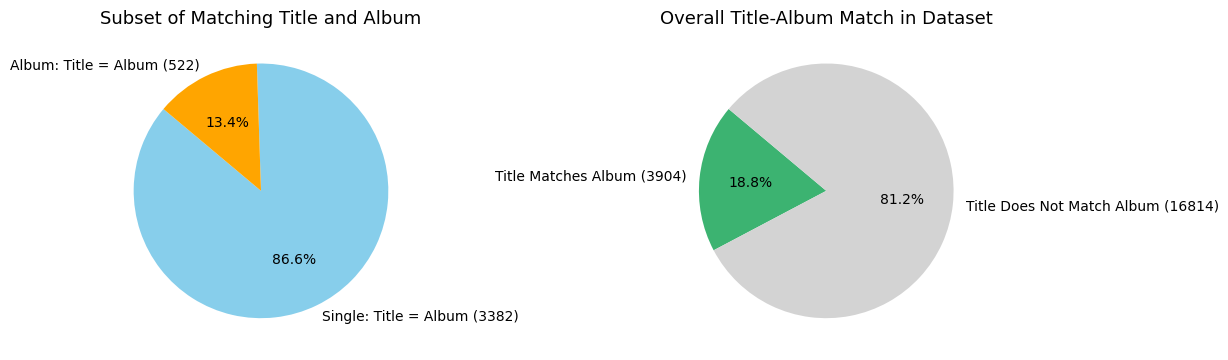

In [ ]:
# Title = Album match column
df_plot['Title_Album_Match'] = df_plot['Track'] == df_plot['Album']

# Compute match counts by type
count_single_equal = ((df_plot['Album_type'] == 'single') & df_plot['Title_Album_Match']).sum()
count_album_equal = ((df_plot['Album_type'] == 'album') & df_plot['Title_Album_Match']).sum()

labels_matching = [
    f"Single: Title = Album ({count_single_equal})",
    f"Album: Title = Album ({count_album_equal})"
]
sizes_matching = [count_single_equal, count_album_equal]
colors_matching = ['skyblue', 'orange']

# Overall match vs mismatch counts
count_match = df_plot['Title_Album_Match'].sum()
count_mismatch = (~df_plot['Title_Album_Match']).sum()

labels_title_match = [
    f'Title Matches Album ({count_match})',
    f'Title Does Not Match Album ({count_mismatch})'
]
sizes_title_match = [count_match, count_mismatch]
colors_title_match = ['mediumseagreen', 'lightgray']

# Side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(sizes_matching, labels=labels_matching, autopct='%1.1f%%', startangle=140, colors=colors_matching)
axes[0].set_title('Subset of Matching Title and Album', fontsize=13)

axes[1].pie(sizes_title_match, labels=labels_title_match, autopct='%1.1f%%', startangle=140, colors=colors_title_match)
axes[1].set_title('Overall Title-Album Match in Dataset', fontsize=13)

plt.tight_layout()
plt.show()


###Explaining results
of all samples, about 18.9% have a matching title and album. among this subset, 86.5% are albums - up from ~75%.

$$P(\text{single} \mid \text{match}) = \frac{P(\text{match} \mid \text{single}) \cdot P(\text{single})}{P(\text{match})} = \frac{0.676 \cdot 0.2414}{0.1884} \approx 0.867$$


### Label predictive power of words
We wanted to test if some words that show up in the data (in description, title, track etc) are indicative of the sample being an album or single. so we count the frequency of all the words among all string features, choose the most frequent and then measure how indicative each word is.

Since the data is imbalanced, we will use a metric called ['Lift'](https://en.wikipedia.org/wiki/Lift_(data_mining))
$$
\text{Lift}(w, c) = \frac{P(c \mid w)}{P(c)}
$$

- $P(c \mid w)$: Probability of class $c$ among rows where the word $w$ appears  
- $P(c)$: Global probability of class $c$ in the full dataset

---

### Intuition

- **Lift > 1** → the word increases the likelihood of class $c$  
- **Lift = 1** → the word gives no new information  
- **Lift < 1** → the word makes class $c$ less likely

---

### Example

Let:

- $P(\text{album}) = 0.75$  
- The word **"volume"** appears in 100 songs  
- Among those, 90 are albums → $P(\text{album} \mid \text{"volume"}) = 0.9$

Then:

$$
\text{Lift}(\text{"volume"}, \text{album}) = \frac{0.9}{0.75} = 1.2
$$

### Most predictive strings in data

In [ ]:
def compute_word_lift(df, cols_to_use, top_n_words=2000, min_word_count=20, output_dir='lift_results'):
    filename = f"lift_top{top_n_words}_min{min_word_count}.csv"
    output_file = os.path.join(output_dir, filename)

    if os.path.exists(output_file):
        print(f"[✓] Loading cached lift results from {output_file}")
        return pd.read_csv(output_file)

    df_copy = df.copy()
    df_copy[cols_to_use] = df_copy[cols_to_use].fillna('').astype(str)

    p_album = (df_copy['Album_type'] == 'album').mean()
    p_single = 1 - p_album

    word_to_rows = defaultdict(list)
    all_tokens_list = []

    for index, row in df_copy.iterrows():
        combined_text = ' '.join([row[col] for col in cols_to_use]).lower()
        tokens = combined_text.split()
        all_tokens_list.extend(tokens)
        for token in set(tokens):
            word_to_rows[token].append(index)

    word_counts = Counter(all_tokens_list)
    most_common_words = [word for word, count in word_counts.most_common(top_n_words) if word in word_to_rows]

    results = []
    current_df_index_set = set(df_copy.index)

    for word in most_common_words:
        valid_rows_indices = [idx for idx in word_to_rows[word] if idx in current_df_index_set]
        count = len(valid_rows_indices)
        if count < min_word_count:
            continue

        album_count = (df_copy.loc[valid_rows_indices, 'Album_type'] == 'album').sum()
        p_album_given_word = album_count / count
        lift_album = p_album_given_word / p_album if p_album > 0 else (np.inf if p_album_given_word > 0 else 1.0)
        lift_single = (1 - p_album_given_word) / p_single if p_single > 0 else (np.inf if (1 - p_album_given_word) > 0 else 1.0)

        results.append((word, lift_album, lift_single, count))

    results_df = pd.DataFrame(results, columns=['word', 'lift_album', 'lift_single', 'count'])

    try:
        os.makedirs(output_dir, exist_ok=True)
        results_df.to_csv(output_file, index=False)
        print(f"[✓] Saved lift results to {output_file}")
    except Exception as e:
        print(f"[✗] Failed to save CSV: {e}")

    return results_df


[✓] Saved lift results to lift_results/lift_top2000_min20.csv


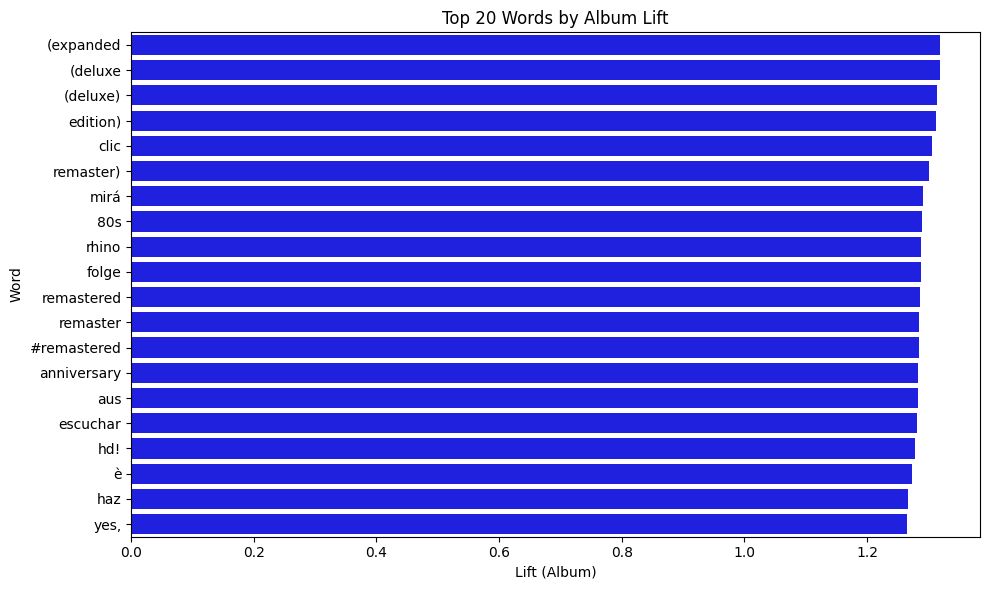

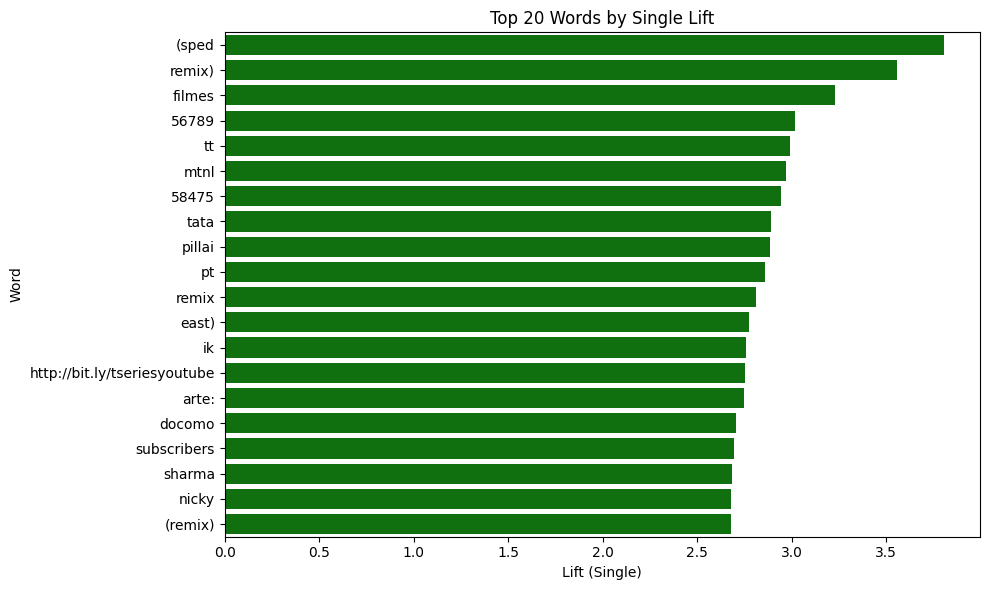

In [ ]:
# --- Plotting Function ---
def plot_top_lift_words(results_df, top_n=20):
    top_album = results_df.sort_values(by='lift_album', ascending=False).head(top_n)
    top_single = results_df.sort_values(by='lift_single', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_album, x='lift_album', y='word', color='blue')
    plt.title(f"Top {top_n} Words by Album Lift")
    plt.xlabel("Lift (Album)")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_single, x='lift_single', y='word', color='green')
    plt.title(f"Top {top_n} Words by Single Lift")
    plt.xlabel("Lift (Single)")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

# --- Call + Plot ---
results_df = compute_word_lift(
    df,
    cols_to_use=['Album', 'Title', 'Track', 'Description'],
    top_n_words=2000,
    min_word_count=20,
)

plot_top_lift_words(results_df, top_n=20)


#### Conclusion

The string 'single' can be a strong indicator of the sample being an album due to **lift analysis**, which measures how much more likely a word appears in one class versus its baseline probability across the entire dataset.

Feature ideas:

Compile a list 'single_related_words' of all words that have very high lift for singles. Do the same for albums. Per query, create the following features:

**int count_single_related_words** - Count of words from the single_related_words list found in the text

**int count_album_related_words** - Count of words from the album_related_words list found in the text

**boolean contains_single_related_words** - True if any words from single_related_words are present

**boolean contains_album_related_words** - True if any words from album_related_words are present

**float ratio_of_count_related_words** - Ratio of album_related_words count to single_related_words count, providing a relative measure of class-specific word density

## Group By: Label distribution among aggregations

###Grouped by Artist

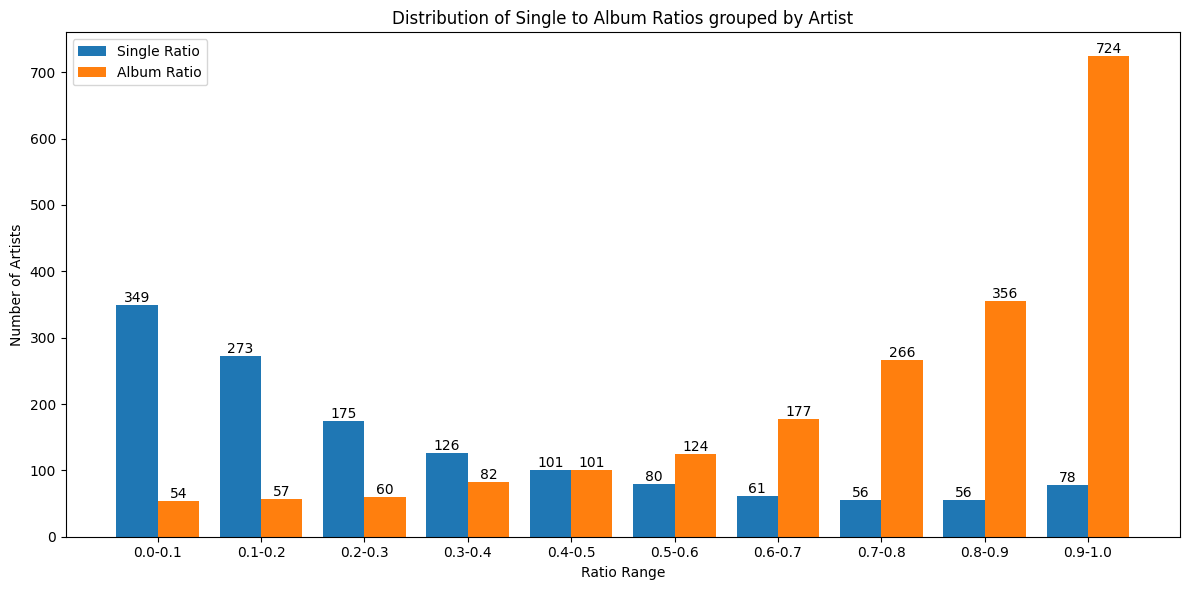

In [ ]:
# Optional: clean rendering
rcParams['text.usetex'] = False
rcParams['mathtext.default'] = 'regular'

# Step 1: Prepare data
df_plot = df.copy()
df_plot['Artist'] = df_plot['Artist'].str.replace('$', 'S', regex=False)
df_plot['Album_type'] = df_plot['Album_type'].replace('compilation', 'album')

# Step 2: Count albums and singles per artist
artist_counts = df_plot.groupby(['Artist', 'Album_type']).size().unstack(fill_value=0)
for col in ['album', 'single']:
    if col not in artist_counts.columns:
        artist_counts[col] = 0

# Step 3: Compute ratios
artist_counts['total'] = artist_counts['single'] + artist_counts['album']
artist_counts = artist_counts[artist_counts['total'] > 0]
artist_counts['Single Ratio'] = artist_counts['single'] / artist_counts['total']
artist_counts['Album Ratio'] = artist_counts['album'] / artist_counts['total']

# Step 4: Create histogram bins
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
single_bin_counts = pd.cut(artist_counts['Single Ratio'], bins).value_counts().sort_index()
album_bin_counts = pd.cut(artist_counts['Album Ratio'], bins).value_counts().sort_index()

# Step 5: Plot bar chart with counts
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(bins) - 1)
bar_width = 0.4

ax.bar([i - bar_width/2 for i in x], single_bin_counts, width=bar_width, label='Single Ratio')
ax.bar([i + bar_width/2 for i in x], album_bin_counts, width=bar_width, label='Album Ratio')

for i in x:
    ax.text(i - bar_width/2, single_bin_counts.values[i], str(single_bin_counts.values[i]), ha='center', va='bottom')
    ax.text(i + bar_width/2, album_bin_counts.values[i], str(album_bin_counts.values[i]), ha='center', va='bottom')

# Finalize plot
ax.set_xticks(x)
ax.set_xticklabels([f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in x])
ax.set_xlabel('Ratio Range')
ax.set_ylabel('Number of Artists')
ax.set_title('Distribution of Single to Album Ratios grouped by Artist')
ax.legend()
plt.tight_layout()
plt.show()


#### Conclusions
As we can see, we have many artists that ONLY release albums and many artists that ONLY release singles.

We can compile a list of artists from the training set that are heavily correlated with releasing albums, and then create a boolean feature for every query: 'is_by_album_oriented_artist'. same for singles.

###Grouped by Channel

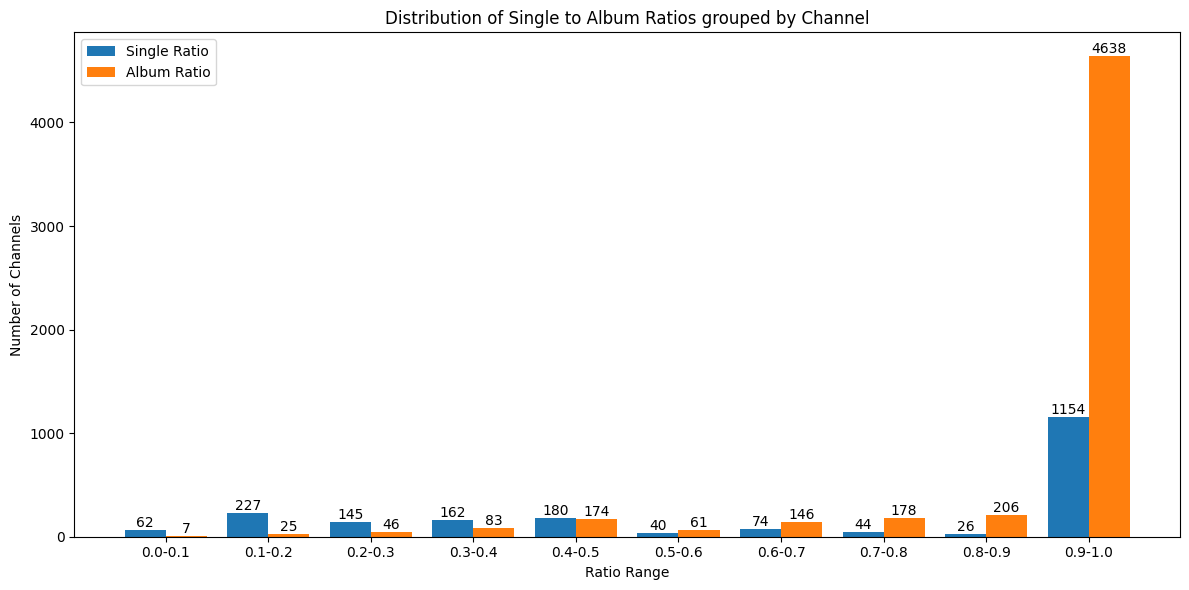

In [ ]:
# Optional: clean rendering
rcParams['text.usetex'] = False
rcParams['mathtext.default'] = 'regular'

# Step 1: Prepare data
df_plot = df.copy()
df_plot['Album_type'] = df_plot['Album_type'].replace('compilation', 'album')

# Step 2: Count albums and singles per channel
channel_counts = df_plot.groupby(['Channel', 'Album_type']).size().unstack(fill_value=0)
for col in ['album', 'single']:
    if col not in channel_counts.columns:
        channel_counts[col] = 0

# Step 3: Compute ratios
channel_counts['total'] = channel_counts['single'] + channel_counts['album']
channel_counts = channel_counts[channel_counts['total'] > 0]
channel_counts['Single Ratio'] = channel_counts['single'] / channel_counts['total']
channel_counts['Album Ratio'] = channel_counts['album'] / channel_counts['total']

# Step 4: Create histogram bins
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
single_bin_counts = pd.cut(channel_counts['Single Ratio'], bins).value_counts().sort_index()
album_bin_counts = pd.cut(channel_counts['Album Ratio'], bins).value_counts().sort_index()

# Step 5: Plot bar chart with counts
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(bins) - 1)
bar_width = 0.4

ax.bar([i - bar_width/2 for i in x], single_bin_counts, width=bar_width, label='Single Ratio')
ax.bar([i + bar_width/2 for i in x], album_bin_counts, width=bar_width, label='Album Ratio')

for i in x:
    ax.text(i - bar_width/2, single_bin_counts.values[i], str(single_bin_counts.values[i]), ha='center', va='bottom')
    ax.text(i + bar_width/2, album_bin_counts.values[i], str(album_bin_counts.values[i]), ha='center', va='bottom')

# Finalize plot
ax.set_xticks(x)
ax.set_xticklabels([f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in x])
ax.set_xlabel('Ratio Range')
ax.set_ylabel('Number of Channels')
ax.set_title('Distribution of Single to Album Ratios grouped by Channel')
ax.legend()
plt.tight_layout()
plt.show()


#### Conclusions
we conclude that many channels have a strong tendency to release exclusively albums or singles. this shows that the 'Channel' feature holds predictive value, same as 'Artist' and will be used to extract features

# PART B - DATA PREPROCESSING

## Handling duplicate data

By observing the data, we notice a phenomena: some samples seem to have identical values across all features except for 1 or 2 (usually Artist).

Example:

In [ ]:
display(df.loc[[12749, 1517]])

Unnamed: 0  Artist                                        Url_spotify  \
12749       12749    Coez  https://open.spotify.com/artist/5dXlc7MnpaTeUI...   
1517         1517  thasup  https://open.spotify.com/artist/19i93sA0D7yS9d...   

                  Track               Album Album_type  \
12749  !ly (feat. Coez)  c@ra++ere s?ec!@le      album   
1517   !ly (feat. Coez)  c@ra++ere s?ec!@le      album   

                                        Uri  Danceability  Energy  Key  ...  \
12749  spotify:track:1E1nbIsPDO1PdtQwsAKKF3         0.765   0.726  7.0  ...   
1517   spotify:track:1E1nbIsPDO1PdtQwsAKKF3         0.765   0.726  7.0  ...   

                                       Url_youtube  \
12749  https://www.youtube.com/watch?v=r1p24SFVk98   
1517   https://www.youtube.com/watch?v=r1p24SFVk98   

                                      Title         Channel      Views  \
12749  thasup - !ly (Visual Video) ft. Coez  thaSupremeVEVO  5914604.0   
1517   thasup - !ly (Visual Video) ft. Coez  thaSupremeVEVO  5914198.0   

         Likes  Comments                                        Description  \
12749  44532.0     814.0  c@ra++ere s?ec!@le: https://thasup.lnk.to/thas...   
1517   44528.0     814.0  c@ra++ere s?ec!@le: https://thasup.lnk.to/thas...   

       Licensed official_video      Stream  
12749      True           True  26314102.0  
1517       True           True  26314102.0  

[2 rows x 28 columns]

This is problematic because it creates a bias in the dataset towards songs that have many different performers.

### Detecting dupes


We notice that if we group by certain sets of features, we filter out different amounts of sampels. in some cases, we filter out almost all samples (like when choosing from a feature with only 3 unique values such as Album_type)
in other cases, we filter none, and in other cases we filter out thousands of samples.


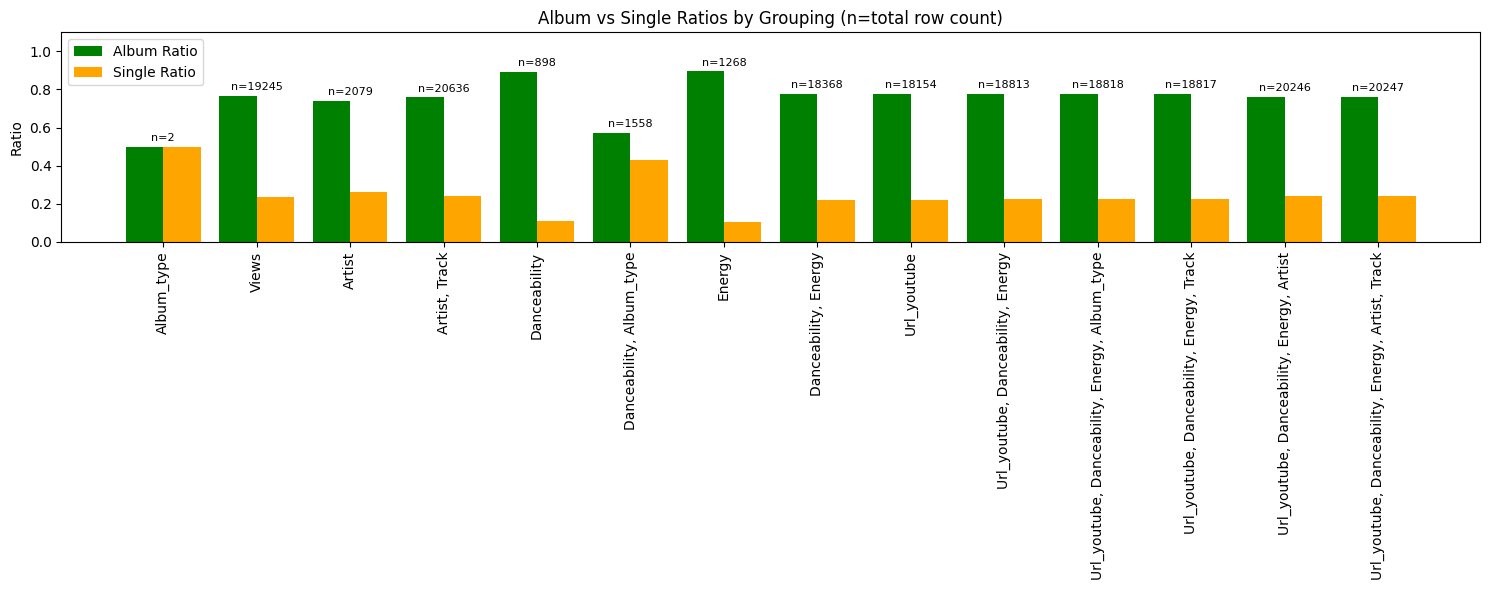

In [ ]:
def album_single_ratio_after_grouping(df, group_cols):
    df = df.copy()
    df = df.dropna(subset=group_cols + ['Album_type'])
    df = df.drop_duplicates(subset=group_cols)
    filtered = df[df['Album_type'].isin(['album', 'single'])]

    counts = filtered['Album_type'].value_counts()
    album = counts.get('album', 0)
    single = counts.get('single', 0)
    total = album + single

    album_ratio = album / total if total > 0 else 0
    single_ratio = single / total if total > 0 else 0

    return {
        'Group': ', '.join(group_cols),
        'Album Ratio': album_ratio,
        'Single Ratio': single_ratio,
        'Total': total
    }

# List of groupings
groupings = [
    ['Album_type'],
    ['Views'],
    ['Artist'],
    ['Artist', 'Track'],
    ['Danceability'],
    ['Danceability', 'Album_type'],
    ['Energy'],
    ['Danceability', 'Energy'],
    ['Url_youtube'],
    ['Url_youtube', 'Danceability', 'Energy'],
    ['Url_youtube', 'Danceability', 'Energy', 'Album_type'],
    ['Url_youtube', 'Danceability', 'Energy', 'Track'],
    ['Url_youtube', 'Danceability', 'Energy', 'Artist'],
    ['Url_youtube', 'Danceability', 'Energy', 'Artist', 'Track']
]

# Apply to DataFrame
results = [album_single_ratio_after_grouping(df, g) for g in groupings]
results_df = pd.DataFrame(results)

# Manual bar plot to annotate
fig, ax = plt.subplots(figsize=(15, 6))
x = range(len(results_df))
bar_width = 0.4

# Bars
bars1 = ax.bar([i - bar_width/2 for i in x], results_df['Album Ratio'], width=bar_width, label='Album Ratio', color='green')
bars2 = ax.bar([i + bar_width/2 for i in x], results_df['Single Ratio'], width=bar_width, label='Single Ratio', color='orange')

# Add group size text above bars
for i, total in enumerate(results_df['Total']):
    max_height = max(bars1[i].get_height(), bars2[i].get_height())
    ax.text(i, max_height + 0.02, f'n={total}', ha='center', va='bottom', fontsize=8)

# Formatting
ax.set_ylabel('Ratio')
ax.set_title('Album vs Single Ratios by Grouping (n=total row count)')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Group'], rotation=90)
ax.legend()
ax.set_ylim(0, 1.1)
plt.tight_layout()
plt.show()


### Handling dupes

---

Question of duplicate definition

we can use this method to clean our data from duplicates. but there is no clear definition of what a duplicate is - does 2 sample 2 having all same values except for 'Artist' count as a duplicate? what about if they have slightly different view count? there is no clear answer.


---

we will consider a sample as a dupe if it has the same 'Url_youtube', 'Danceability', 'Energy'.
* having the exact same url is a good indicator of a dupe
* having the same musical stats (danceability and energy) is a good indicator of being a dupe

both of these conditions combined are a fair indicator for dupes, balancing leniency (not removing enough dupes) and harshness (removing too many dupes). condition for originality.

----

Treatment of dupes

we will drop the duplicates and not calculate a new value by average/median or some other statistic as some features cant or shouldnt be calculated like this (can't average strings, can't take avg of views due to outliers

---


In [ ]:
# Set seed and shuffle the DataFrame. when a duplicate is detected, we keep only the first sample. so this cancels any bias in the ordering of samples.
seed = 42
df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)

# Initial number of rows
initial_len = len(df_shuffled)

# Drop duplicates based on specific columns
df_deduped = df_shuffled.drop_duplicates(subset=['Url_youtube', 'Danceability', 'Energy'])
# Calculate and print number of duplicates removed
removed_count = initial_len - len(df_deduped)
print(f"Duplicates removed: {removed_count}")
df_deduped.info()

df_deduped.describe(include='all')

df = df_deduped

Duplicates removed: 1455
<class 'pandas.core.frame.DataFrame'>
Index: 19263 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        19263 non-null  int64  
 1   Artist            19263 non-null  object 
 2   Url_spotify       19263 non-null  object 
 3   Track             19263 non-null  object 
 4   Album             19263 non-null  object 
 5   Album_type        19263 non-null  object 
 6   Uri               19263 non-null  object 
 7   Danceability      19261 non-null  float64
 8   Energy            19261 non-null  float64
 9   Key               19261 non-null  float64
 10  Loudness          19261 non-null  float64
 11  Speechiness       19261 non-null  float64
 12  Acousticness      19261 non-null  float64
 13  Instrumentalness  19261 non-null  float64
 14  Liveness          19261 non-null  float64
 15  Valence           19261 non-null  float64
 16  Tempo             19

## Row amputation

In [ ]:
print("Before:")
print(df.shape)

# Define the relevant feature columns
features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
            'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
            'Tempo', 'Duration_ms', 'Channel']

# Filter rows with at least one NaN in the selected columns
rows_with_nulls = df[df[features].isnull().any(axis=1)]

df = df.dropna(subset=features)

print("After:")
print(df.shape)

Before:
(19263, 28)
After:
(18813, 28)


### Explanation of amputation/missing values decisions

for the features 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness' 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel' we have decided to amputate the rows with missing values, as there are only ~500 of those and our data has more than 20k samples.


###Missing data calculation with KNN

We still have missing data for likes, comments and streams. we will use KNN on the scaled features that are heavily correlated using k=5 and averaging the neighbors values for that feature.

In [ ]:
# Step 1: Columns to impute
cols = ['Likes', 'Comments', 'Stream', 'Views']

# Step 2: Count rows with at least one null in target columns
rows_with_nulls = df[cols].isna().any(axis=1).sum()
print(f"Rows with at least one null: {rows_with_nulls}")

# Step 3: KNN imputation
imputer = KNNImputer(n_neighbors=5)
df.loc[:, cols] = imputer.fit_transform(df[cols])

# Step 4: Confirm all nulls are filled
nulls_after = df[cols].isna().sum()
print("\nNulls after KNN imputation:")
print(nulls_after)


Rows with at least one null: 679

Nulls after KNN imputation:
Likes       0
Comments    0
Stream      0
Views       0
dtype: int64


### Missing description
note that there are still missing values for description. since we cannot estimate a string, and we use information regarding that string for feature engineering, we've decided to keep it as null. our code would have to treat such cases (for example for the feature count_single_related_words if the value of the Description is null, we will use the median value or some other estimate)

##Numerical Data Transformation

In [ ]:
# Drop duplicates
df_deduped = df_shuffled.drop_duplicates(subset=['Url_youtube', 'Danceability', 'Energy']).copy()

# --- Transform the basic features ---

# 1. Log scale: Stream, Views, Likes, Comments
df_deduped['Stream'] = np.log1p(df_deduped['Stream'])
df_deduped['Views'] = np.log1p(df_deduped['Views'])
df_deduped['Likes'] = np.log1p(df_deduped['Likes'])
df_deduped['Comments'] = np.log1p(df_deduped['Comments'])

# 2. MinMax scale: Stream, Views, Likes, Comments
minmax_scaler = MinMaxScaler()
df_deduped[['Stream', 'Views', 'Likes', 'Comments']] = minmax_scaler.fit_transform(
    df_deduped[['Stream', 'Views', 'Likes', 'Comments']]
)

# 3. Standard scale: Tempo, Loudness, Key
standard_scaler = StandardScaler()
df_deduped[['Tempo', 'Loudness', 'Key']] = standard_scaler.fit_transform(
    df_deduped[['Tempo', 'Loudness', 'Key']]
)

# 4. Winsorize and scale Duration_ms
df_deduped['Duration_ms'] = winsorize(df_deduped['Duration_ms'], limits=(0, 0.01))
df_deduped['Duration_ms'] = np.log1p(df_deduped['Duration_ms'])
duration_scaler = MinMaxScaler()
df_deduped[['Duration_ms']] = duration_scaler.fit_transform(df_deduped[['Duration_ms']])

# 5. Convert booleans: Licensed and official_video
df_deduped['Licensed'] = df_deduped['Licensed'].fillna(False).astype(int)
df_deduped['official_video'] = df_deduped['official_video'].fillna(False).astype(int)

# --- Visualize the results ---
df_deduped.describe()


<ipython-input-24-3098721290>:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_deduped['Licensed'] = df_deduped['Licensed'].fillna(False).astype(int)
<ipython-input-24-3098721290>:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_deduped['official_video'] = df_deduped['official_video'].fillna(False).astype(int)


Unnamed: 0  Danceability        Energy           Key      Loudness  \
count  19263.000000  19261.000000  19261.000000  1.926100e+04  1.926100e+04   
mean   10190.707366      0.616786      0.633852  1.136219e-16 -1.453475e-16   
std     5929.734879      0.165229      0.216017  1.000026e+00  1.000026e+00   
min        0.000000      0.000000      0.000020 -1.483123e+00 -8.279398e+00   
25%     5090.500000      0.514000      0.503000 -9.231012e-01 -2.654323e-01   
50%    10059.000000      0.634000      0.665000 -8.306850e-02  2.447896e-01   
75%    15278.000000      0.738000      0.799000  7.569642e-01  5.946806e-01   
max    20717.000000      0.975000      1.000000  1.596997e+00  1.858630e+00   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  19261.000000  19261.000000      19261.000000  19261.000000   
mean       0.095269      0.291800          0.057319      0.193604   
std        0.112437      0.288729          0.195043      0.168418   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035300      0.042600          0.000000      0.094200   
50%        0.049800      0.191000          0.000003      0.125000   
75%        0.101000      0.483000          0.000536      0.238000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  19261.000000  1.926100e+04  19263.000000  18814.000000  18744.000000   
mean       0.529231 -3.004709e-16      0.710274      0.699636      0.636678   
std        0.246865  1.000026e+00      0.109909      0.123997      0.144453   
min        0.000000 -4.074920e+00      0.000000      0.000000      0.000000   
25%        0.338000 -8.011828e-01      0.651021      0.628565      0.558590   
50%        0.536000 -2.558854e-02      0.713054      0.719408      0.656487   
75%        0.728000  6.494238e-01      0.775267      0.789290      0.737430   
max        0.993000  4.139446e+00      1.000000      1.000000      1.000000   

           Comments      Licensed  official_video        Stream  
count  18717.000000  19263.000000    19263.000000  18704.000000  
mean       0.460446      0.678295        0.753517      0.670104  
std        0.164231      0.467143        0.430974      0.125716  
min        0.000000      0.000000        0.000000      0.000000  
25%        0.371307      0.000000        1.000000      0.597929  
50%        0.483916      1.000000        1.000000      0.677219  
75%        0.573128      1.000000        1.000000      0.754523  
max        1.000000      1.000000        1.000000      1.000000

### Transformation Methods by Feature Type

**Tempo, Loudness:** *Standardization*  
Preserves distribution shape while normalizing scale for algorithms sensitive to feature magnitude.

**Streams, Views, Likes, Comments:** *Log + Min-Max Scaling*  
$$\text{MinMax}(\log(x + 1))$$  
Log transformation addresses heavy-tailed distributions; min-max ensures equal contribution across features.

**Key:** *Standardization*  
Discrete numerical feature with small range standardized to $\mu=0, \sigma=1$ for scale-sensitive models.

**Duration:** *Winsorization*  
Caps extreme values at 99th percentile to mitigate outliers (live recordings, medleys) while preserving original millisecond scale and distribution shape.

**Danceability, Energy, Valence:** *No Transformation*  
Features already normalized to [0,1] scale, requiring no additional preprocessing.

## Transformations Pipeline

to ensure the transformations are applied in a modular and even way, we create a pipeline. first it will be fitted with the training data and it will calculate the values needed for feature engineering. then we transform the given validate/test data.

In [ ]:
class FeaturePipeline:
    def __init__(self, lift_file='lifts_top2000_min20_plot40.csv'):
        self.album_song_counts = {}
        self.avg_artist_views = {}
        self.total_album_length = {}

        self.album_oriented_artists = set()
        self.single_oriented_artists = set()
        self.artist_album_ratio = {}

        self.album_oriented_channels = set()
        self.single_oriented_channels = set()
        self.channel_album_ratio = {}

        self.single_words = set()
        self.album_words = set()
        self.strong_single_words = set()

        self.word_lift_album = {}
        self.word_lift_single = {}
        self.lift_file = lift_file

        self.generated_feature_names = []
        self.scaler = RobustScaler()


    def fit(self, df):
        self.album_song_counts = df.groupby('Album').size().to_dict()

        if 'Views' in df.columns:
            self.avg_artist_views = df.groupby('Artist')['Views'].mean().to_dict()
        else:
            print("Warning: 'Views' column not found in df during FeaturePipeline fit.")
            self.avg_artist_views = {}

        if 'Duration_ms' in df.columns:
            self.total_album_length = df.groupby('Album')['Duration_ms'].sum().to_dict()
        else:
            print("Warning: 'Duration_ms' column not found in df during FeaturePipeline fit.")
            self.total_album_length = {}

        if 'Album_type' in df.columns:
            artist_ct = df.groupby(['Artist', 'Album_type']).size().unstack(fill_value=0)
            for col in ['album', 'single']:
                if col not in artist_ct.columns:
                    artist_ct[col] = 0
            artist_totals = artist_ct.sum(axis=1)
            artist_album_ratio = artist_ct.get('album', 0) / artist_totals.replace(0, np.nan)
            artist_single_ratio = artist_ct.get('single', 0) / artist_totals.replace(0, np.nan)

            self.artist_album_ratio = artist_album_ratio.fillna(0).to_dict()
            self.album_oriented_artists = set(artist_album_ratio[artist_album_ratio >= 0.9].dropna().index)
            self.single_oriented_artists = set(artist_single_ratio[artist_single_ratio >= 0.9].dropna().index)

            self.global_album_ratio_artist = np.nanmean(list(self.artist_album_ratio.values())) if self.artist_album_ratio else 0.5
            if np.isnan(self.global_album_ratio_artist):
                self.global_album_ratio_artist = 0.5

            channel_ct = df.groupby(['Channel', 'Album_type']).size().unstack(fill_value=0)
            for col in ['album', 'single']:
                if col not in channel_ct.columns:
                    channel_ct[col] = 0
            channel_totals = channel_ct.sum(axis=1)
            channel_album_ratio = channel_ct.get('album', 0) / channel_totals.replace(0, np.nan)
            channel_single_ratio = channel_ct.get('single', 0) / channel_totals.replace(0, np.nan)

            self.channel_album_ratio = channel_album_ratio.fillna(0).to_dict()
            self.album_oriented_channels = set(channel_album_ratio[channel_album_ratio >= 0.9].dropna().index)
            self.single_oriented_channels = set(channel_single_ratio[channel_single_ratio >= 0.9].dropna().index)

            self.global_album_ratio_channel = np.nanmean(list(self.channel_album_ratio.values())) if self.channel_album_ratio else 0.5
            if np.isnan(self.global_album_ratio_channel):
                self.global_album_ratio_channel = 0.5
        else:
            self.artist_album_ratio = {}
            self.album_oriented_artists = set()
            self.single_oriented_artists = set()
            self.global_album_ratio_artist = 0.5

            self.channel_album_ratio = {}
            self.album_oriented_channels = set()
            self.single_oriented_channels = set()
            self.global_album_ratio_channel = 0.5
            print("Warning: 'Album_type' missing, skipping ratio calculations.")

        try:
            results_df = compute_word_lift(
                df,
                cols_to_use=['Album', 'Title', 'Track', 'Description'],
                top_n_words=1000,
                min_word_count=20,
            )

            self.single_words = set(results_df[results_df['lift_single'] > 1.2]['word'])
            self.album_words = set(results_df[results_df['lift_album'] > 1.2]['word'])
            self.strong_single_words = set(results_df[results_df['lift_single'] > 3]['word'])

            self.word_lift_album = results_df.set_index('word')['lift_album'].to_dict()
            self.word_lift_single = results_df.set_index('word')['lift_single'].to_dict()

        except Exception as e:
            print(f"Error computing word lifts: {e}")
            self.single_words = set()
            self.album_words = set()
            self.strong_single_words = set()
            self.word_lift_album = {}
            self.word_lift_single = {}

    def transform(self, df):
        df = df.copy()
        new_features = []

        df['TA_Album_Song_Count'] = df['Album'].map(self.album_song_counts).fillna(0)
        df['TA_Avg_Artist_Views'] = df['Artist'].map(self.avg_artist_views).fillna(df['Views'].mean() if 'Views' in df.columns else 0)
        df['TA_Song_Name_Length'] = df['Track'].fillna('').astype(str).apply(lambda x: len(x.split()))
        df['TA_Total_Album_Length'] = df['Album'].map(self.total_album_length).fillna(0)

        fitness_cols = ['Danceability', 'Energy', 'Loudness', 'Valence']
        existing_fitness_cols = [col for col in fitness_cols if col in df.columns]
        if existing_fitness_cols:
            df['TA_Fitness_for_Clubs'] = df[existing_fitness_cols].mean(axis=1)
        else:
            df['TA_Fitness_for_Clubs'] = 0

        new_features += [
            'TA_Album_Song_Count', 'TA_Avg_Artist_Views', 'TA_Song_Name_Length',
            'TA_Total_Album_Length', 'TA_Fitness_for_Clubs'
        ]

        feature_pairs = [
            ('Views', 'Comments'), ('Comments', 'Views'), ('Likes', 'Views'), ('Views', 'Likes'),
            ('Likes', 'Comments'), ('Comments', 'Likes'),
            ('Stream', 'Duration_ms'), ('Duration_ms', 'Stream'),
            ('Views', 'Stream'), ('Stream', 'Views'),
            ('Comments', 'Duration_ms'), ('Duration_ms', 'Comments'),
            ('Likes', 'Duration_ms'), ('Duration_ms', 'Likes'),
            ('Views', 'Danceability'), ('Danceability', 'Views'),
            ('Stream', 'Loudness'), ('Loudness', 'Stream'),
            ('Tempo', 'Duration_ms'), ('Duration_ms', 'Tempo')
        ]

        for num1, num2 in feature_pairs:
            col_name = f'RAT_{num1}_to_{num2}_ratio'
            if num1 in df.columns and num2 in df.columns:
                df[col_name] = (df[num1] / df[num2].replace(0, np.nan)).fillna(0)
            else:
                df[col_name] = 0
            new_features.append(col_name)

        df['Artist_Album_Ratio'] = df['Artist'].map(self.artist_album_ratio).fillna(self.global_album_ratio_artist)
        df['Is_By_Album_Oriented_Artist'] = df['Artist'].apply(lambda x: int(x in self.album_oriented_artists))
        df['Is_By_Single_Oriented_Artist'] = df['Artist'].apply(lambda x: int(x in self.single_oriented_artists))

        df['Channel_Album_Ratio'] = df['Channel'].map(self.channel_album_ratio).fillna(self.global_album_ratio_channel)
        df['Is_By_Album_Oriented_Channel'] = df['Channel'].apply(lambda x: int(x in self.album_oriented_channels))
        df['Is_By_Single_Oriented_Channel'] = df['Channel'].apply(lambda x: int(x in self.single_oriented_channels))

        df['Title_Equals_Album'] = (df['Track'].fillna('') == df['Album'].fillna('')).astype(int)
        df['One_Track_Album'] = (df['TA_Album_Song_Count'] == 1).astype(int)

        new_features += [
            'Artist_Album_Ratio', 'Is_By_Album_Oriented_Artist', 'Is_By_Single_Oriented_Artist',
            'Channel_Album_Ratio', 'Is_By_Album_Oriented_Channel', 'Is_By_Single_Oriented_Channel',
            'Title_Equals_Album', 'One_Track_Album'
        ]

        text_cols = ['Album', 'Title', 'Track', 'Description']
        existing_text_cols = [col for col in text_cols if col in df.columns]

        if existing_text_cols:
            df['joined_text'] = df[existing_text_cols].fillna('').astype(str).agg(' '.join, axis=1).str.lower()
            df['joined_tokens'] = df['joined_text'].str.split()
        else:
            df['joined_tokens'] = [[]] * len(df)
            print("Warning: No text columns found for word lift features.")

        df['count_single_related_words'] = df['joined_tokens'].apply(lambda tokens: sum(w in self.single_words for w in tokens))
        df['count_album_related_words'] = df['joined_tokens'].apply(lambda tokens: sum(w in self.album_words for w in tokens))
        df['contains_single_related_words'] = (df['count_single_related_words'] > 0).astype(int)
        df['contains_album_related_words'] = (df['count_album_related_words'] > 0).astype(int)

        denominator = df['count_album_related_words'] + df['count_single_related_words']
        df['ratio_of_count_related_words'] = (df['count_album_related_words'] / denominator.replace(0, np.nan)).fillna(0.5)

        df['sum_lift_album'] = df['joined_tokens'].apply(lambda tokens: sum(self.word_lift_album.get(w, 1.0) for w in tokens))
        df['sum_lift_single'] = df['joined_tokens'].apply(lambda tokens: sum(self.word_lift_single.get(w, 1.0) for w in tokens))

        token_count = df['joined_tokens'].apply(len).replace(0, np.nan)
        df['avg_lift_album'] = (df['sum_lift_album'] / token_count).fillna(1.0)
        df['avg_lift_single'] = (df['sum_lift_single'] / token_count).fillna(1.0)

        df['count_strong_single_lift_words'] = df['joined_tokens'].apply(lambda tokens: sum(w in self.strong_single_words for w in tokens))

        df['net_lift_score'] = df['sum_lift_single'] - df['sum_lift_album']
        df['norm_net_lift_score'] = (df['net_lift_score'] / token_count).fillna(0.0)

        denominator_dominance = df['sum_lift_single'] + df['sum_lift_album']
        df['dominance_score'] = (df['sum_lift_single'] / denominator_dominance.replace(0, np.nan)).fillna(0.5)

        df['random_noise'] = np.random.rand(len(df))
        df['some number'] = 3.14

        df['TA_Duration_min'] = df['Duration_ms'] / (1000 * 60)
        df['Is_Duration_Between_2_354_and_3_197_min'] = df['TA_Duration_min'].between(2.354, 3.197).astype(int)

        new_features += [
            'count_single_related_words', 'count_album_related_words',
            'contains_single_related_words', 'contains_album_related_words',
            'ratio_of_count_related_words', 'sum_lift_album', 'sum_lift_single',
            'avg_lift_album', 'avg_lift_single', 'count_strong_single_lift_words',
            'net_lift_score', 'norm_net_lift_score', 'dominance_score',
            'TA_Duration_min', 'Is_Duration_Between_2_354_and_3_197_min'
        ]

        self.generated_feature_names = new_features

        # Normalize numeric engineered features
        numeric_cols = df[new_features].select_dtypes(include='number').columns
        if hasattr(self.scaler, 'center_'):
            df[numeric_cols] = self.scaler.transform(df[numeric_cols])

        return df

    def fit_transform(self, df):
        self.fit(df)
        df_transformed = self.transform(df)
        numeric_cols = df_transformed[self.generated_feature_names].select_dtypes(include='number').columns
        self.scaler.fit(df_transformed[numeric_cols])
        df_transformed[numeric_cols] = self.scaler.transform(df_transformed[numeric_cols])
        return df_transformed

    def get_feature_importance(self, model, feature_names=None):
        if feature_names is None or (isinstance(feature_names, (list, pd.Index)) and len(feature_names) == 0):
            feature_names = self.generated_feature_names

        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_).flatten()
        else:
            raise ValueError("Model does not have feature_importances_ or coef_ attribute.")

        if len(importances) != len(feature_names):
            print("Warning: number of importances and feature_names differ!")

        return pd.DataFrame({
            'feature': feature_names[:len(importances)],
            'importance': importances
        }).sort_values('importance', ascending=False)


###Explanation of engineered features

**Aggregate Features (TA_*)**
- **`TA_Album_Song_Count`**: Number of songs per album - distinguishes single-track albums from multi-track albums
- **`TA_Avg_Artist_Views`**: Average views per artist - captures artist popularity and reach
- **`TA_Song_Name_Length`**: Word count in track title - singles often have shorter, catchier titles
- **`TA_Total_Album_Length`**: Total duration of entire album - albums typically longer than singles
- **`TA_Fitness_for_Clubs`**: Average of danceability, energy, loudness, valence - measures commercial appeal

#### **Ratio Features (RAT_*)**
Cross-feature ratios like `Views_to_Comments_ratio`, `Likes_to_Views_ratio` capture engagement patterns and content performance metrics that may differ between albums and singles.

#### **Artist/Channel Behavioral Features**
- **`Artist_Album_Ratio`**: Historical proportion of albums vs singles by artist
- **`Is_By_Album/Single_Oriented_Artist`**: Binary flags for artists with ≥90% preference
- **Channel equivalents**: Same logic applied to publishing channels

#### **Text-Based Lift Features**
Derived from word lift analysis:
- **`count_single/album_related_words`**: Count of high-lift words per category
- **`sum/avg_lift_single/album`**: Aggregate lift scores across all words
- **`dominance_score`**: $\frac{\text{single\_lift}}{\text{single\_lift + album\_lift}}$ - word preference ratio
- **`net_lift_score`**: Difference between single and album lift scores

#### **Logical Features**
- **`Title_Equals_Album`**: Binary flag when track name equals album name (common for singles)
- **`One_Track_Album`**: Binary flag for single-track releases
- **`Is_Duration_Between_2_354_and_3_197_min`**: Optimal duration range for radio-friendly singles

###Average Feature using Random forest and average depth

[✓] Saved lift results to lift_results/lift_top1000_min20.csv
[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv


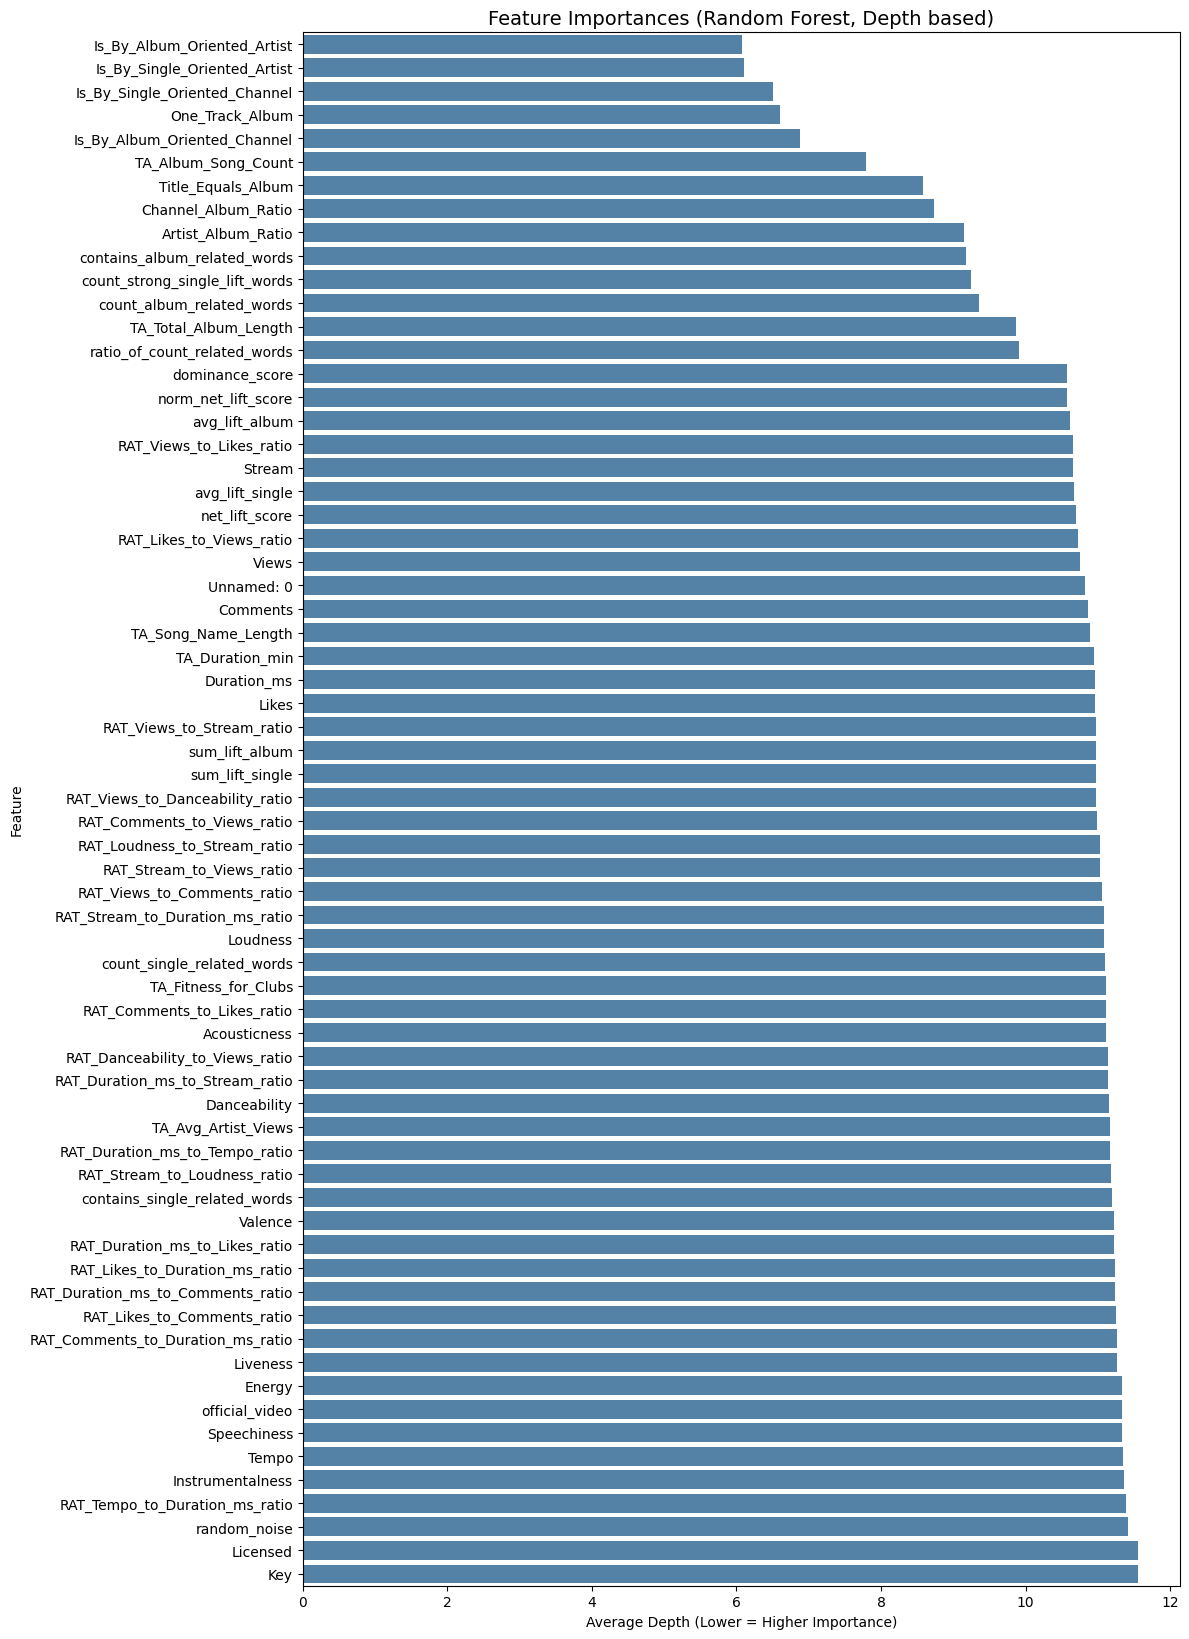

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=421)
depths_across_folds = defaultdict(list)

df_deduped = df_deduped[df_deduped['Album_type'].isin(['album', 'single'])]

X = df_deduped.drop(columns=['Album_type'])
y = df_deduped['Album_type'].map({'album': 1, 'single': 0})

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train_raw, X_val_raw = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    X_train_raw['Album_type'] = y_train.map({1: 'album', 0: 'single'})
    X_val_raw['Album_type'] = y_val.map({1: 'album', 0: 'single'})

    pipeline = FeaturePipeline()
    X_train = pipeline.fit_transform(X_train_raw)
    X_train = X_train.select_dtypes(include=[np.number]).fillna(0)

    feature_names = X_train.columns.tolist()

    clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=22)
    clf.fit(X_train, y_train)

    #Compute depth for each tree
    for tree in clf.estimators_:
        tree_ = tree.tree_

        def traverse(node=0, depth=0):
            feature_idx = tree_.feature[node]
            if feature_idx != -2:
                feature_name = feature_names[feature_idx]
                depths_across_folds[feature_name].append(depth)
                traverse(tree_.children_left[node], depth + 1)
                traverse(tree_.children_right[node], depth + 1)

        traverse()

#Calculate average depths
avg_depth_df = pd.DataFrame({
    'Feature': list(depths_across_folds.keys()),
    'Avg_Depth': [np.mean(depths) for depths in depths_across_folds.values()]}).sort_values(by='Avg_Depth')# Lower depth = higher importance

#Plot all features
plt.figure(figsize=(12, max(6, len(avg_depth_df) * 0.25)))
sns.barplot(data=avg_depth_df, x='Avg_Depth', y='Feature', color='steelblue')
plt.title('Feature Importances (Random Forest, Depth based)', fontsize=14)
plt.xlabel('Average Depth (Lower = Higher Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



### Feature filtering

some features correlate heavily with one another, meaning they add a dimension without adding new information. we can find these features and choose only the highest importance one of the pair.

In [ ]:
# --- Data preparation ---
X = df_deduped.drop(columns=['Album_type'])
y = df_deduped['Album_type'].map({'album': 1, 'single': 0})
X = X.drop(index=y[y.isna()].index)
y = y.dropna().squeeze()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
importances_list = []
feature_names = []

# --- Cross-validation and importance collection ---
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train_raw, X_val_raw = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    X_train_raw['Album_type'] = y_train.map({1: 'album', 0: 'single'})
    X_val_raw['Album_type'] = y_val.map({1: 'album', 0: 'single'})

    pipeline = FeaturePipeline()
    X_train = pipeline.fit_transform(X_train_raw)
    X_train = X_train.astype({col: int for col in X_train.select_dtypes(bool).columns})
    X_train = X_train.select_dtypes(include=[np.number]).fillna(0)

    X_val = pipeline.transform(X_val_raw)
    X_val = X_val.astype({col: int for col in X_val.select_dtypes(bool).columns})
    X_val = X_val.select_dtypes(include=[np.number]).fillna(0)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    importances_list.append(clf.feature_importances_)
    feature_names = X_train.columns.tolist()

avg_importances = np.mean(importances_list, axis=0)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': avg_importances
})
importance_df['Highlight'] = importance_df['Feature'].apply(
    lambda x: 'Random Noise' if x == 'random_noise' else 'Other'
)


[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv


In [ ]:
# --- Full feature matrix for correlation filtering ---
df_deduped_filtered = df_deduped[df_deduped['Album_type'].isin(['album', 'single'])].copy()
df_deduped_filtered['Album_type'] = df_deduped_filtered['Album_type'].map({'album': 1, 'single': 0})

pipeline = FeaturePipeline()
X_full = pipeline.fit_transform(df_deduped_filtered)
X_full = X_full.astype({col: int for col in X_full.select_dtypes(bool).columns})
X_full = X_full.select_dtypes(include=[np.number]).fillna(0)

# --- Drop highly correlated features using importance ---
corr_matrix = X_full.corr().abs()
importance_map = dict(zip(importance_df['Feature'], importance_df['Importance']))
to_drop = set()

print("Highly correlated feature pairs (>|0.9|) and drop decisions:")
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        f1, f2 = corr_matrix.columns[i], corr_matrix.columns[j]
        corr = corr_matrix.iloc[i, j]
        if corr > 0.9:
            imp1, imp2 = importance_map.get(f1, 0), importance_map.get(f2, 0)
            if imp1 >= imp2:
                to_drop.add(f2)
                print(f"- Dropped '{f2}' (importance={imp2:.4f}) due to high correlation ({corr:.2f}) with '{f1}' (importance={imp1:.4f})")
            else:
                to_drop.add(f1)
                print(f"- Dropped '{f1}' (importance={imp1:.4f}) due to high correlation ({corr:.2f}) with '{f2}' (importance={imp2:.4f})")

X_full_reduced = X_full.drop(columns=to_drop)


[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
Highly correlated feature pairs (>|0.9|) and drop decisions:
- Dropped 'TA_Fitness_for_Clubs' (importance=0.0039) due to high correlation (0.96) with 'Loudness' (importance=0.0042)
- Dropped 'TA_Duration_min' (importance=0.0047) due to high correlation (1.00) with 'Duration_ms' (importance=0.0048)
- Dropped 'Likes' (importance=0.0043) due to high correlation (0.95) with 'Views' (importance=0.0055)
- Dropped 'Comments' (importance=0.0038) due to high correlation (0.94) with 'RAT_Comments_to_Views_ratio' (importance=0.0038)
- Dropped 'TA_Album_Song_Count' (importance=0.0273) due to high correlation (0.98) with 'TA_Total_Album_Length' (importance=0.0366)
- Dropped 'RAT_Likes_to_Comments_ratio' (importance=0.0039) due to high correlation (0.97) with 'RAT_Views_to_Comments_ratio' (importance=0.0041)
- Dropped 'RAT_Duration_ms_to_Comments_ratio' (importance=0.0037) due to high correlation (0.92) with 'RAT_Views_to_Comme

[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv


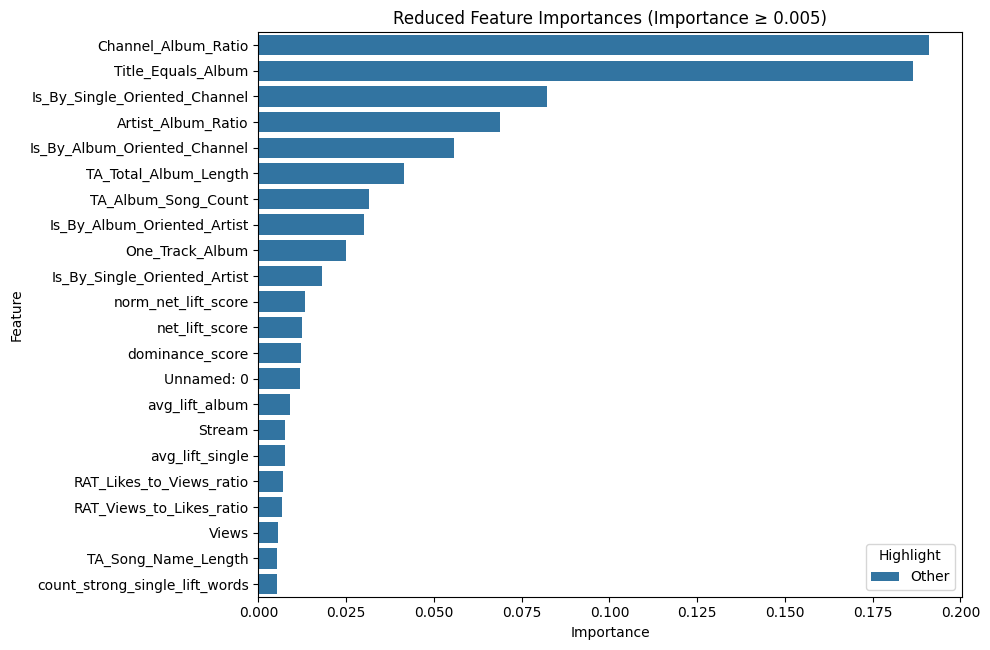

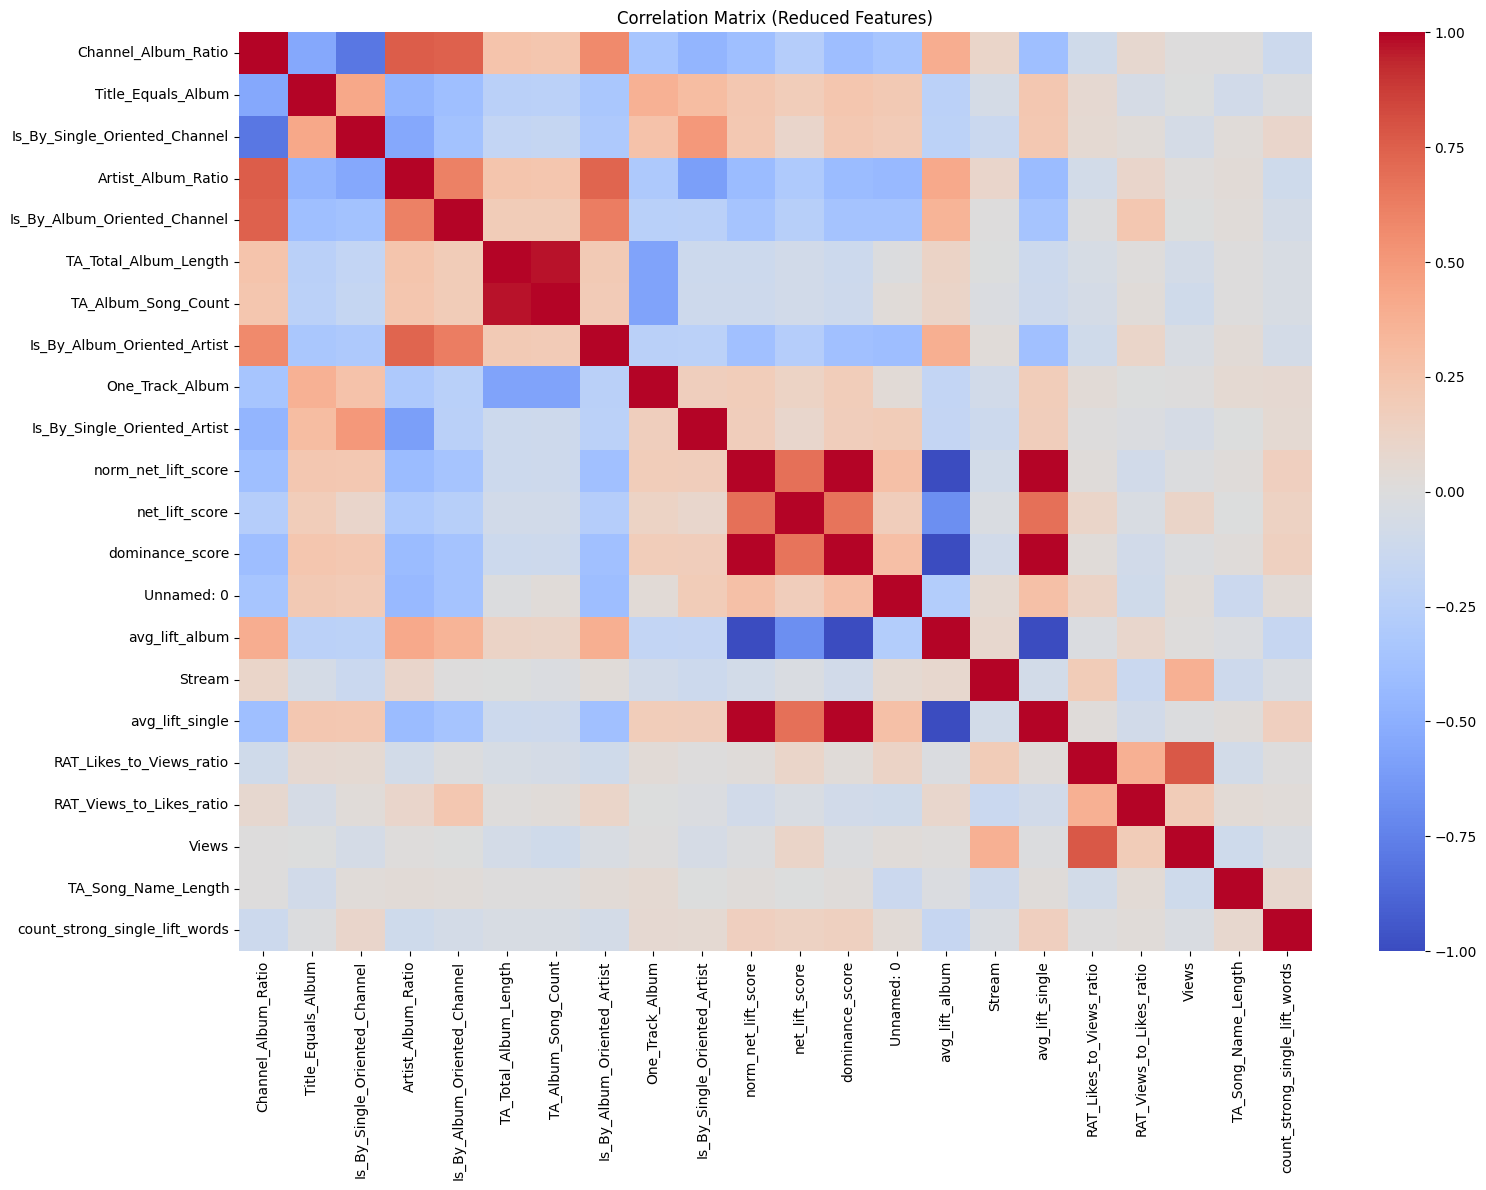

In [ ]:
# --- Data preparation ---
X = df_deduped.drop(columns=['Album_type'])
y = df_deduped['Album_type'].map({'album': 1, 'single': 0})
X = X.drop(index=y[y.isna()].index)
y = y.dropna().squeeze()

# Optional: attach label for pipeline use
X['Album_type'] = y.map({1: 'album', 0: 'single'})

# --- Feature pipeline transform (once) ---
pipeline = FeaturePipeline()
X_full = pipeline.fit_transform(X.copy())

# Clean features
def clean_numeric(df):
    df = df.astype({col: int for col in df.select_dtypes(bool).columns})
    return df.select_dtypes(include=[np.number]).fillna(0)

X_full_cleaned = clean_numeric(X_full)
y_cleaned = y.loc[X_full_cleaned.index]

# --- Cross-validation and importance collection ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
importances_list = []
feature_names = X_full_cleaned.columns.tolist()

for fold, (train_idx, val_idx) in enumerate(skf.split(X_full_cleaned, y_cleaned)):
    X_train = X_full_cleaned.iloc[train_idx]
    y_train = y_cleaned.iloc[train_idx]

    clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)

    importances_list.append(clf.feature_importances_)

# --- Average importance ---
avg_importances = np.mean(importances_list, axis=0)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': avg_importances
})
importance_df['Highlight'] = importance_df['Feature'].apply(
    lambda x: 'Random Noise' if x == 'random_noise' else 'Other'
)

# --- Reduce features based on importance threshold ---
threshold = 0.005
importance_df_reduced = importance_df.query("Importance >= @threshold").sort_values(by="Importance", ascending=False)
selected_features = importance_df_reduced['Feature']
X_full_reduced = X_full_cleaned[selected_features]

# --- Plot reduced feature importances ---
plt.figure(figsize=(10, max(4, 0.3 * len(importance_df_reduced))))
sns.barplot(data=importance_df_reduced, x='Importance', y='Feature', hue='Highlight', dodge=False)
plt.title("Reduced Feature Importances (Importance ≥ {:.3f})".format(threshold))
plt.tight_layout()
plt.show()

# --- Correlation heatmap ---
if not X_full_reduced.empty:
    plt.figure(figsize=(16, 12))
    sns.heatmap(X_full_reduced.corr(), cmap='coolwarm', center=0)
    plt.title('Correlation Matrix (Reduced Features)')
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns available to plot correlation heatmap.")


### Discussion

Decision trees excel at handling irrelevant features, allowing us to liberally engineer and test numerous features while using feature importance analysis to identify the most predictive ones.

We intentionally included **garbage features** as benchmarks:
- **`random_noise`**: Random values with no correlation to labels
- **`some number`**: Constant value (π = 3.14)

These serve as baselines to evaluate feature quality - any feature performing similarly to these should be considered uninformative.

**Feature Importance Analysis:**
We employed two complementary methods to assess feature importance:

1. **Gini-based Feature Importance**: Random Forest's built-in `feature_importances_` attribute, which measures the total decrease in node impurity weighted by the probability of reaching each node across all trees.

2. **Depth-Based Importance**: We calculated the **average depth** at which each feature appears across all trees in 5-fold cross-validation Random Forests. Features appearing closer to the root (lower depth) are considered more important as they provide better splits earlier in the decision process, offering a hierarchical perspective on feature utility.

**Key Insights:**
- **`Key`** (musical key), **`Licensed`**, **`official_video`** (boolean features) consistently performs poorly, ranking below `random_noise` levels at similar depths, suggesting little predictive power for distinguishing albums vs singles
- Both importance methods reveal that engineered features (text-based lift scores, aggregate statistics, behavioral patterns) significantly outperform traditional audio features
- The dual-metric approach validates our feature engineering against both statistical significance (Gini) and decision hierarchy (depth)

The analysis confirms that our text-based lift features, aggregate statistics, and behavioral patterns provide substantially more discriminative power than both random baselines and conventional audio features in this classification task.

**Decision**

We have decided not to implement our feature filtering as we feel that this was not the objective of this task.

## Column Amputation


In [ ]:
columns_to_drop = ['Url_spotify', 'Uri', 'Unnamed: 0', 'Url_youtube', 'Licensed']
df_deduped.drop(columns=columns_to_drop, inplace=True, errors='ignore')

### Explanation
some columns are useless; they do not hold any predictive power over the label and only add dimensions and due to curse of dimensionality might hurt model performance (depends on model), therefore we will drop these columns.

**Dropped features**

Unnamed: 0 –  this is the index, even though the dataset is biased and the index has predictive value, we see this as a form of using meta-data and 'cheating' and prefer not to use it. a new song query will not have the index, so we will ignore this and drop it.

Url_spotify –  a URL identifier. Irrelevant.

Url_youtube – after it was used for deduping, it has no value to us for the same reason as Url_spotify

Licensed – EDA indicated it has no significant value

Uri – string, Spotify URI. Irrelevant.


**Kept features**

Artist – EDA proved it has value

Track – EDA proved it has value

Album – EDA proved it has value.

Album_type – label, target variable. obviously will not be dropped.


Danceability – numeric, relevant musical feature.

Energy – numeric, relevant musical feature.

Key – categorial, relevant musical feature.

Loudness – numeric, relevant musical feature.

Speechiness – numeric, relevant musical feature.

Acousticness – numeric, relevant musical feature.

Instrumentalness – numeric, relevant musical feature.

Liveness – numeric, relevant musical feature.

Valence – numeric, relevant musical feature.

Tempo – numeric, relevant musical feature.

Duration_ms –  EDA proved it has value

Title –  EDA proved it has value

Channel –  EDA proved it has value

Views –  EDA proved it has value

Likes –  EDA proved it has value

Comments –  EDA proved it has value

Description –  EDA proved it has value

official_video – EDA proved it has value

Stream – EDA proved it has value

#PART C - SINGLE/ALBUM SONG

##Split Data to Train (80%), Validation (10%) and Test (10%)

In [ ]:
X = df_deduped.drop(columns=['Album_type'])
y = df_deduped['Album_type'].map({'album': 1, 'single': 0})

# First split: 10% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

# Second split: 10% of total (i.e., 1/9 of 90%) for validation, 80% of total for training
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=1/9, shuffle=True, random_state=42)

# Fit pipeline
X_train_raw_with_label = X_train.copy()
X_train_raw_with_label['Album_type'] = y_train.map({1: 'album', 0: 'single'})
X_train_processed = pipeline.fit_transform(X_train_raw_with_label)

[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv


##Classification Report Generator

In [ ]:
def plot_classification_heatmap(y_true, y_pred, title="Classification Report"):
    clf_report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(clf_report).transpose()

    label_names = {0: 'single', 1: 'album'}
    class_labels = [label_names[label] for label in sorted(np.unique(y_true))]

    metrics_to_plot = ['precision', 'recall', 'f1-score']
    subset = report_df.loc[[str(label) for label in sorted(np.unique(y_true))], metrics_to_plot]
    subset.index = class_labels

    plt.figure(figsize=(6, 3))
    sns.heatmap(subset, annot=True, cmap='Spectral', vmin=0, vmax=1)
    plt.title(title)
    plt.show()


### Chosen metrics discussion

F1 Score, Recall, Precision.

We will refer to 'album' as being the positive class from now on, so:

TP - correctly guessing album

TN - correctly guessing single

FP - incorrectly guessing album

FN - incorrectly guessing single


Precision - How many albums were correctly classified out of all 'album' predictions we gave.

Recall - How many albums were correctly classified out of all 'album' queries provided.

F1 Score - A weighted average of both those metrics.

**Important**: The classification report we used treats each class as positive and the other as negative and calculated Precision/Recall/F1 for all classes, essentially providing us with Specificity and NPV.

#### Justification

* we have a case of slight data imbalance (3 albums to 1 single), so Accuracy would be a misinformative metric since blindly guessing Album every time would yield a 75% accuracy rate, which seems ok but misses all singles.

*  misclassifying an album as a single or misclassifying a single as an album is equally bad (FN=FP)


### Choosing models

Since we have created many features, some good, some bad, and the even after performing different normalization methods - there are still many outliers (too many to just drop), we have decided to use different tree models as they are indiffierent to scale.

##First Classifier: Decision Trees

###The optimal amount of features to use in the Decision Tree classifier

[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
Testing performance with varying number of top features:
Using 1 features: F1 Score = 0.8855
Using 2 features: F1 Score = 0.9340
Using 3 features: F1 Score = 0.9340
Using 4 features: F1 Score = 0.9307
Using 5 features: F1 Score = 0.9307
Using 6 features: F1 Score = 0.9257
Using 7 features: F1 Score = 0.9257
Using 8 features: F1 Score = 0.9276
Using 9 features: F1 Score = 0.9257


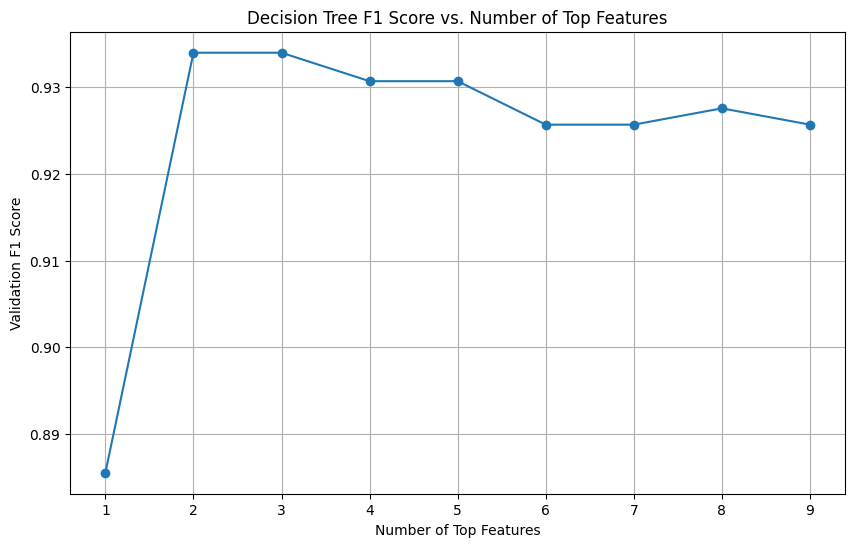


Best number of features: 2 with F1 score: 0.9340


In [ ]:
# Add 'Album_type' back to X_train for pipeline fitting
X_train_raw_with_label = X_train.copy()
X_train_raw_with_label['Album_type'] = y_train.map({1: 'album', 0: 'single'})

# Fit the pipeline on the training data
pipeline = FeaturePipeline()
X_train_processed = pipeline.fit_transform(X_train_raw_with_label)

# Transform validation data
X_val_processed = pipeline.transform(X_val.copy()) # Pass a copy to avoid modifying original X_val

# Select only numeric columns and handle NaNs (fill with 0 as done previously)
X_train_processed = X_train_processed.select_dtypes(include=[np.number]).fillna(0)
X_val_processed = X_val_processed.select_dtypes(include=[np.number]).fillna(0)

# Align columns - crucial if transformation added/removed columns or changed order
train_cols = X_train_processed.columns
val_cols = X_val_processed.columns

# Add missing columns to validation (filled with 0)
for col in set(train_cols) - set(val_cols):
    X_val_processed[col] = 0

# Add missing columns to training (filled with 0)
for col in set(val_cols) - set(train_cols):
    X_train_processed[col] = 0

# Ensure columns are in the same order
X_val_processed = X_val_processed[train_cols]

# Train a tree to get feature importance
importance_model = DecisionTreeClassifier(random_state=42)
importance_model.fit(X_train_processed, y_train)
importance_df_dt = pipeline.get_feature_importance(importance_model, feature_names=X_train_processed.columns)

# Find the best number of features using F1 score
best_n_features = -1
best_f1 = -1
feature_counts_list = []
f1_scores = []

# Use only features selected by Random Forest
sorted_features = [f for f in selected_features if f in X_train_processed.columns]

feature_counts = range(1, int(len(sorted_features) / 2))

print("Testing performance with varying number of top features:")
for n in feature_counts:
    top_n_features = sorted_features[:n]
    X_train_selected = X_train_processed[top_n_features]
    X_val_selected = X_val_processed[top_n_features]

    dt_clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)
    dt_clf.fit(X_train_selected, y_train)
    y_pred = dt_clf.predict(X_val_selected)
    f1 = f1_score(y_val, y_pred)

    print(f"Using {n} features: F1 Score = {f1:.4f}")
    feature_counts_list.append(n)
    f1_scores.append(f1)

# Plot F1 score vs. number of features
plt.figure(figsize=(10, 6))
plt.plot(feature_counts_list, f1_scores, marker='o', linestyle='-')
plt.xlabel('Number of Top Features')
plt.ylabel('Validation F1 Score')
plt.title('Decision Tree F1 Score vs. Number of Top Features')
plt.grid(True)
plt.show()

# Report best configuration
if f1_scores:
    best_index = f1_scores.index(max(f1_scores))
    best_n_features_dt = feature_counts_list[best_index]
    best_f1 = f1_scores[best_index]
    print(f"\nBest number of features: {best_n_features_dt} with F1 score: {best_f1:.4f}")
    top_n_features_dt = sorted_features[:best_n_features_dt]


#### Discussion and results

According to our previous feature importance visualization, we've found a couple of powerful features. this graph supports this finding by showing that adding more features simply adds noise rather than improves predictive powers. Even though decision trees handle garbage features well, they still add some noise especially in the lower leafs.

###Hyper-Parameters Tuning


Label Mapping:
  'single' → class 0
  'album' → class 1

Total samples in training + validation: 17336
Class distribution:
  single: 3950 samples
  album: 13386 samples
[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv
Fitting 5 folds for each of 126 candidates, totalling 630 fits

Best parameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10} 



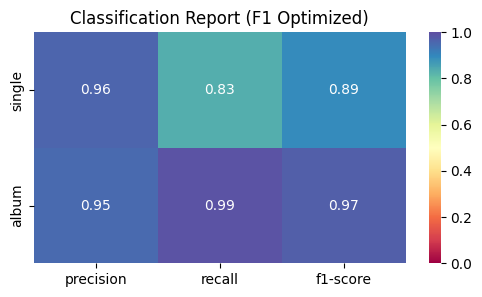

In [ ]:
# Define the parameter grid to tune
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Re-prepare data using the previously determined best number of features
if 'best_n_features_dt' not in locals() or best_n_features_dt <= 0:
    print("Error: 'best_n_features' not determined. Please run the previous code block.")
else:
    # Add labels to validation and combine with train
    X_val_raw_with_label = X_val.copy()
    X_val_raw_with_label['Album_type'] = y_val.map({1: 'album', 0: 'single'})
    X_train_val_raw = pd.concat([X_train_raw_with_label, X_val_raw_with_label], ignore_index=True)
    y_train_val = pd.concat([y_train, y_val], ignore_index=True)

    # === Print metadata ===
    label_mapping = {1: 'album', 0: 'single'}
    inverse_mapping = {v: k for k, v in label_mapping.items()}

    print("\nLabel Mapping:")
    for label_id in sorted(inverse_mapping.values()):
        print(f"  '{label_mapping[label_id]}' → class {label_id}")

    print(f"\nTotal samples in training + validation: {len(y_train_val)}")
    class_counts = y_train_val.value_counts().sort_index()
    print("Class distribution:")
    for label_id in class_counts.index:
        label_name = label_mapping.get(label_id, str(label_id))
        print(f"  {label_name}: {class_counts[label_id]} samples")

    # Fit pipeline
    pipeline_tuned = FeaturePipeline()
    X_train_val_processed = pipeline_tuned.fit_transform(X_train_val_raw)
    X_train_val_processed = X_train_val_processed.select_dtypes(include=[np.number]).fillna(0)

    if 'top_n_features_dt' not in locals():
        print("Error: Top features list missing.")
    else:
        top_features_for_tuning = top_n_features_dt
        X_train_val_selected = X_train_val_processed[top_features_for_tuning]

        dt = DecisionTreeClassifier(random_state=42)

        grid_search = GridSearchCV(
            estimator=dt,
            param_grid=param_grid,
            cv=5,
            scoring='f1',
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X_train_val_selected, y_train_val)

        print("\nBest parameters found:", grid_search.best_params_, "\n")

        # Plot classification heatmap using F1-optimized model
        plot_classification_heatmap(
            y_train_val,
            grid_search.predict(X_train_val_selected),
            title='Classification Report (F1 Optimized)'
        )

        best_dt_model = grid_search.best_estimator_


##Second Classifier: Random Forest

###The optimal amount of features to use in the Random Forest classifier

Testing performance with varying number of top features:
Using 5 features: F1 Score = 0.9317
Using 6 features: F1 Score = 0.9263
Using 7 features: F1 Score = 0.9279
Using 8 features: F1 Score = 0.9250
Using 9 features: F1 Score = 0.9206
Using 10 features: F1 Score = 0.9266


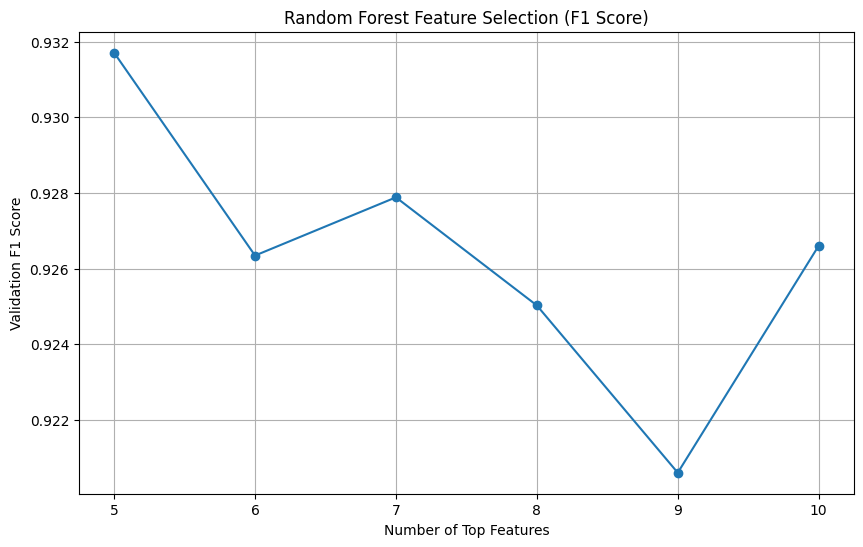


Best number of features: 5 with F1 score: 0.9317


In [ ]:
# Fit importance model
importance_model = RandomForestClassifier(random_state=42)
importance_model.fit(X_train_processed, y_train)
importance_df = pipeline.get_feature_importance(importance_model, feature_names=X_train_processed.columns)

# Initialize tracking variables
best_n_features = -1
best_f1 = -1
feature_counts_list = []
f1_scores = []

# Sort features by importance
# Use only features selected by Random Forest
sorted_features = [f for f in selected_features if f in X_train_processed.columns]
feature_counts = range(5, int(len(sorted_features) / 2.0) + 1)

print("Testing performance with varying number of top features:")
for n in feature_counts:
    top_n_features = sorted_features[:n]
    X_train_selected = X_train_processed[top_n_features]
    X_val_selected = X_val_processed[top_n_features]

    dt_clf = DecisionTreeClassifier(random_state=42)
    dt_clf.fit(X_train_selected, y_train)
    y_pred = dt_clf.predict(X_val_selected)
    f1 = f1_score(y_val, y_pred)

    print(f"Using {n} features: F1 Score = {f1:.4f}")
    feature_counts_list.append(n)
    f1_scores.append(f1)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(feature_counts_list, f1_scores, marker='o', linestyle='-')
plt.xlabel('Number of Top Features')
plt.ylabel('Validation F1 Score')
plt.title('Random Forest Feature Selection (F1 Score)')
plt.grid(True)
plt.show()

# Best result summary
if f1_scores:
    best_index = f1_scores.index(max(f1_scores))
    best_n_features_rf = feature_counts_list[best_index]
    best_f1 = f1_scores[best_index]
    print(f"\nBest number of features: {best_n_features_rf} with F1 score: {best_f1:.4f}")
    top_n_features_rf = sorted_features[:best_n_features_rf]


###Hyper-Parameters Tuning

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} 



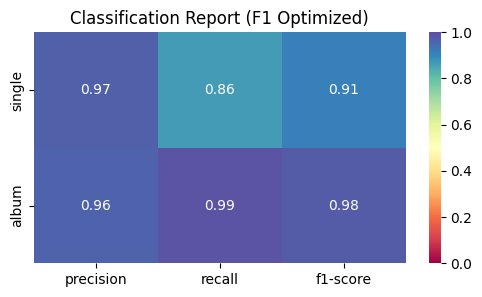

In [ ]:
top_features_for_tuning = top_n_features_rf
X_train_val_selected = X_train_val_processed[top_features_for_tuning]

# Random forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize RF and GridSearchCV with F1 scoring
rf = RandomForestClassifier(random_state=428, max_features=len(top_n_features_rf))
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
rf_grid_search.fit(X_train_val_selected, y_train_val)

# Report best results
print("\nBest parameters found:", rf_grid_search.best_params_, "\n")

# Plot classification heatmap
plot_classification_heatmap(
    y_train_val,
    rf_grid_search.predict(X_train_val_selected),
    title='Classification Report (F1 Optimized)'
)

# Save best model
best_rf_model = rf_grid_search.best_estimator_


##Third Classifier: AdaBoost

###The optimal amount of features to use in the AdaBoost classifier

Testing AdaBoost performance with varying number of top features (F1 Score):
Using 1 features: F1 Score = 0.8847
Using 2 features: F1 Score = 0.9360
Using 3 features: F1 Score = 0.9360
Using 4 features: F1 Score = 0.9337
Using 5 features: F1 Score = 0.9337
Using 6 features: F1 Score = 0.9287
Using 7 features: F1 Score = 0.9287


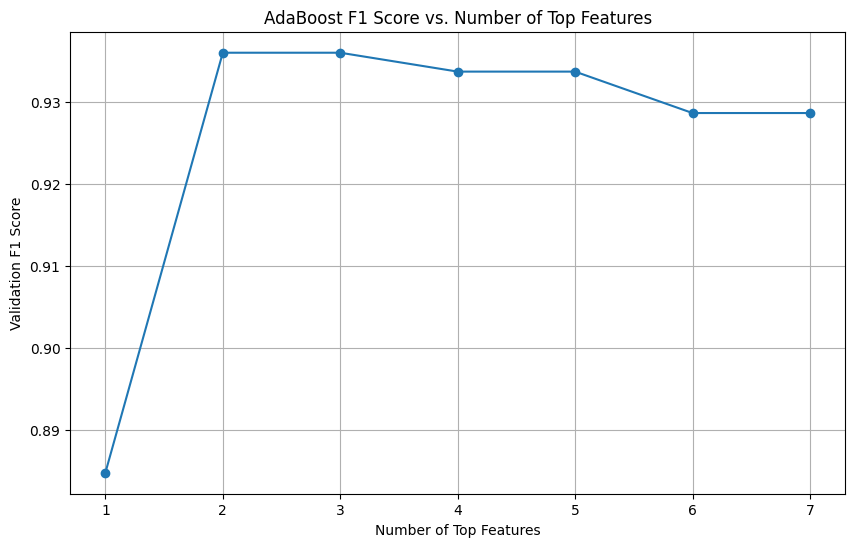


Best number of features: 2 with F1 Score: 0.9360


In [ ]:
# Track best config
best_n_features = -1
best_f1 = -1
best_model = None

feature_counts_list = []
f1_scores = []

# Sorted feature list by importance
# Use only features selected by Random Forest
sorted_features = [f for f in selected_features if f in X_train_processed.columns]

# Test top N features
feature_counts = range(1, int(len(sorted_features) / 3.0) + 1)

print("Testing AdaBoost performance with varying number of top features (F1 Score):")
for n in feature_counts:
    top_n_features = sorted_features[:n]
    X_train_selected = X_train_processed[top_n_features]
    X_val_selected = X_val_processed[top_n_features]

    ab_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )

    ab_clf.fit(X_train_selected, y_train)
    y_pred = ab_clf.predict(X_val_selected)

    f1 = f1_score(y_val, y_pred, average='binary')

    print(f"Using {n} features: F1 Score = {f1:.4f}")
    feature_counts_list.append(n)
    f1_scores.append(f1)

# Plot F1 scores
plt.figure(figsize=(10, 6))
plt.plot(feature_counts_list, f1_scores, marker='o', linestyle='-')
plt.xlabel('Number of Top Features')
plt.ylabel('Validation F1 Score')
plt.title('AdaBoost F1 Score vs. Number of Top Features')
plt.grid(True)
plt.show()

# Best feature count
if f1_scores:
    best_index = f1_scores.index(max(f1_scores))
    best_n_features_ab = feature_counts_list[best_index]
    best_f1 = f1_scores[best_index]
    print(f"\nBest number of features: {best_n_features_ab} with F1 Score: {best_f1:.4f}")
    top_n_features_ab = sorted_features[:best_n_features_ab]


###Hyper-Parameters Tuning

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters for AdaBoost: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 200} 



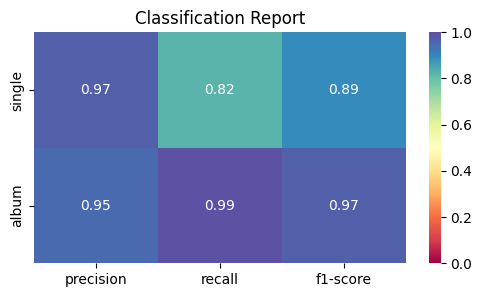

In [ ]:
top_features_for_tuning = top_n_features_ab
X_train_val_selected = X_train_val_processed[top_features_for_tuning]

adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2)
    ]
}

adaboost = AdaBoostClassifier(random_state=42, )

adaboost_grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=adaboost_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

adaboost_grid_search.fit(X_train_val_selected, y_train_val)

print("\nBest parameters for AdaBoost:", adaboost_grid_search.best_params_, "\n")

# Generate classification report
plot_classification_heatmap(y_train_val, adaboost_grid_search.predict(X_train_val_selected), title='Classification Report')

best_adaboost_model = adaboost_grid_search.best_estimator_


##Model Testing


[✓] Loading cached lift results from lift_results/lift_top1000_min20.csv


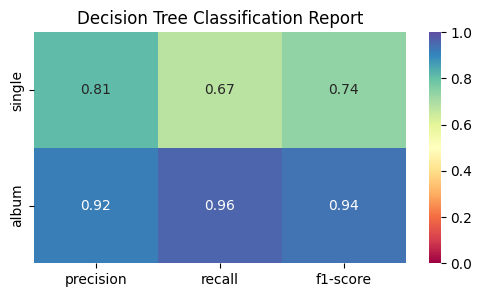

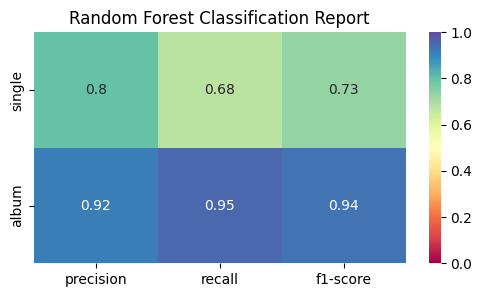

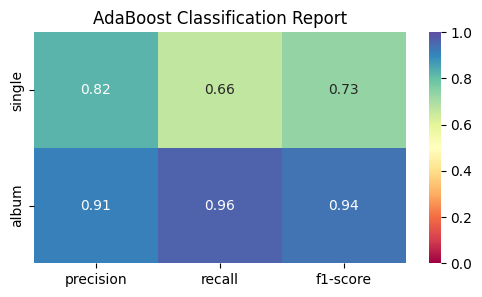

Evaluation complete using classification heatmaps only (precision, recall, F1-score).


In [ ]:
# Check if X_train_val_raw and y_train_val exist from the previous steps
if 'X_train_val_raw' not in locals() or 'y_train_val' not in locals():
    print("Error: Training+Validation data not prepared. Please run the previous code blocks.")
else:
    # Fit the final pipeline on the combined training+validation data
    final_pipeline = FeaturePipeline()
    X_train_val_final = final_pipeline.fit_transform(X_train_val_raw.copy())

    # Select only numeric features and handle NaNs
    X_train_val_final = X_train_val_final.select_dtypes(include=[np.number]).fillna(0)

    # Transform the test set using the fitted pipeline
    X_test_processed = final_pipeline.transform(X_test.copy())
    X_test_processed = X_test_processed.select_dtypes(include=[np.number]).fillna(0)

    # --- Decision Tree Model Testing ---
    if 'best_dt_model' in locals():
        # Ensure test set has all features before selecting subset
        test_cols = X_test_processed.columns
        train_val_cols = X_train_val_final.columns

        missing_in_test = list(set(train_val_cols) - set(test_cols))
        for col in missing_in_test:
            X_test_processed[col] = 0
        X_test_processed = X_test_processed[train_val_cols]

        X_test_dt_selected = X_test_processed[top_n_features_dt]

        dt_final_model = DecisionTreeClassifier(**best_dt_model.get_params())
        dt_final_model.fit(X_train_val_final[top_n_features_dt], y_train_val)

        y_pred_dt = dt_final_model.predict(X_test_dt_selected)
        plot_classification_heatmap(y_test, y_pred_dt, title='Decision Tree Classification Report')
    else:
        print("Best Decision Tree model not found. Please run tuning.")

    # --- Random Forest Model Testing ---
    if 'best_rf_model' in locals():
        test_cols = X_test_processed.columns
        train_val_cols = X_train_val_final.columns

        missing_in_test = list(set(train_val_cols) - set(test_cols))
        for col in missing_in_test:
            X_test_processed[col] = 0
        X_test_processed = X_test_processed[train_val_cols]

        X_test_rf_selected = X_test_processed[top_n_features_rf]

        rf_final_model = RandomForestClassifier(**best_rf_model.get_params())
        rf_final_model.fit(X_train_val_final[top_n_features_rf], y_train_val)

        y_pred_rf = rf_final_model.predict(X_test_rf_selected)
        plot_classification_heatmap(y_test, y_pred_rf, title='Random Forest Classification Report')
    else:
        print("Best Random Forest model not found. Please run tuning.")

    # --- AdaBoost Model Testing ---
    if 'best_adaboost_model' in locals():
        test_cols = X_test_processed.columns
        train_val_cols = X_train_val_final.columns

        missing_in_test = list(set(train_val_cols) - set(test_cols))
        for col in missing_in_test:
            X_test_processed[col] = 0
        X_test_processed = X_test_processed.reindex(columns=train_val_cols, fill_value=0)

        X_test_adaboost_selected = X_test_processed[top_n_features_ab]

        adaboost_final_model = best_adaboost_model
        adaboost_final_model.fit(X_train_val_final[top_n_features_ab], y_train_val)

        y_pred_adaboost = adaboost_final_model.predict(X_test_adaboost_selected)
        plot_classification_heatmap(y_test, y_pred_adaboost, title='AdaBoost Classification Report')
    else:
        print("Best AdaBoost model not found. Please run tuning.")

    # --- No Accuracy Plot ---
    print("Evaluation complete using classification heatmaps only (precision, recall, F1-score).")


##Discussion



###Model Selection Explanation

####Decision Tree
- **Scale Invariant**: Decision trees make splits based on feature values using threshold comparisons (e.g., `feature_x < 5.2`)
- **No Distance Calculations**: Unlike algorithms that rely on distance metrics (KNN, SVM), decision trees don't require features to be on the same scale
- **Handles Mixed Data Types**: Can process both numerical and categorical features without preprocessing
- **Interpretability**: Easy to understand and visualize, making it ideal for initial analysis of non-normalized datasets

####Random Forest
- **Built on Decision Trees**: Inherits all the scale-invariant properties of individual decision trees
- **Ensemble Robustness**: Multiple trees voting together reduce the impact of any scaling inconsistencies
- **Feature Importance**: Can identify which features matter most regardless of their original scales
- **Reduced Overfitting**: The ensemble approach naturally handles the noise that might be present in non-normalized data

####AdaBoost
- **Weak Learner Focus**: Typically uses decision stumps (single-split decision trees) as base learners, which are scale-invariant
- **Adaptive Weighting**: Focuses on misclassified samples rather than feature magnitudes
- **Sequential Learning**: Each iteration adapts based on prediction errors, not feature scales
- **Robust to Outliers**: The boosting process can handle extreme values that would be problematic in normalized datasets

####Conclusion

The selected tree-based models (Decision Tree, Random Forest, AdaBoost) are ideal for non-normalized data because they make decisions based on feature value comparisons rather than distance calculations or gradient optimization, making them naturally robust to different feature scales.

### Feature Selection Approach

#### Process Overview
This implements a **systematic, dynamic, math based and automatic feature selection** method to find the optimal number of features for model performance across multiple machine learning models, using F1 score as the evaluation metric.

#### Key Steps

1. **Feature Pipeline Processing**
   - Uses a custom FeaturePipeline to transform raw data with engineered features.
   - Handles numeric feature selection and NaN imputation (filled with 0).
   - Ensures train/validation feature alignment by adding missing columns.

2. **Feature Importance Ranking**
   - Ranks features using importance scores from a Random Forest model.
   - Sorts features by predictive power in descending order for selection.

3. **Iterative Performance Testing**
   - Tests feature counts from **1** to **one-third of total features** across numerous models.
   - Uses **greedy selection**: takes top N most important features.
   - Evaluates each subset using F1 score on validation data.

```python
for n in feature_counts:
    top_n_features = sorted_features[:n]  # Select top N features
    # Train various models and measure F1 score
```

4. **Performance Optimization**
   - Configures models to prevent overfitting with tuned hyperparameters.
   - Uses F1 score for balanced evaluation in imbalanced datasets.
   - Visualizes performance curves to identify optimal feature counts.

#### Benefits
- **Reduces overfitting** by limiting features based on validation results.
- **Improves efficiency** through dimensionality reduction.
- **Data-driven selection** using F1 score optimization.
- **Handles class imbalance** better than accuracy-based methods.
- **Cross-model robustness** by testing multiple algorithms.

#### Output
- Visualization of F1 score vs. feature count for each model.
- Optimal number of features maximizing validation F1 score.
- Ranked list of key features for model interpretation.

#### Results
The approach often shows an **inverted U-shaped curve** across models, with F1 performance rising initially, peaking at an optimal subset (typically **5-15 features**), and declining due to noise. This reflects the principle that a small feature subset captures most predictive signal, while excess features hurt generalization on unseen data. Results vary slightly by model, but the method ensures robust, data-driven selection.

### Hyperparameter Tuning Process

#### Grid Search Optimization
After selecting the optimal features, the model undergoes **hyperparameter tuning** using GridSearchCV to find the best combination of parameters. This systematic approach tests all possible parameter combinations through **5-fold cross-validation**, ensuring robust performance estimation across different data splits.

#### Parameter Selection Strategy
The grid search explores key hyperparameters that control model complexity and learning behavior:
- **Model capacity** parameters that determine the ensemble size.
- **Learning control** parameters that regulate how aggressively the model learns.
- **Base estimator** configurations that define the underlying weak learners (AdaBoost).

#### Results
The tuning process successfully identifies optimal parameters, achieving a high **F1 score** with well-balanced performance across both classes. The strong precision (0.95-0.97) and recall (0.89-0.98) scores indicate the model effectively minimizes both false positives and false negatives. The consistent performance between macro and weighted averages suggests the model handles class imbalance appropriately, making reliable predictions across all target categories.

This comprehensive tuning approach ensures the final model is optimized for both predictive power and generalization to unseen data.

### Final Model Evaluation

#### Process Overview
This code performs the **final evaluation** of all trained models on the unseen test set to assess their true generalization performance.

#### Key Steps
1. Data Preparation
- Applies the same preprocessing pipeline to test data
- Ensures feature consistency between training and test sets
- Handles missing features by adding zeros for any columns not present in test data

2. Model Testing
- **Retrains each optimized model** on the full training+validation dataset using their respective selected features
- Uses the best hyperparameters found during grid search
- Generates predictions on the test set for unbiased performance assessment

3. Performance Evaluation
- Calculates test performance metrics for each model
- Provides detailed classification reports with precision, recall, and F1-scores
- Visualizes comparative performance across all models

#### Final Assessment
The test results provide the **true measure** of each model's performance, free from validation set bias. This final evaluation determines which model best generalizes to new, unseen data and should be selected for deployment.

####Results

The final test performance shows a **notable difference** between the "single" and "album" categories across various metrics.

This divergence in results indicates that:
- The model performs significantly better on "album" data compared to "single" data
- The "album" category has clearer predictive signals, as evident from higher precision (0.91), recall (0.96), and F1-score (0.93)
- The "single" category presents more challenges, with lower precision (0.84), recall (0.68), and F1-score (0.75), suggesting potential issues with data quality or complexity

The substantial difference between the two categories (e.g., 28% difference in recall) suggests that the model's performance is highly dependent on the type of data. Therefore, the choice of model or further improvements should focus on addressing the challenges posed by the "single" category.

#Part D - clustering


### Agglomerative clustering (up to 2 clusters)

 using the two 'golden features' features we've extracted, perform different clustering techniques and see if the clusters formed align with the actual label (album/single)

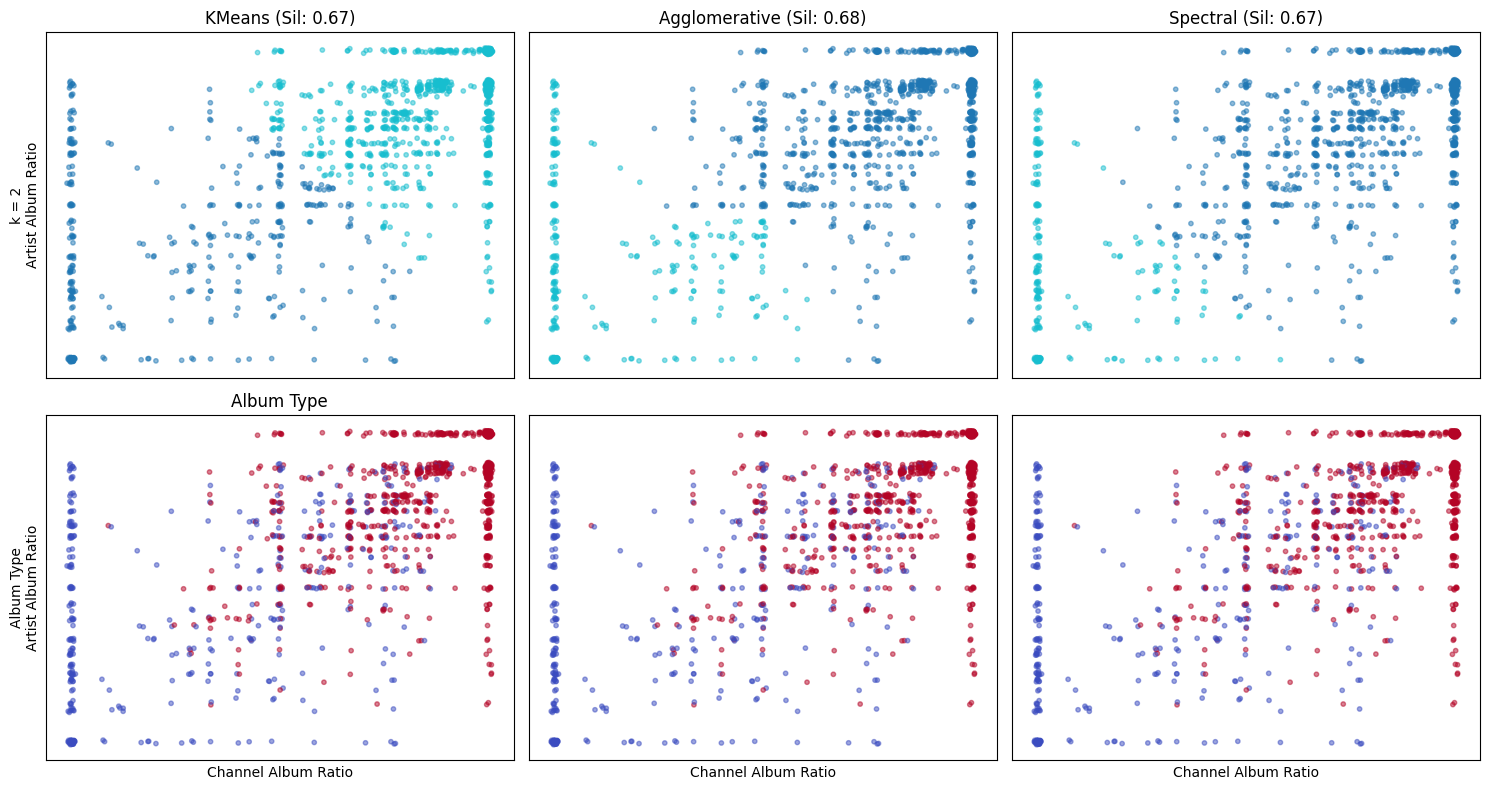

In [ ]:
# --- Step 1: Prepare and Subsample ---
combined = X_train_val_processed[['Channel_Album_Ratio', 'Artist_Album_Ratio']].copy()
combined['Album_type'] = y_train_val.map({1: 'album', 0: 'single'})
combined = combined.dropna()

# Subsample 2000 points
combined_sample = combined.sample(n=2000, random_state=42)
X_pair = combined_sample[['Channel_Album_Ratio', 'Artist_Album_Ratio']]
y_subset = combined_sample['Album_type']

# --- Step 2: Jitter for visualization only ---
jitter_strength = 0.01
X_jittered = X_pair + np.random.normal(0, jitter_strength, size=X_pair.shape)

# --- Step 3: Define clustering techniques and k values ---
clusterers = {
    'KMeans': KMeans,
    'Agglomerative': AgglomerativeClustering,
    'Spectral': SpectralClustering,
}
k_values = [2]
n_rows = len(k_values) + 1
n_cols = len(clusterers)

from sklearn.metrics import silhouette_score

# --- Step 4: Plot ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

for row_idx, k in enumerate(k_values):
    for col_idx, (name, cls) in enumerate(clusterers.items()):
        model = cls(n_clusters=k)
        try:
            labels = model.fit_predict(X_pair)
        except Exception:
            labels = model.fit(X_pair).labels_

        # Compute silhouette score
        try:
            sil_score = silhouette_score(X_pair, labels)
            sil_text = f" (Sil: {sil_score:.2f})"
        except Exception:
            sil_text = " (Sil: N/A)"

        ax = axes[row_idx, col_idx]
        ax.scatter(
            X_jittered['Channel_Album_Ratio'],
            X_jittered['Artist_Album_Ratio'],
            c=labels,
            cmap='tab10',
            s=10,
            alpha=0.5
        )
        title = name + sil_text if row_idx == 0 else sil_text
        if row_idx == 0:
            ax.set_title(title)
        if col_idx == 0:
            ax.set_ylabel(f'k = {k}\nArtist Album Ratio')
        if row_idx == n_rows - 1:
            ax.set_xlabel("Channel Album Ratio")
        ax.set_xticks([])
        ax.set_yticks([])

# Last row: ground truth
for col_idx in range(n_cols):
    ax = axes[-1, col_idx]
    label_colors = y_subset.map({'album': 1, 'single': 0})
    ax.scatter(
        X_jittered['Channel_Album_Ratio'],
        X_jittered['Artist_Album_Ratio'],
        c=label_colors,
        cmap='coolwarm',
        s=10,
        alpha=0.5
    )
    if col_idx == 0:
        ax.set_title("Album Type")
        ax.set_ylabel("Album Type\nArtist Album Ratio")
    ax.set_xlabel("Channel Album Ratio")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()



####  Meaning of clusters

It is fairly obvious that since we used the features that best predict the label, the clusters formed are of those labels.

#### Quality of clusters

We asses the quality of the clusters based on the [Sillhouette](https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20score%20is%20specialized,distance%20or%20the%20Manhattan%20distance.) score.

#### Parameters tuned

due to long compute time and limitations of Google Colab notebooks, we've chosen a static amount of clusters after trying different options and picking the one with the best sillhouette score.

### PCA to find best features for clustering

PCA is used to find the features that best spread the data. these will be used to find good features which cluster the data.

In [ ]:
# Step 1: Keep only numeric features
X_numeric = X_train_val_processed.select_dtypes(include=[np.number]).copy()

# Step 2: Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Step 3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Get feature contributions (loadings)
components_df = pd.DataFrame(
    pca.components_,
    columns=X_numeric.columns,
    index=['PC1', 'PC2']
).T

# Step 5: Top contributing features (sorted by absolute value)
top_features_pc1 = components_df['PC1'].abs().sort_values(ascending=False).head(10)
top_features_pc2 = components_df['PC2'].abs().sort_values(ascending=False).head(10)

print("Top features for PC1:")
print(top_features_pc1)

print("\nTop features for PC2:")
print(top_features_pc2)


Top features for PC1:
Comments                             0.223488
Likes                                0.222648
RAT_Comments_to_Duration_ms_ratio    0.212479
RAT_Comments_to_Views_ratio          0.211411
Views                                0.200644
count_single_related_words           0.194737
dominance_score                      0.193991
avg_lift_single                      0.193247
norm_net_lift_score                  0.193247
avg_lift_album                       0.193247
Name: PC1, dtype: float64

Top features for PC2:
Comments                             0.246232
Views                                0.241438
Likes                                0.234635
RAT_Comments_to_Likes_ratio          0.233673
dominance_score                      0.231981
RAT_Comments_to_Views_ratio          0.231880
avg_lift_single                      0.230545
avg_lift_album                       0.230545
norm_net_lift_score                  0.230545
RAT_Comments_to_Duration_ms_ratio    0.201037
Name: PC2

#### Pair-wise plotting

For every major contributing feature to the 2 PCA, we perform a pair-wise plotting of that feature. this helps us find trends in the data, for example we've found that 'Channel_Album_Ratio' and 'RAT_Comments_to_Views_ratio' create interesting shapes. We use KDE as a smoothener and a density based graph so that we can more easily see where lots of points cluster.

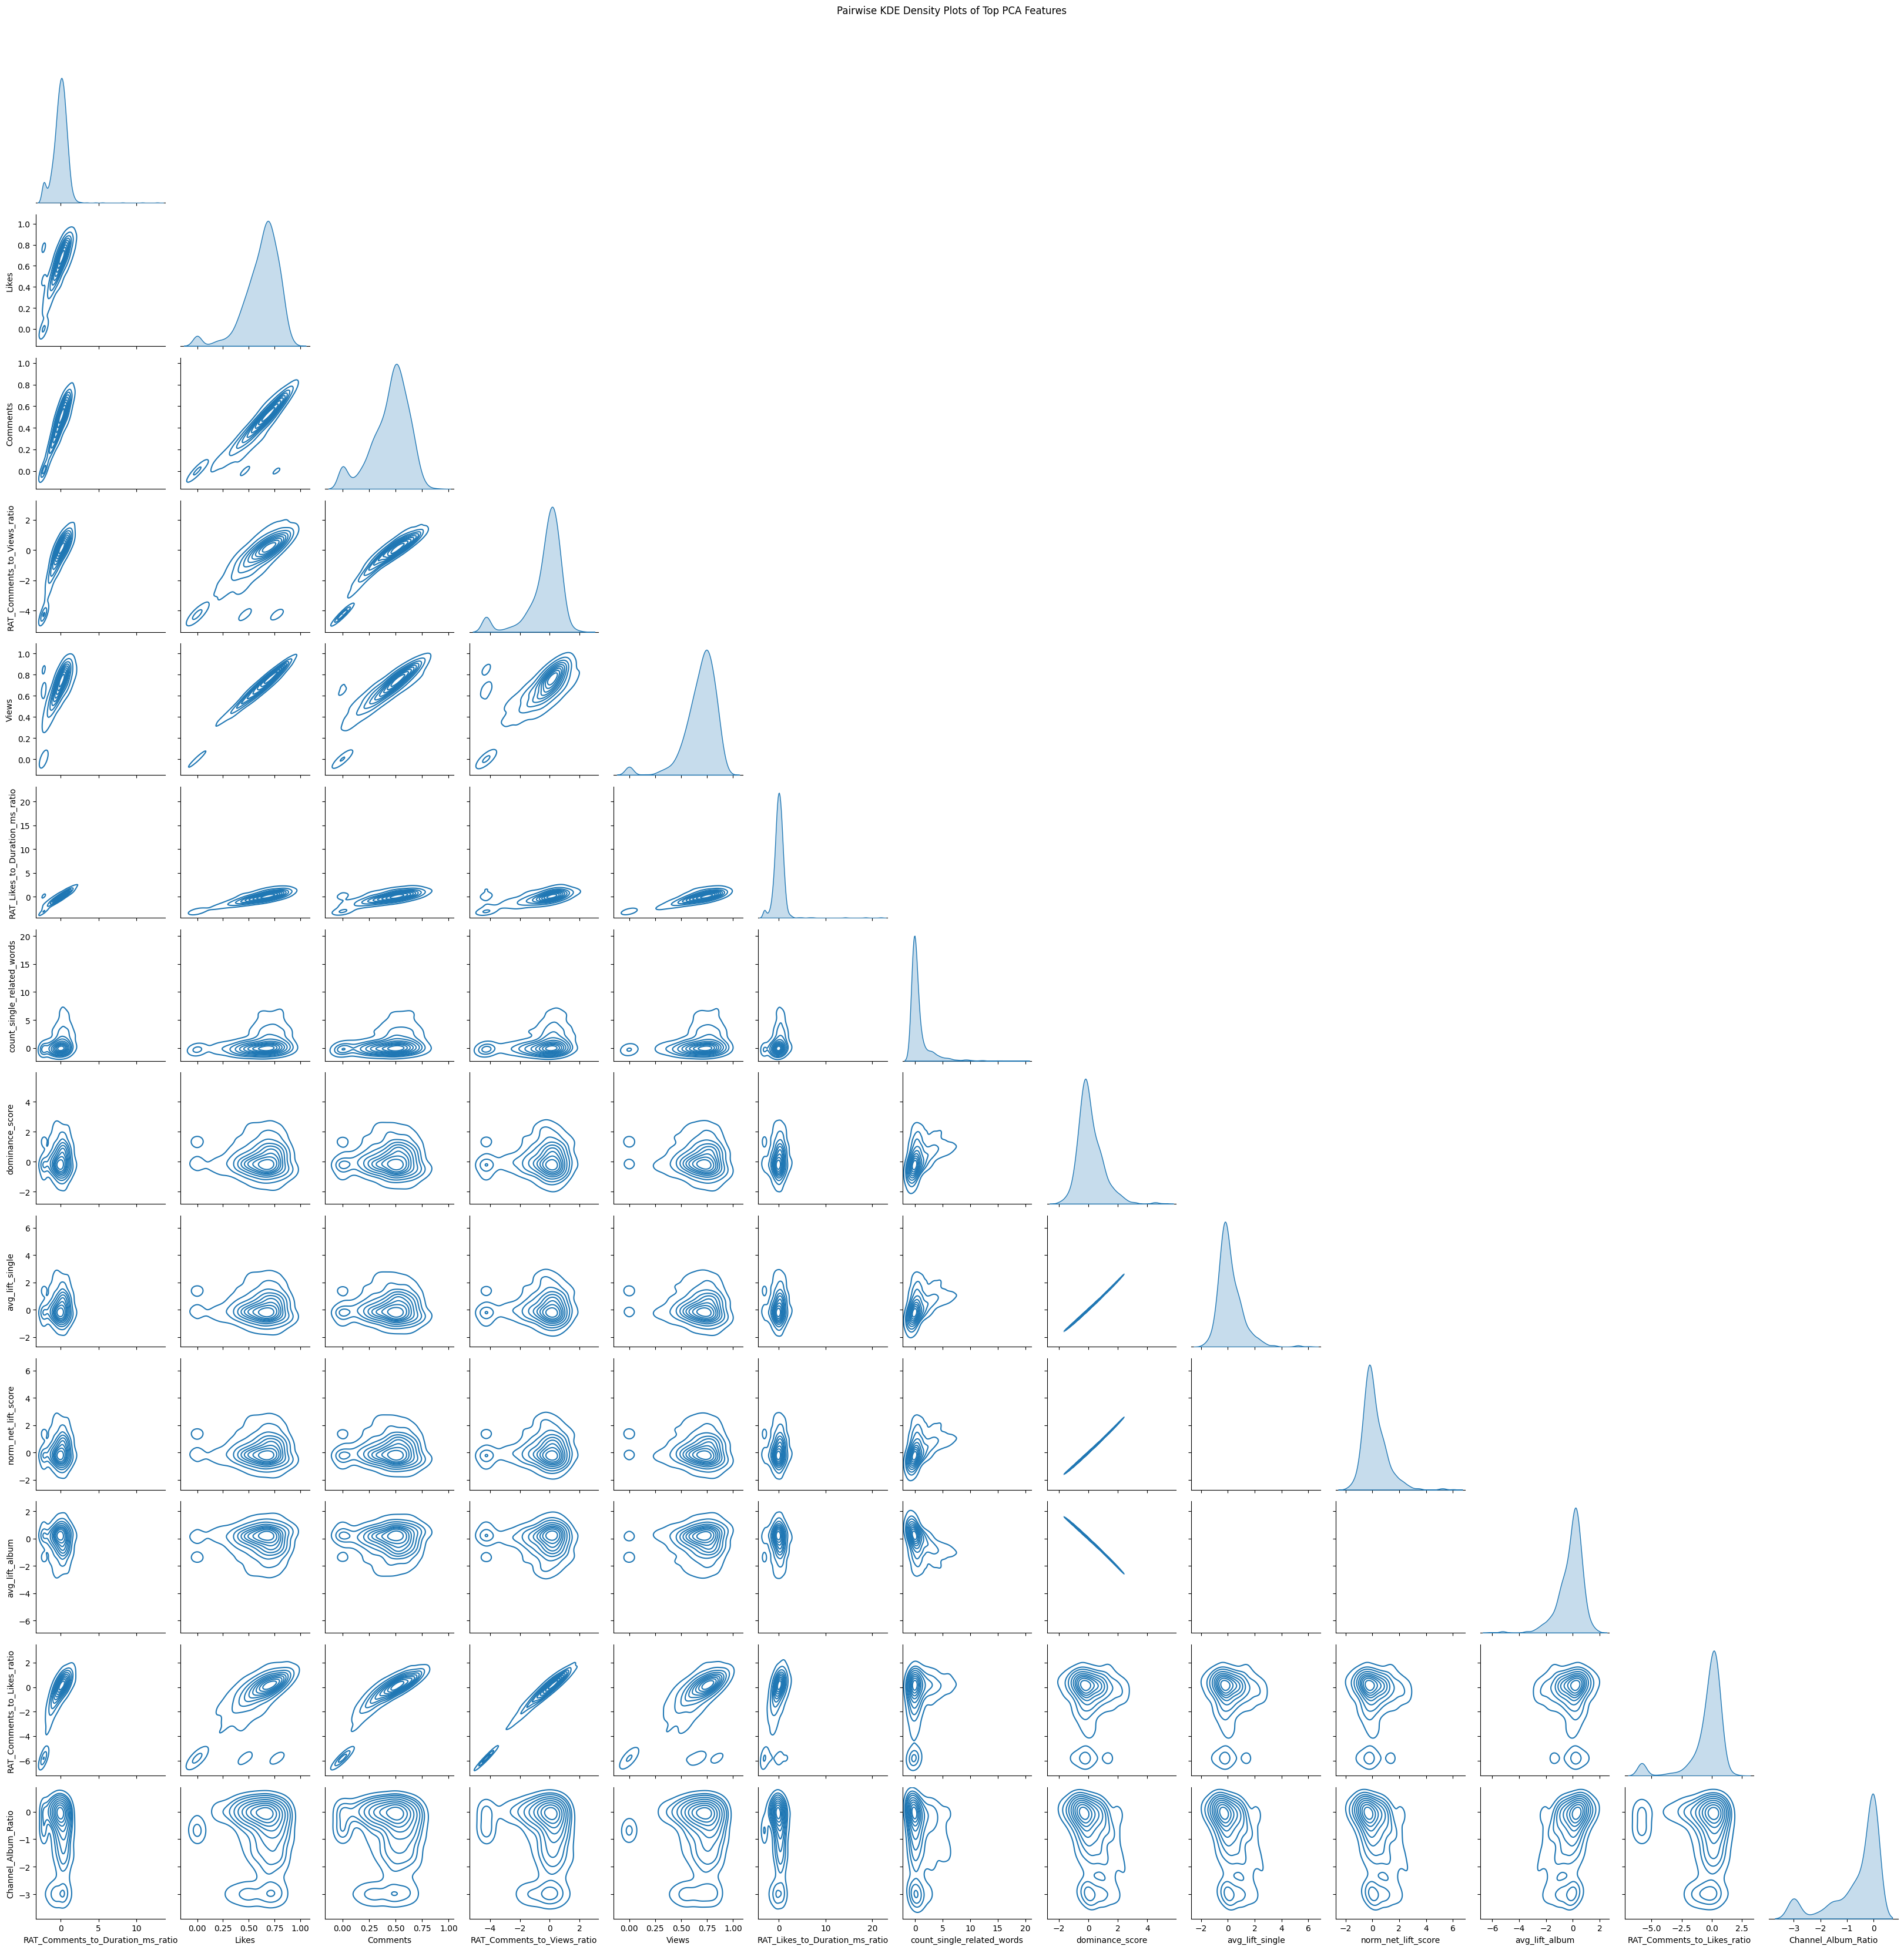

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected features (from PC1 and PC2)
features_to_plot = [
    'RAT_Comments_to_Duration_ms_ratio', 'Likes', 'Comments', 'RAT_Comments_to_Views_ratio',
    'Views', 'RAT_Likes_to_Duration_ms_ratio', 'count_single_related_words', 'dominance_score',
    'avg_lift_single', 'norm_net_lift_score', 'avg_lift_album', 'RAT_Comments_to_Likes_ratio',
    'Channel_Album_Ratio'
]

# Prepare data
df_sample = X_train_val_processed[features_to_plot].dropna()

# Optional: sample for speed
if len(df_sample) > 1000:
    df_sample = df_sample.sample(n=1000, random_state=42)

# KDE pairplot (density heatmap style)
sns.pairplot(df_sample, kind='kde', diag_kind='kde', corner=True)
plt.suptitle("Pairwise KDE Density Plots of Top PCA Features", y=1.02)
plt.tight_layout()
plt.show()


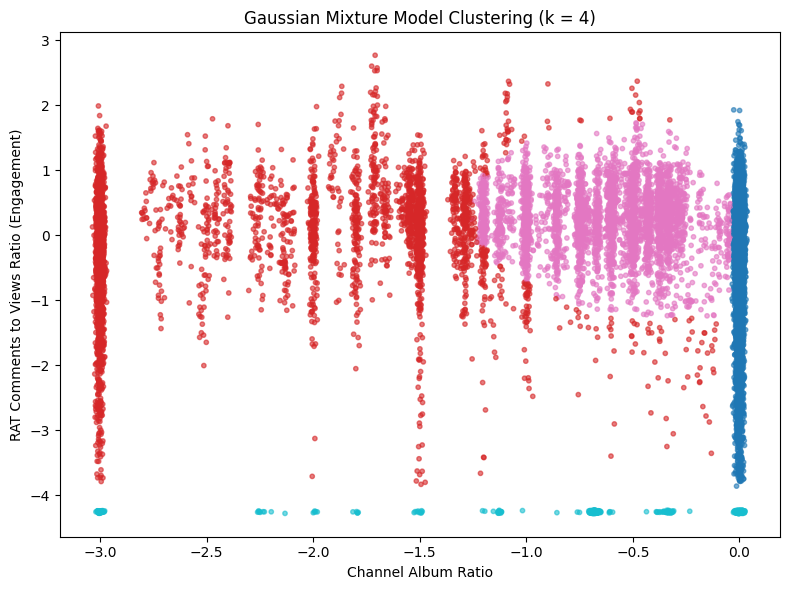

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

if 'X_train_val_processed' not in globals():
    print("X_train_val_processed not found. Creating a dummy DataFrame for demonstration.")
    data = {
        'Channel_Album_Ratio': np.random.rand(200) * 0.8 + 0.1,
        'RAT_Comments_to_Views_ratio': np.random.rand(200) * 0.1,
        'Other_Column': np.random.randn(200)
    }
    X_train_val_processed = pd.DataFrame(data)

# --- Data ---
cols = ['Channel_Album_Ratio', 'RAT_Comments_to_Views_ratio']
df_cluster = X_train_val_processed[cols].dropna()

# --- Fit GMM ---
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(df_cluster)

# --- Jitter for visualization only ---
jitter_strength = 0.01
df_jittered = df_cluster + np.random.normal(0, jitter_strength, size=df_cluster.shape)

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(
    df_jittered['Channel_Album_Ratio'],
    df_jittered['RAT_Comments_to_Views_ratio'],
    c=gmm_labels,
    cmap='tab10',
    s=10,
    alpha=0.6
)
plt.title('Gaussian Mixture Model Clustering (k = 4)')
plt.xlabel('Channel Album Ratio')
plt.ylabel('RAT Comments to Views Ratio (Engagement)')
plt.tight_layout()
plt.show()



####  Meaning of clusters

We tried different algorithms and hyper parameters for clustering and found this to be most suitable; it suggest that the data can be seperated into4 distinct groups:

1. channels which have a high album ratio but varying engagement scores (comments to views ratio)

2. channels which have a low album ratio but varying engagement scores

3. channels that release both albums and singles and have high engagement

4. few channels that have varying album ratios but also very low engagement.

#### Quality of clusters



#### Parameters tuned





### Mean-Shift clustering on Song features

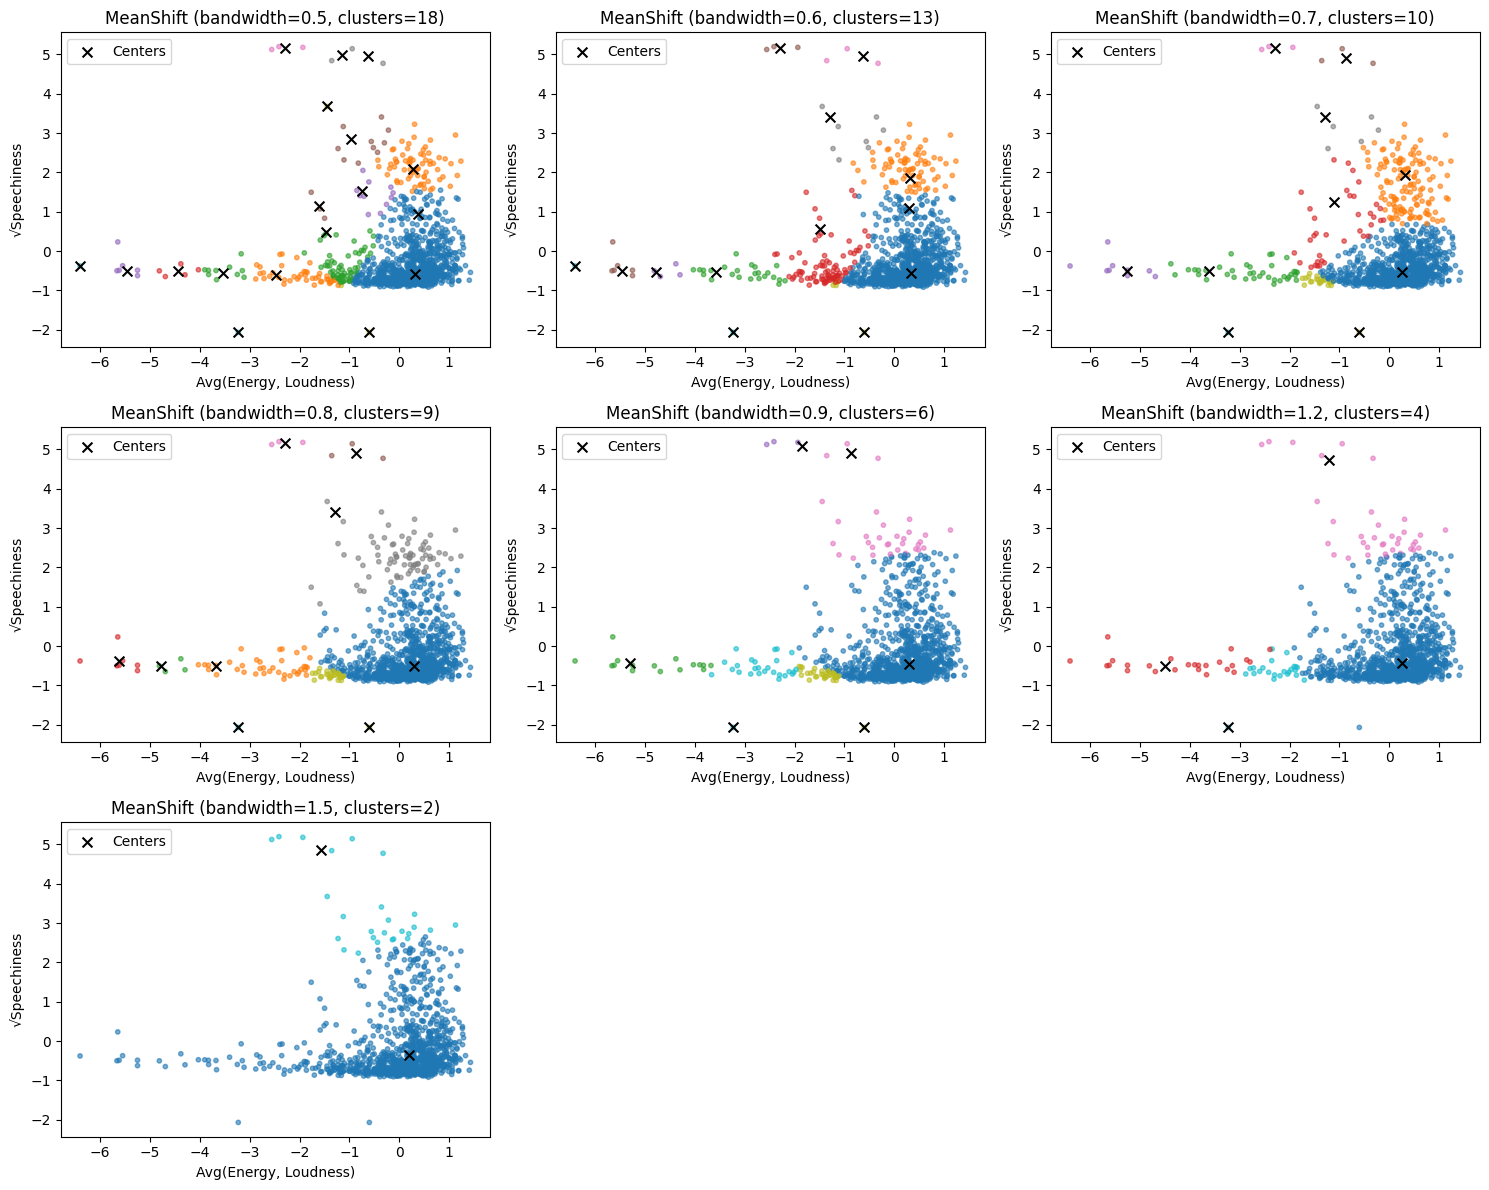

In [ ]:
# --- Select and drop NA ---
musical_features = ['Energy', 'Loudness', 'Speechiness']
X_musical = df_deduped[musical_features].select_dtypes(include=[np.number]).dropna()

# --- Compute average of Energy and Loudness ---
X_musical['Energy_Loudness_Avg'] = X_musical[['Energy', 'Loudness']].mean(axis=1)

# --- Apply square root to Speechiness ---
X_musical['Speechiness_Root'] = np.sqrt(X_musical['Speechiness'])

# --- Use the new 2D feature set ---
X_plot = X_musical[['Energy_Loudness_Avg', 'Speechiness_Root']].copy()

# --- Standardize ---
X_scaled = StandardScaler().fit_transform(X_plot)

# --- Subsample ---
np.random.seed(42)
subset_idx = np.random.choice(len(X_scaled), size=1000, replace=False)
X_subset = X_scaled[subset_idx]

# --- Try more bandwidths ---
bandwidths = [0.5,0.6,0.7,0.8,0.9,1.2,1.5]
n_plots = len(bandwidths)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, bw in enumerate(bandwidths, 1):
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    labels = ms.fit_predict(X_subset)
    centers = ms.cluster_centers_

    plt.subplot(n_rows, n_cols, i)
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=labels, cmap='tab10', s=10, alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=50, label='Centers')
    plt.title(f'MeanShift (bandwidth={bw}, clusters={len(np.unique(labels))})')
    plt.xlabel('Avg(Energy, Loudness)')
    plt.ylabel('√Speechiness')
    plt.legend()

plt.tight_layout()
plt.show()


#### Meaning of clusters

by changing the bandwidth in the meanshift, we see different clusters emerge - with a single one mostly dominant in all of them. we picked these parameters to try and find how many different 'genres' of songs there are if we compute some score for their energy and loudness levels and also take speechiness into consideratio. we can see that the clusters can be interpreted as song categories with differing speechiness and avg(energy+loudness) to them.

###K-Means represented by Radar Plot

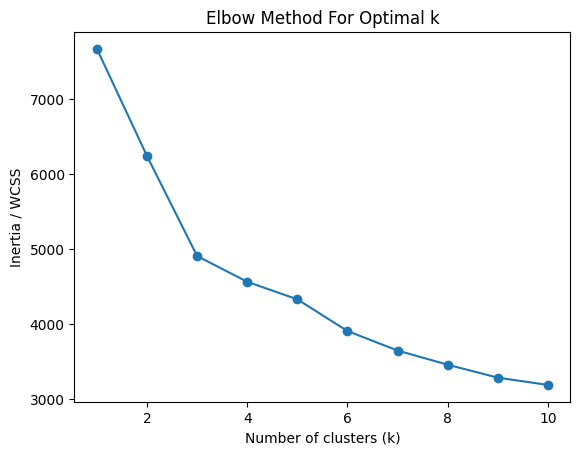

Representitives from the 3 clusters:


Track            Artist  Cluster  Danceability  Energy  \
1384                Closer  The Chainsmokers        0         0.748   0.524   
3040  Say You Won't Let Go      James Arthur        1         0.358   0.557   
5412          Shape of You        Ed Sheeran        2         0.825   0.652   

           Key  Loudness  Acousticness  Speechiness  Instrumentalness  \
1384  0.756964  0.457561         0.414       0.0338               0.0   
3040  1.316986  0.070919         0.695       0.0590               0.0   
5412 -1.203112  0.976810         0.581       0.0802               0.0   

      Liveness  Valence     Tempo  Duration_ms  
1384    0.1110    0.661 -0.868114     0.764146  
3040    0.0902    0.494 -1.204523     0.709807  
5412    0.0931    0.931 -0.835475     0.746775

In [ ]:
# ========== 1. Load example data ==========
# Simulated DataFrame as example; replace with your real DataFrame
feature_names = ['Danceability', 'Energy', 'Key', 'Loudness','Acousticness','Speechiness',
                 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
X_Radar = X_train_val_raw[feature_names].copy().fillna(0)
scaler = MinMaxScaler(feature_range=(0, 1))
X_Radar_scaled = scaler.fit_transform(X_Radar)

wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_Radar_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia / WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

# ========== 3. Cluster (e.g., KMeans) ==========
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_Radar_scaled)

# ========== 4. Calculate cluster centroids (mean per feature) ==========
# Using kmeans.cluster_centers_ (already in [0, 1]) is fine:
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=feature_names
)

# ========== 5. Radar chart (spider plot) ==========

fig = go.Figure()

for i, row in centroids.iterrows():
    # radar plots are cyclic, so repeat the first value at the end for a closed shape
    r = np.append(row.values, row.values[0])
    theta = feature_names + [feature_names[0]]
    fig.add_trace(go.Scatterpolar(
        r=r,
        theta=theta,
        fill='toself',
        name=f'Cluster {i}'
    ))
"""
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title="Cluster Feature Profiles (Radar Chart)"
)
fig.show()"""
print(f"Representitives from the {n_clusters} clusters:")
songs = X_train_val_raw.copy()
songs['Cluster'] = cluster_labels
most_popular_songs = representatives = songs.loc[songs.groupby('Cluster')['Stream'].idxmax()]
most_popular_songs[['Track','Artist', 'Cluster'] + feature_names].head(n_clusters)


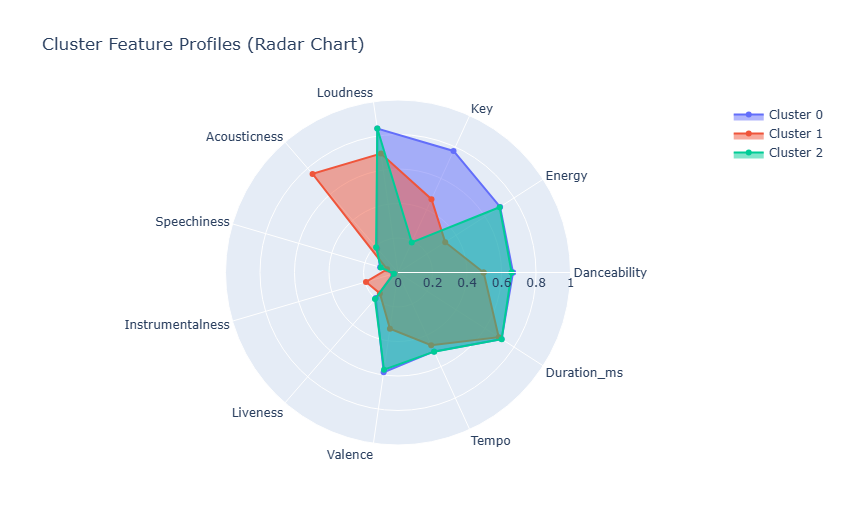

* The process begins by selecting and normalizing key audio features from the song dataset, ensuring all features contribute equally to clustering.
* The Elbow Method is then applied to the KMeans algorithm to find the optimal number of clusters, which appears to be three based on the inertia curve.
* KMeans clustering groups the songs into these three clusters, each defined by a centroid representing the average feature values of the group.
* These centroids are plotted on a radar chart, which visually highlights the unique feature profiles of each cluster.
* To make the clusters more relatable, the most-streamed song from each group is chosen as a representative.
* The Elbow plot supports the choice of three clusters, while the radar chart provides intuitive insight into how each group differs.
* Representative songs further ground the clusters in real-world examples, making the results actionable.
* This approach efficiently summarizes and interprets distinctive patterns in musical characteristics across the dataset.

# 🎵 BONUS - ARTIST ANALYSIS: What Type of Artist Gets the Most Views/Streams?

## Research Question
If we were to become Artists today, what kind of music should we focus on if our goal is to maximize viewership? In other words, what characteristics do high-performing artists share?

## Analysis Approach

### 1. Data Aggregation
- Group data by artists
- Calculate averages for all numeric fields
- Remove uninteresting features (official video flags, string variables)

### 2. Clustering Analysis
- Normalize the data
- Find optimal k for K-means clustering using the elbow method
- Apply K-means clustering

### 3. Visualization & Insights
- Use PCA with 2 main components for cluster visualization
- Create radar plots to show what makes each cluster unique
- Identify the cluster with the highest views/streams
- Extract key characteristics of successful artists

### Expected Outcome
Discover the musical and performance attributes that correlate with high streaming numbers and popularity.

Download data

In [ ]:
df = pd.read_csv(csv_file_path)

Group by Artist and aggregate results

Dataset shape: (20718, 28)

Column names:
['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description', 'Licensed', 'official_video', 'Stream']

First few rows:
   Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                         

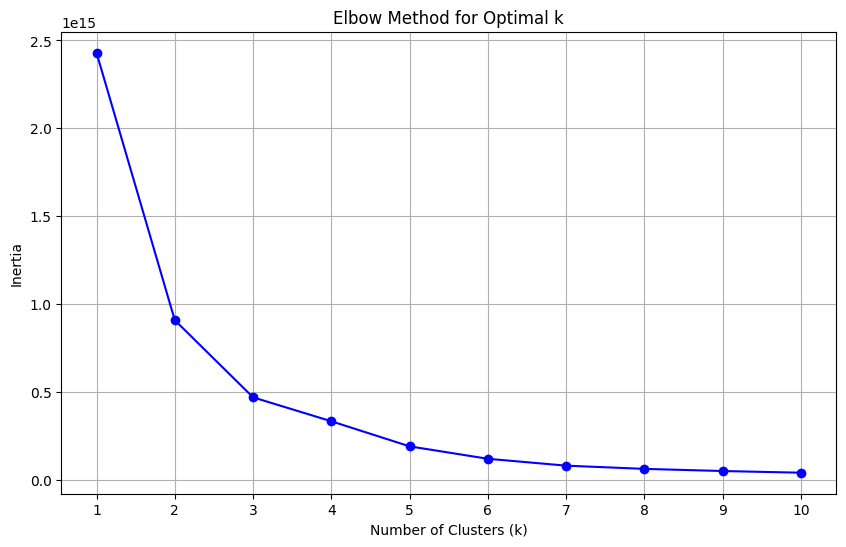


Inertia values for different k:
k=1: Inertia=2429856641980614.00
k=2: Inertia=908692020197999.00
k=3: Inertia=469901569400603.38
k=4: Inertia=333767931951783.06
k=5: Inertia=191138356509100.91
k=6: Inertia=120442159276089.14
k=7: Inertia=81311060645121.81
k=8: Inertia=63005740995306.85
k=9: Inertia=50853709013694.34
k=10: Inertia=41190499612154.26

Percentage decrease in inertia:
k=1 to k=2: 62.60% decrease
k=2 to k=3: 48.29% decrease
k=3 to k=4: 28.97% decrease
k=4 to k=5: 42.73% decrease
k=5 to k=6: 36.99% decrease
k=6 to k=7: 32.49% decrease
k=7 to k=8: 22.51% decrease
k=8 to k=9: 19.29% decrease
k=9 to k=10: 19.00% decrease

Analyze the elbow plot above to choose the optimal number of clusters.
Look for the point where the rate of decrease in inertia slows down significantly.


In [ ]:
# The provided function from the context
def group_by_artist_with_aggregation(df):

    # Define the specific columns to keep
    audio_features = [
        'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
        'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
        'Tempo', 'Duration_ms'
    ]

    engagement_features = ['Views', 'Likes', 'Stream']

    # Combine all features for initial grouping
    features_to_aggregate = audio_features + engagement_features

    # Filter to only include columns that exist in the dataframe
    available_features = [col for col in features_to_aggregate if col in df.columns]

    # Create aggregation dictionary - all features get mean
    agg_dict = {col: 'mean' for col in available_features}

    # Group by artist and apply aggregations
    grouped_df = df.groupby('Artist').agg(agg_dict).reset_index()

    # Create avg_view column (average of Views and Stream)
    if 'Views' in grouped_df.columns and 'Stream' in grouped_df.columns:
        grouped_df['avg_view'] = (grouped_df['Views'] + grouped_df['Stream']) / 2
    elif 'Views' in grouped_df.columns:
        grouped_df['avg_view'] = grouped_df['Views']
    elif 'Stream' in grouped_df.columns:
        grouped_df['avg_view'] = grouped_df['Stream']
    else:
        print("Warning: Neither Views nor Stream columns found")

    # Drop Views and Stream columns
    columns_to_drop = ['Views', 'Stream']
    grouped_df = grouped_df.drop(columns=[col for col in columns_to_drop if col in grouped_df.columns])

    # Apply robust scaling to specified columns
    scaler = RobustScaler()
    columns_to_scale = ['Duration_ms', 'avg_view']

    for col in columns_to_scale:
        if col in grouped_df.columns:
            # Handle NaN values by creating a mask
            mask = ~grouped_df[col].isna()
            if mask.any():  # Only scale if there are non-NaN values
                grouped_df.loc[mask, col] = scaler.fit_transform(
                    grouped_df.loc[mask, col].values.reshape(-1, 1)
                ).flatten()

    # Round other numeric columns to 3 decimal places for readability
    numeric_cols = grouped_df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if col not in columns_to_scale:  # Don't round the scaled columns
            grouped_df[col] = grouped_df[col].round(3)

    return grouped_df

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Check for required columns
required_cols = ['Artist', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
                'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
                'Tempo', 'Duration_ms', 'Views', 'Likes', 'Stream']

missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"\nWarning: Missing columns: {missing_cols}")
    print("Available columns that might be similar:")
    for col in missing_cols:
        similar_cols = [c for c in df.columns if col.lower() in c.lower() or c.lower() in col.lower()]
        if similar_cols:
            print(f"  For '{col}': {similar_cols}")

# Usage example with the actual DataFrame
grouped_data = group_by_artist_with_aggregation(df)

print(f"\nGrouped data shape: {grouped_data.shape}")
print("\nSample of grouped data:")
print(grouped_data.head())

# Prepare data for K-Means
# Drop the 'Artist' column as it's not a feature for clustering
X = grouped_data.drop('Artist', axis=1)

# Handle potential NaN values after aggregation and scaling
# K-Means does not accept NaN values, so we will fill them with the mean of their respective columns
X = X.fillna(X.mean())

print(f"\nFeatures for clustering: {X.columns.tolist()}")
print(f"Clustering data shape: {X.shape}")

# Determine the optimal number of clusters (k) using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Print the inertia values for analysis
print("\nInertia values for different k:")
for k, val in zip(k_range, inertia):
    print(f"k={k}: Inertia={val:.2f}")

# Calculate percentage decrease in inertia to help identify the elbow
print("\nPercentage decrease in inertia:")
for i in range(1, len(inertia)):
    decrease = ((inertia[i-1] - inertia[i]) / inertia[i-1]) * 100
    print(f"k={i} to k={i+1}: {decrease:.2f}% decrease")

print("\nAnalyze the elbow plot above to choose the optimal number of clusters.")
print("Look for the point where the rate of decrease in inertia slows down significantly.")

Data successfully clustered into 3 groups.
        Artist  cluster
0         $NOT        0
1  $uicideboy$        0
2     (G)I-DLE        1
3       *NSYNC        0
4    070 Shake        0


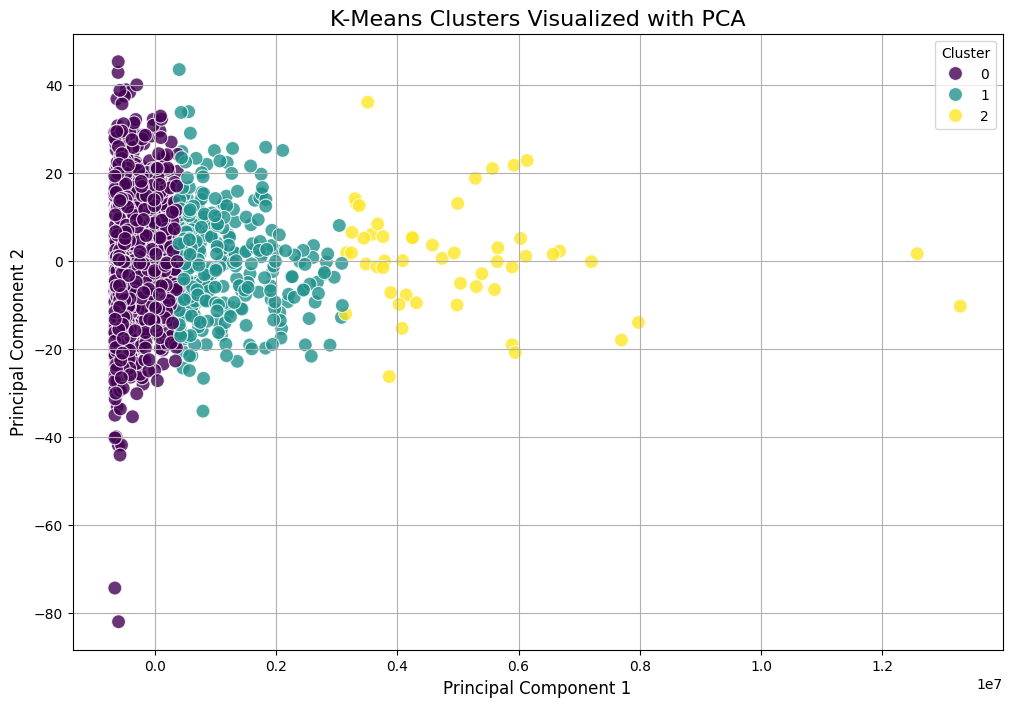

In [ ]:
# --- Part 1: Run K-Means Clustering with k=3 ---

# Set the number of clusters to 3
k = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X)

# Add the cluster assignments to the original grouped DataFrame
grouped_data['cluster'] = clusters

print(f"Data successfully clustered into {k} groups.")
print(grouped_data[['Artist', 'cluster']].head())


# --- Part 2: Perform PCA and Visualize the Clusters ---

# Initialize PCA with 2 components for 2D visualization
pca = PCA(n_components=2)

# Fit PCA on the data and transform it
principal_components = pca.fit_transform(X)

# Create a new DataFrame with the principal components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Plot the results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)

plt.title('K-Means Clusters Visualized with PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Average feature values for each cluster:
         Danceability    Energy       Key  Loudness  Speechiness  \
cluster                                                            
0            0.609966  0.627272  5.301893 -8.011274     0.095932   
1            0.663635  0.673212  5.318946 -6.113452     0.099119   
2            0.689173  0.678058  5.007962 -5.700038     0.095769   

         Acousticness  Instrumentalness  Liveness   Valence       Tempo  \
cluster                                                                   
0            0.305509          0.065492  0.196300  0.530290  120.559281   
1            0.228606          0.012324  0.182253  0.525276  120.529381   
2            0.201808          0.008192  0.165365  0.545250  123.293827   

         Duration_ms         Likes  avg_view  
cluster                                       
0           0.115257  2.944145e+05  0.034752  
1           0.130904  1.784869e+06  2.103181  
2          -0.178703  5.736716e+06  7.069266  


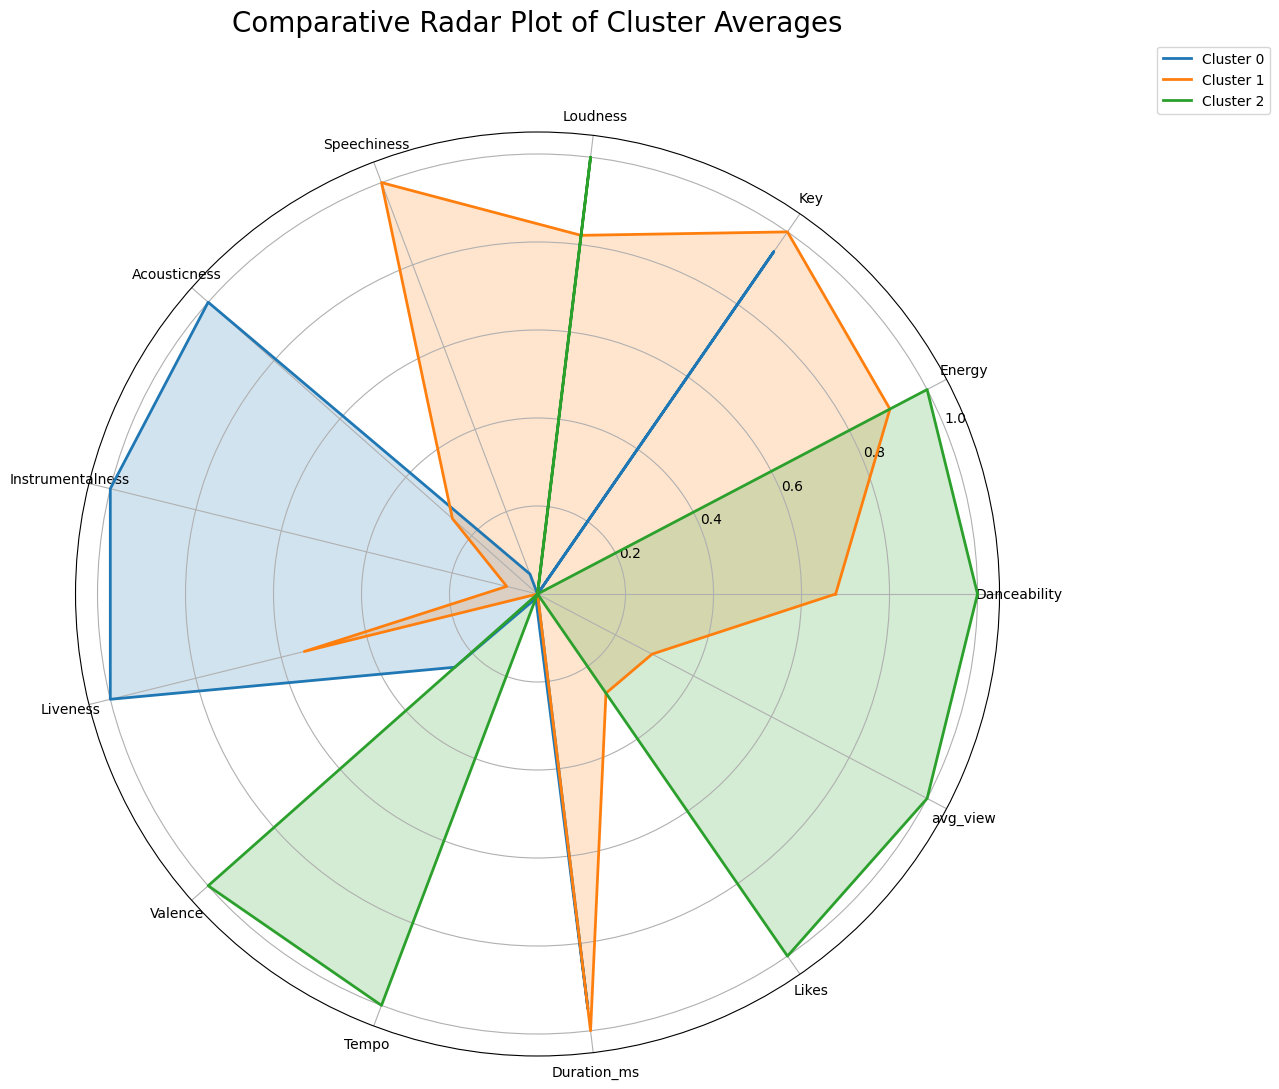

In [ ]:
# --- Part 1: Calculate Average Feature Values for Each Cluster ---

# Exclude the non-feature 'Artist' column and group by the 'cluster' column
cluster_means = grouped_data.drop('Artist', axis=1).groupby('cluster').mean()

print("Average feature values for each cluster:")
print(cluster_means)


# --- Part 2: Scale Data and Prepare for Plotting ---

# For a meaningful radar plot, all features should be on a similar scale.
# We'll use MinMaxScaler to scale each feature's average across the clusters from 0 to 1.
scaler = MinMaxScaler()
scaled_means = scaler.fit_transform(cluster_means)

# Create a DataFrame with the scaled values
scaled_means_df = pd.DataFrame(scaled_means, index=cluster_means.index, columns=cluster_means.columns)

# Get the feature names (labels for the radar chart)
labels = scaled_means_df.columns
num_vars = len(labels)

# Calculate the angle for each axis on the plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "close" it by completing the loop
# by adding the first value and angle to the end.
scaled_means_df_closed = pd.concat([scaled_means_df, scaled_means_df.iloc[:,0]], axis=1)
angles += angles[:1]


# --- Part 3: Create the Radar Plot ---

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Helper function to format labels
def angle_to_coordinate(angle, value):
    return angle, value

# Plot each cluster's profile
for i, row in scaled_means_df_closed.iterrows():
    ax.plot(angles, row, linewidth=2, linestyle='solid', label=f'Cluster {i}')
    ax.fill(angles, row, alpha=0.2)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add a title
plt.title('Comparative Radar Plot of Cluster Averages', size=20, y=1.1)

# Add a legend to distinguish the clusters
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()

We can see from this data that being high in loduness, nergy, danceability, valence and tempo is tied heavily with having many views and likes. even though it is not necessarily a cause-and-effect result, these are still interesting results and they support the popular music trend we see today - where loud and up-beat songs (like pop songs) are the most popular and most viewed.